In [1]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [129]:
# load the data

In [16]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import jacobian
import size_contrast_analysis as sca
import scipy.stats as sst
%matplotlib notebook

In [2]:
    def compute_tuning(dsfile):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None for i in range(len(keylist))]
            uparam = [None for i in range(len(keylist))]
            displacement = [None for i in range(len(keylist))]
            pval = [None for i in range(len(keylist))]
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
                print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)>10 #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
                    if 'rf_displacement_deg' in sc0:
                        pval[ikey] = sc0['rf_mapping_pval'][:]
                        X = session['cell_center'][:]
                        y = sc0['rf_displacement_deg'][:].T
                        lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
                        linreg = sklearn.linear_model.LinearRegression().fit(X[lkat],y[lkat])
                        displacement[ikey] = np.zeros_like(y)
                        displacement[ikey][~np.isnan(X[:,0])] = linreg.predict(X[~np.isnan(X[:,0])])
#                     elif 'rf_ctr' in sc0:
#                         displacement[ikey] = sc0['rf_ctr'][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam,displacement,pval

In [3]:
dsbase = '/home/mossing/Documents/notebooks/shared_data/'
dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23']]
tunings = []
uparams = []
displacements = []
pvals = []
for dsname in dsnames:
    print(dsname)
    this_tuning,this_uparam,this_displacement,this_pval = compute_tuning(dsname)
    tunings.append(this_tuning)
    uparams.append(this_uparam)
    displacements.append(this_displacement)
    pvals.append(this_pval)

/home/mossing/Documents/notebooks/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.1742857142857143


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_190202_M10075" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.39652777777777776
<HDF5 group "/session_190304_M10077" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.44027777777777777


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/home/mossing/Documents/code/adesnal/pyute.py:961: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.8590277777777777


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_190620_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.4568452380952381


/home/mossing/Documents/code/adesnal/pyute.py:961: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.3993055555555556


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_190624_M10615" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.9176587301587301


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_190627_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.2123015873015873
/home/mossing/Documents/notebooks/shared_data/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.26785714285714285
<HDF5 group "/session_181209_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.1692857142857143
<HDF5 group "/session_181213_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


(1400, 47)
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 47)
0.5857142857142857


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_190102_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2400, 47)
0.5508333333333333
<HDF5 group "/session_190128_M8982" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.05277777777777778
<HDF5 group "/session_190130_M9667" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


(1440, 47)
0.8097222222222222


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_190131_M9355" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


(1440, 47)
0.06597222222222222
<HDF5 group "/session_190208_M9355" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


(1440, 47)
0.049305555555555554
<HDF5 group "/session_190212_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.7534722222222222


/home/mossing/Documents/code/adesnal/pyute.py:961: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/home/mossing/Documents/notebooks/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8091666666666667
<HDF5 group "/session_180714_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8441666666666666


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_180802_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.5083333333333333


/home/mossing/Documents/code/adesnal/pyute.py:961: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.1475
<HDF5 group "/session_181117_M10039" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.21071428571428572
<HDF5 group "/session_181120_M10039" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.14285714285714285


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_181121_M10039" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.06142857142857143
/home/mossing/Documents/notebooks/shared_data/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0']
<HDF5 group "/session_180412_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1000, 31)
0.989


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


<HDF5 group "/session_180516_M8956" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.9425
<HDF5 group "/session_180528_M8959" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.6616666666666666


/home/mossing/Documents/code/adesnal/pyute.py:961: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.6375


/home/mossing/Documents/code/adesnal/pyute.py:961: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(720, 31)
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.009166666666666667
<HDF5 group "/session_180720_M8961" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.04583333333333333
<HDF5 group "/session_180903_M8961" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8341666666666666


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


In [4]:
def average_up(arr):
    return np.nanmean(np.nanmean(arr[:,:,:,:,8:-8],-1),-1) #.reshape((arr.shape[0],-1))

In [5]:
def columnize(arr):
    output = np.nanmean(arr,0).flatten()
    output = output/output.max()
    return output

In [6]:
def include_aligned(displacement,dcutoff,pval,pcutoff=0.05,less=True):
    if less:
        criterion = lambda x: (x**2).sum(0) < dcutoff**2
    else:
        criterion = lambda x: (x**2).sum(0) > dcutoff**2
    return np.logical_and(criterion(displacement),pval < pcutoff)

In [7]:
dcutoff = 5
selection = [None, None, None, [1,2,3,4,5,9]]
rs = []
for icelltype in range(len(tunings)):
    these_tunings = tunings[icelltype]
    these_displacements = displacements[icelltype]
    these_pvals = pvals[icelltype]
    if not selection[icelltype] is None:
        sel = selection[icelltype]
    else:
        sel = np.arange(len(these_tunings))
    these_displacements = [these_displacements[i].T for i in sel if not these_tunings[i] is None]
    these_pvals = [these_pvals[i] for i in sel if not these_tunings[i] is None]
    these_tunings = [these_tunings[i] for i in sel if not these_tunings[i] is None]
    aligned = [include_aligned(d,dcutoff,p,0.05,less=True) for d,p in zip(these_displacements,these_pvals)]
    misaligned = [include_aligned(d,dcutoff,p,0.05,less=False) for d,p in zip(these_displacements,these_pvals)]
    raligned = average_up(np.concatenate([x[aligned[i]][:,:5,[0,-5,-4,-3,-2,-1]] for i,x in enumerate(these_tunings)],axis=0))
    rmisaligned = average_up(np.concatenate([x[misaligned[i]][:,:5,[0,-5,-4,-3,-2,-1]] for i,x in enumerate(these_tunings)],axis=0))
    rs.append([raligned,rmisaligned])

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [8]:
def sum_to_1(r):
    R = r.reshape((r.shape[0],-1))
    R = R/np.nansum(R,axis=1)[:,np.newaxis]
    return R
Rs = [[None,None] for i in range(len(rs))]
for iR,r in enumerate(rs):
    for ialign in range(2):
        Rs[iR][ialign] = sum_to_1(r[ialign])

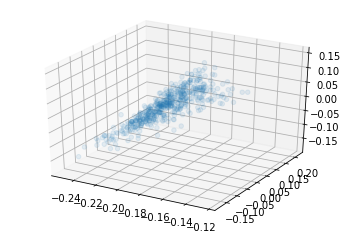

In [9]:
j = 0
u,s,v = np.linalg.svd(Rs[j][0][~np.isnan(Rs[j][0][:,0])])
diaged = Rs[j][0] @ v.T
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(diaged[:,0],diaged[:,1],diaged[:,2],alpha=50/diaged.shape[0])
# plt.xlim(-1,1)
# plt.ylim(-1,1)

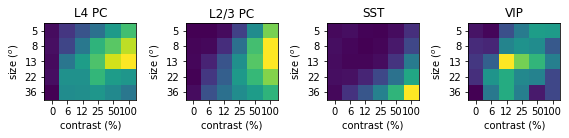

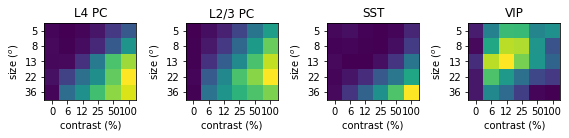

In [10]:
ucontrast = [str(c) for c in np.array((0,6,12,25,50,100))]
usize = [str(s) for s in (5,8,13,22,36)]
celltypes = ['L4 PC', 'L2/3 PC', 'SST', 'VIP']
# aligntypes = ['RF distance <10$^o$']
saveas = ['figures/four_cell_types_aligned.pdf','figures/four_cell_types_misaligned.pdf']
for ialign in range(2):
    plt.figure(figsize=(8,2))
    for icelltype in range(len(celltypes)):
        plt.subplot(1,4,icelltype+1)
        sca.show_size_contrast(rs[icelltype][ialign].mean(0))
        plt.title(celltypes[icelltype])
    plt.tight_layout()
    #plt.savefig(saveas[ialign])

In [11]:
rs[0][ialign][:,:,1::2].transpose((0,2,1)).shape

(384, 3, 5)

In [12]:
colors_l4 = [(1-c)*np.array((0,1,0)) for c in [0.25,0.5,0.75]]
colors_l23 = [(1-c)*np.array((1,1,1)) for c in [0.25,0.5,0.75]]
colors = [colors_l4,colors_l23]

In [13]:
def gen_size_tuning(sc):
    gray = np.tile(sc[:,:,0].mean(1)[:,np.newaxis,np.newaxis],(1,1,sc.shape[2]))
    to_plot = np.concatenate((gray,sc),axis=1)
    print(to_plot.shape)
    return to_plot

def plot_size_tuning_by_contrast(arr):
    usize = np.array((0,5,8,13,22,36))
    ucontrast = np.array((0,6,12,25,50,100))
    arr_sz = gen_size_tuning(arr)
    arr_sz = arr_sz/arr_sz.max(1).max(1)[:,np.newaxis,np.newaxis]
    lb,ub = ut.bootstrap(arr_sz,np.mean,pct=(2.5,97.5))
    to_plot = arr_sz.mean(0)
    for ic in range(1,6):
        plt.subplot(1,5,ic)
        ut.plot_bootstrapped_errorbars_hillel(usize,arr_sz[:,:,ic].transpose((0,2,1)),colors=['k','r'],markersize=5)
#         plt.scatter((0,),to_plot[:,0,0].mean(0))
#         plt.scatter((0,),to_plot[:,0,1].mean(0))
        plt.ylim(0.5*to_plot.min(),1.2*to_plot.max())
        plt.title('%d%% contrast' % ucontrast[ic])
        plt.xlabel('size ($^o$)')
    plt.subplot(1,5,1)
    plt.ylabel('event rate / max event rate')
    plt.tight_layout()
    
def plot_size_tuning(arr,colors=None):
    usize = np.array((0,5,8,13,22,36))
    ucontrast = np.array((0,6,12,25,50,100))
    arr_sz = gen_size_tuning(arr)
    arr_sz = arr_sz/arr_sz.max(1).max(1)[:,np.newaxis,np.newaxis]
    lb,ub = ut.bootstrap(arr_sz,np.mean,pct=(2.5,97.5))
    to_plot = arr_sz.mean(0)
    ut.plot_bootstrapped_errorbars_hillel(usize,arr_sz[:,:,1::2].transpose((0,2,1)),colors=colors)
    plt.ylim(to_plot.min()-0.1,to_plot.max()+0.1)
#     plt.title('%d%% contrast' % ucontrast[ic])
    plt.xlabel('size ($^o$)')
#     plt.subplot(1,2,1)
    plt.ylabel('event rate / max event rate')
    plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(512, 6, 6)
(734, 6, 6)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


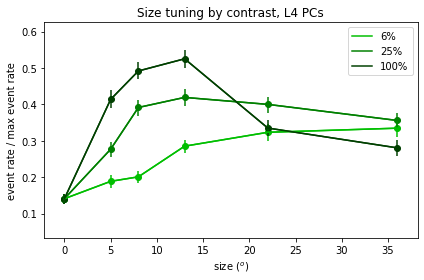

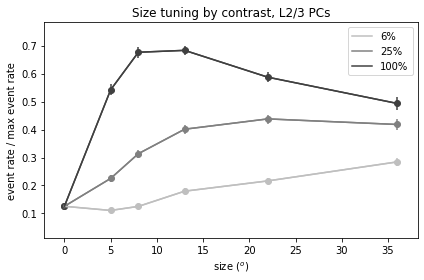

In [14]:
from importlib import reload
reload(ut)
ialign = 0
foldname = 'figures/'
filenames = ['size_tuning_3_contrasts_l4.pdf','size_tuning_3_contrasts_l23.pdf']
titles = ['Size tuning by contrast, L4 PCs','Size tuning by contrast, L2/3 PCs']
for icelltype in range(2):
    plt.figure()
#     ut.plot_bootstrapped_errorbars_hillel(usize,rs[icelltype][ialign][:,:,1::2].transpose((0,2,1)),colors=colors[icelltype])
    plot_size_tuning(rs[icelltype][ialign],colors=colors[icelltype])
    plt.legend(['6%','25%','100%'])
    plt.title(titles[icelltype])
    plt.tight_layout()
#     plt.savefig(foldname+filenames[icelltype])

In [15]:
    for ikey in range(len(keylist)):
        try:
            X = ds[keylist[ikey]]['cell_center'][:]
            y = ds[keylist[ikey]]['size_contrast_0']['rf_ctr'][:].T
            linreg = sklearn.linear_model.LinearRegression().fit(X,y)
            ypred = linreg.predict(X)
            x0 = -np.linalg.pinv(linreg.coef_) @ linreg.intercept_
            print(x0)
            plt.figure()
            for i in range(2):
                for j in range(2):
                    plt.subplot(2,2,2*i+j+1)
                    plt.scatter(X[:,i],y[:,j],s=5)
            for i in range(2):
                plt.subplot(2,2,i+1)
                plt.scatter(X[:,1],X[:,0],c=y[:,i],s=15)
                plt.colorbar()
                plt.subplot(2,2,i+3)
                plt.scatter(X[:,1],X[:,0],c=ypred[:,i],s=15)
                plt.clim(vmin=-20,vmax=20)
                plt.colorbar()
                plt.scatter(x0[1],x0[0],c='r',marker='+')
                    
        except:
            print('could not do ' + keylist[ikey])

NameError: name 'keylist' is not defined

In [ ]:
plt.figure()
ut.imshow_in_rows(rs[0][0])
plt.figure()
ut.imshow_in_rows(rs[0][1])

In [ ]:
titles = ['PC','SST','VIP']
t = 1500
plt.figure(figsize=(6,2))
lbl = 'Wmx'
data = Wstar_dict[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])
# plt.savefig('figures/ff_weights.pdf')
plt.figure(figsize=(9,2))
lbl = 'Wmy'
data = Wstar_dict[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])


In [ ]:
plt.figure()
ut.imshow_in_rows(rs[1][0])
plt.figure()
ut.imshow_in_rows(rs[1][1])

In [14]:
def f_miller_troyer(mu,s2):
    u = mu/np.sqrt(2*s2)
    A = 0.5*mu*(1+ssp.erf(u))
    B = np.sqrt(s2)/np.sqrt(2*np.pi)*np.exp(-u**2)
    return A + B
#     return 0.5*mu*(1+np.exp(u)) + sigma/np.sqrt(2*np.pi)*np.exp(-u**2) # 0.5*mu*(1+ssp.erf(u))

In [15]:
def fit_w(X,y,rate_fn,wm0=None,ws0=None,bounds=None):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(X(wm),X(ws))
    # f is a static nonlinearity, given as a function of mean and std. of noise
    N,P = X.shape
    def parse_w(w):
        wm = w[:P]
        ws = w[P:]
#         return wm,ws,k
        return wm,ws
    def minusL(w):
#         wm,ws,k = parse_w(w)
        wm,ws = parse_w(w)
        return 0.5*np.sum((rate_fn(X @ wm,X @ ws)-y)**2) # k*
    def minusdLdw(w): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(w)
    
    w0 = np.concatenate((wm0,ws0)) #,(k0,)))
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    wstar = sop.fmin_l_bfgs_b(minusL,w0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
    return wstar

In [16]:
def u_fn(X,Wx,Y,Wy,k):
    return X[0] @ Wx + X[1] @ (Wx*k) + Y[0] @ Wy + Y[1] @ (Wy*k)

def evaluate_f_mt(X,Ws,offset,k):
    # Ws: Wx,Wy,s02,Y
    return f_miller_troyer(u_fn(X,Ws[0],Ws[3],Ws[1],k)+offset,Ws[2])

In [17]:
#Wstar_dict = np.load('w_over_time_miller_troyer_3.npy',allow_pickle=True)[()]
#Ws = [Wstar_dict[ww][-1] for ww in Wstar_dict.keys()]

In [18]:
def fit_w_data_loss(X,ydata,rate_fn,wm0=None,ws0=None,s020=None,k0=None,bounds=None,niter=int(1e4)):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(X(wm),X(ws))
    # f is a static nonlinearity, given as a function of mean and std. of noise
    N,P = X[0].shape
    abd = 1

    nroi = ydata.shape[0]
    alpha_roi = sst.norm.ppf(np.arange(1,nroi+1)/(nroi+1))
    
    def sort_by_11(w):
        yalpha11 = rate_fn_wrapper(w,np.array((-abd,abd)))
        difference11 = compute_y_distance(yalpha11[np.newaxis,:,:],ydata[:,np.newaxis,:])
        sortby11 = np.argsort(difference11[:,0]-difference11[:,-1])
        return sortby11
    
    def compute_y_distance(y1,y2):
        return np.sum((y1-y2)**2,axis=-1)
    
    def compare_sorted_to_expected(w,sortind):
       
        yalpha_roi = rate_fn_wrapper(w,alpha_roi)
#         print(yalpha_roi.max())
        difference_roi = compute_y_distance(yalpha_roi,ydata[sortind])
        difference_roi_unsorted = compute_y_distance(yalpha_roi,ydata)
#         print(difference_roi.shape)
        return difference_roi

    def rate_fn_wrapper(w,alphas):
        wm,ws,s02,k = parse_w(w)
        inputs0 = [wm,np.array((0,)),s02,[np.array((0,)),np.array((0,))]]
        inputs1 = [X,ws,[np.array((0,)),np.array((0,))],np.array((0,))]
        yalpha = rate_fn(X,inputs0,alphas[:,np.newaxis]*u_fn(*inputs1,k),k)
        yalpha = normalize(yalpha)
        return yalpha

#     def compute_f_by_itself(w):

    def normalize(arr):
        arrsum = arr.sum(1)
#         arrnorm = np.ones_like(arr)
#         arrnorm = arrnorm/arrnorm.shape[1]
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def parse_w(w):
        wm = w[:P]
        ws = w[P:-2]
        s02 = w[-2]
        k = w[-1]
        return wm,ws,s02,k

    def minusL(w,sortind):
#         wm,ws,k = parse_w(w)
        difference_roi = compare_sorted_to_expected(w,sortind)
#         print(difference_roi.shape)
#         print(str(w) + ' -> ' + str(np.round(np.sum(difference_roi),decimals=2)))
        return 0.5*np.sum(difference_roi) # k*
    
    def minusdLdw(w,sortind): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(lambda w: minusL(w,sortind))(w)
    
    def fix_violations(w,bounds):
        lb = np.array([b[0] for b in bounds])
        ub = np.array([b[1] for b in bounds])
        w[w<lb] = lb[w<lb]
        w[w>ub] = ub[w>ub]
        return w
    
    w0 = np.concatenate((wm0,ws0,s020,k0)) #,(k0,)))
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    this_w = w0
    for i in range(niter):
        sortind = sort_by_11(this_w)
        wstar = sop.fmin_l_bfgs_b(lambda w: minusL(w,sortind),this_w,fprime=lambda w: minusdLdw(w,sortind),bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=1)
        assert(~np.isnan(wstar[1]))
        if np.isnan(wstar[1]):
            this_w = old_w
        else:
            this_w = wstar[0].copy() + np.random.randn(*this_w.shape)*0.01*np.exp(-i/niter)
            old_w = wstar[0].copy()
        this_w = fix_violations(this_w,bounds)
        print(str(i) + ': ' + str(wstar[1]))
    
    max_alpha = alpha_roi.max()
    this_yalpha = rate_fn_wrapper(this_w,np.linspace(-max_alpha,max_alpha,101))
    ydist = compute_y_distance(ydata[sortind,np.newaxis],this_yalpha[np.newaxis,:])
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(ydist/ydist.max(1)[:,np.newaxis],extent=[-max_alpha,max_alpha,0,10])
    plt.plot(-alpha_roi,10*np.arange(nroi)/nroi,c='m')
    plt.subplot(2,2,2)
    plt.imshow(this_yalpha[25].reshape((5,6)))
    plt.subplot(2,2,4)
    plt.imshow(this_yalpha[75].reshape((5,6)))
#         print(wstar)
    
    return wstar

In [ ]:
def fit_w_data_loss(X,ydata,rate_fn,wm0=None,ws0=None,s020=None,k0=None,bounds=None,niter=int(1e4)):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(X(wm),X(ws))
    # f is a static nonlinearity, given as a function of mean and std. of noise
    N,P = X[0].shape
    abd = 1

    nroi = ydata.shape[0]
    alpha_roi = sst.norm.ppf(np.arange(1,nroi+1)/(nroi+1))
    
    def sort_by_11(w):
        yalpha11 = rate_fn_wrapper(w,np.array((-abd,abd)))
        difference11 = compute_y_distance(yalpha11[np.newaxis,:,:],ydata[:,np.newaxis,:])
        sortby11 = np.argsort(difference11[:,0]-difference11[:,-1])
        return sortby11
    
    def compute_y_distance(y1,y2):
        return np.sum((y1-y2)**2,axis=-1)
    
    def compare_sorted_to_expected(w,sortind):
       
        yalpha_roi = rate_fn_wrapper(w,alpha_roi)
#         print(yalpha_roi.max())
        difference_roi = compute_y_distance(yalpha_roi,ydata[sortind])
        difference_roi_unsorted = compute_y_distance(yalpha_roi,ydata)
#         print(difference_roi.shape)
        return difference_roi

    def rate_fn_wrapper(w,alphas):
        wm,ws,s02,k = parse_w(w)
        inputs0 = [wm,np.array((0,)),s02,[np.array((0,)),np.array((0,))]]
        inputs1 = [X,ws,[np.array((0,)),np.array((0,))],np.array((0,))]
        yalpha = rate_fn(X,inputs0,alphas[:,np.newaxis]*u_fn(*inputs1,k),k)
        yalpha = normalize(yalpha)
        return yalpha

#     def compute_f_by_itself(w):

    def normalize(arr):
        arrsum = arr.sum(1)
#         arrnorm = np.ones_like(arr)
#         arrnorm = arrnorm/arrnorm.shape[1]
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def parse_w(w):
        wm = w[:P]
        ws = w[P:-2]
        s02 = w[-2]
        k = w[-1]
        return wm,ws,s02,k

    def minusL(w,sortind):
#         wm,ws,k = parse_w(w)
        difference_roi = compare_sorted_to_expected(w,sortind)
#         print(difference_roi.shape)
#         print(str(w) + ' -> ' + str(np.round(np.sum(difference_roi),decimals=2)))
        return 0.5*np.sum(difference_roi) # k*
    
    def minusdLdw(w,sortind): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(lambda w: minusL(w,sortind))(w)
    
    def fix_violations(w,bounds):
        lb = np.array([b[0] for b in bounds])
        ub = np.array([b[1] for b in bounds])
        w[w<lb] = lb[w<lb]
        w[w>ub] = ub[w>ub]
        return w
    
    w0 = np.concatenate((wm0,ws0,s020,k0)) #,(k0,)))
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    this_w = w0
    for i in range(niter):
        sortind = sort_by_11(this_w)
        wstar = sop.fmin_l_bfgs_b(lambda w: minusL(w,sortind),this_w,fprime=lambda w: minusdLdw(w,sortind),bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=1)
        assert(~np.isnan(wstar[1]))
        if np.isnan(wstar[1]):
            this_w = old_w
        else:
            this_w = wstar[0].copy() + np.random.randn(*this_w.shape)*0.01*np.exp(-i/niter)
            old_w = wstar[0].copy()
        this_w = fix_violations(this_w,bounds)
        print(str(i) + ': ' + str(wstar[1]))
    
    max_alpha = alpha_roi.max()
    this_yalpha = rate_fn_wrapper(this_w,np.linspace(-max_alpha,max_alpha,101))
    ydist = compute_y_distance(ydata[sortind,np.newaxis],this_yalpha[np.newaxis,:])
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(ydist/ydist.max(1)[:,np.newaxis],extent=[-max_alpha,max_alpha,0,10])
    plt.plot(-alpha_roi,10*np.arange(nroi)/nroi,c='m')
    plt.subplot(2,2,2)
    plt.imshow(this_yalpha[25].reshape((5,6)))
    plt.subplot(2,2,4)
    plt.imshow(this_yalpha[75].reshape((5,6)))
#         print(wstar)
    
    return wstar

In [19]:
Xs = []
ys_data = []
ws = []
allowable_inputs = []
yms = []
for i in range(4):
    for item in [Xs,ys_data,ws,allowable_inputs,yms]:
        item.append(None)

0: 9.250226711267558
1: 8.607762427314153
2: 8.499849983039923
3: 8.433712286204553
4: 8.337167772023399
5: 7.969464391111542
6: 7.798878337681589
7: 7.6808606732535
8: 7.5495827659001
9: 6.656923756603693
10: 6.329750943661812
11: 6.240061072198877
12: 6.1346945433918085
13: 5.975686536188282
14: 5.903834391493916
15: 5.836092514758538
16: 5.7272191736554525
17: 5.699460955876175
18: 5.63178809821971
19: 5.331662180503692
20: 5.159594468051845
21: 5.067623445850822
22: 5.053233833273941
23: 5.003367449340216
24: 4.747832926064526
25: 4.747972689577339
26: 4.675332419606578
27: 4.6469076644200245
28: 4.6324885685771555
29: 4.629326966618761
30: 4.621360465959304
31: 4.614611421949789
32: 4.594659356204897
33: 4.589583858813797
34: 4.5852184805475655
35: 4.584390597477918
36: 4.580486449886119
37: 4.577710113304829
38: 4.574592651094237
39: 4.5767792803864
40: 4.575038877422687
41: 4.57587001028892
42: 4.5731803741661885
43: 4.559144762446488
44: 4.560803615274553
45: 4.555617695701082


365: 4.436957734738622
366: 4.436042332275229
367: 4.434855547406516
368: 4.435541203554058
369: 4.4358626915311925
370: 4.435694959960347
371: 4.435330213609385
372: 4.43510884252301
373: 4.4356376246320615
374: 4.436984838302058
375: 4.433492945009734
376: 4.432699746692543
377: 4.43237199333127
378: 4.432559039089883
379: 4.431977125850431
380: 4.43249633861334
381: 4.432839666492051
382: 4.432524468425452
383: 4.432700809053388
384: 4.4321054642253115
385: 4.432141781762095
386: 4.432773953971736
387: 4.432730755590011
388: 4.4325500332458745
389: 4.432012007844101
390: 4.43180737491994
391: 4.432187671872715
392: 4.4312149449111935
393: 4.43154318782439
394: 4.43140396472758
395: 4.431728754902728
396: 4.432061211337171
397: 4.431592067004976
398: 4.431598724925284
399: 4.431797796145219
400: 4.432206541852898
401: 4.431816739043002
402: 4.432531339094542
403: 4.43334442713658
404: 4.433838728806254
405: 4.434335843389246
406: 4.4330372971763605
407: 4.43141861424607
408: 4.432693

723: 4.412503100680859
724: 4.412530362127645
725: 4.412289173185964
726: 4.412515383793131
727: 4.412499355384853
728: 4.412474020245526
729: 4.4126782220805225
730: 4.412294751621439
731: 4.412045597350172
732: 4.412670733768244
733: 4.4126127278924105
734: 4.412652498137861
735: 4.412848440460039
736: 4.4124673853532235
737: 4.413059738484825
738: 4.412842160759387
739: 4.412406923431032
740: 4.412139283548787
741: 4.412803435174155
742: 4.412439312472268
743: 4.412311178103575
744: 4.412346190157936
745: 4.412022040262908
746: 4.412436932300131
747: 4.412227996909429
748: 4.412205507458384
749: 4.411876914765265
750: 4.411858693086625
751: 4.411618612012546
752: 4.411793607500841
753: 4.411809640980913
754: 4.411097195518067
755: 4.409949105940966
756: 4.41005120219531
757: 4.409885635419267
758: 4.4102722575114015
759: 4.410286581222351
760: 4.4093921122736255
761: 4.408540212207132
762: 4.4084741429364405
763: 4.408860454194603
764: 4.408679179722347
765: 4.408555998046733
766: 4

83: 1.2370166732447068
84: 1.2380231209266133
85: 1.2378861892584347
86: 1.2385796616274027
87: 1.2376396659981679
88: 1.2356153667527143
89: 1.237850917722203
90: 1.235520626926231
91: 1.2383762405121237
92: 1.2368113886076813
93: 1.2357027565017709
94: 1.235399473666935
95: 1.2362020192719232
96: 1.2348937031619704
97: 1.2358335623724965
98: 1.2343448948684488
99: 1.2385256099667799
100: 1.2357318240672193
101: 1.234862848956436
102: 1.2358867782746452
103: 1.233522171452441
104: 1.2335825971739933
105: 1.2345316817996075
106: 1.2361295688930976
107: 1.2352108161540085
108: 1.2346159656561313
109: 1.2342643816213474
110: 1.2346585683561329
111: 1.234170936893082
112: 1.2338095227592283
113: 1.2354383991134221
114: 1.2346707442256262
115: 1.23492741768773
116: 1.2325802104876669
117: 1.236608618900314
118: 1.2350555484234782
119: 1.2347160477835473
120: 1.2335113428911113
121: 1.23568095312139
122: 1.2349236628417293
123: 1.2346057065723737
124: 1.2353815047960852
125: 1.2379627088086

447: 1.2294512742061556
448: 1.2295282911041454
449: 1.229564132306421
450: 1.2289295901875799
451: 1.2297057104796616
452: 1.229329180072849
453: 1.2297413820687007
454: 1.2288722605843345
455: 1.2303878876287049
456: 1.2299671894296145
457: 1.2299406508632584
458: 1.2293927340994317
459: 1.2281921446338482
460: 1.2297243958140724
461: 1.2291877669798996
462: 1.2302948988445777
463: 1.2299305310602895
464: 1.2294147933229
465: 1.2292645786846244
466: 1.2298497599781237
467: 1.2299984461911064
468: 1.2298329252394955
469: 1.229992625246648
470: 1.2300116358953148
471: 1.2300796706957806
472: 1.2295617657839393
473: 1.2295747609109866
474: 1.2292273756496184
475: 1.2297859858404618
476: 1.2293872657379583
477: 1.2293013194245586
478: 1.2303578407513094
479: 1.2294583370109962
480: 1.2288378736130314
481: 1.2294440650691367
482: 1.230308997937587
483: 1.2297438701746932
484: 1.2294950743465343
485: 1.2299963322727285
486: 1.2291846763418794
487: 1.2298777206368667
488: 1.2292402539747154

794: 1.2287577204239564
795: 1.2287456819889375
796: 1.229162795245146
797: 1.2295276514922642
798: 1.22945630532132
799: 1.2292747161553192
800: 1.2294527627228362
801: 1.2293349245451397
802: 1.229032616423698
803: 1.2293627537975085
804: 1.2292332725982877
805: 1.2290461885921964
806: 1.2291116524744887
807: 1.2296114467869166
808: 1.228982758423582
809: 1.2289571890647042
810: 1.2282975608683016
811: 1.2284789561494214
812: 1.2303992255732057
813: 1.2299646032706348
814: 1.2295927799577626
815: 1.2294614668869701
816: 1.2293410571718653
817: 1.2293907652790037
818: 1.2292575076840098
819: 1.2292543373272393
820: 1.2291265915919134
821: 1.2288867739668734
822: 1.2295885856198303
823: 1.2294613316980332
824: 1.2293795083082988
825: 1.2288947333201439
826: 1.228614050550592
827: 1.229318637510825
828: 1.2290797787331023
829: 1.2292779493691481
830: 1.229708777031846
831: 1.2295281487689187
832: 1.2292322828535895
833: 1.2288932136354844
834: 1.229247414547293
835: 1.229187669401684
83

147: 1.0608287078272025
148: 1.0608906263212459
149: 1.060986465587924
150: 1.0609382595816175
151: 1.0609197824690382
152: 1.0607130088904504
153: 1.060674141151449
154: 1.0607016587698004
155: 1.0607555247862022
156: 1.060659993221643
157: 1.0608101550713183
158: 1.0606493819527238
159: 1.0608179123601613
160: 1.060528451685856
161: 1.0604322388198049
162: 1.060498507936298
163: 1.060522793028093
164: 1.0605132654072156
165: 1.060547888855277
166: 1.0605661344513564
167: 1.0606050541679086
168: 1.0606471863740325
169: 1.0605754414075994
170: 1.0605519085415112
171: 1.060454283878034
172: 1.060369375039025
173: 1.0603240123011402
174: 1.0602535067133338
175: 1.0602506872249524
176: 1.060263744709011
177: 1.0602869631960061
178: 1.0602474234414752
179: 1.060402466519895
180: 1.0602418206038786
181: 1.0603628376165495
182: 1.0603469770424316
183: 1.0605323820021586
184: 1.0605051099991716
185: 1.0602740439951326
186: 1.0603396658691082
187: 1.060498939934305
188: 1.060492618281307
189: 

498: 1.0560346646666163
499: 1.055982767453601
500: 1.0559084780323515
501: 1.0558491016379186
502: 1.0562335977062973
503: 1.0560451160158393
504: 1.0558623333410644
505: 1.055881551451817
506: 1.0560035549509577
507: 1.0557439759925447
508: 1.0557378852225523
509: 1.0561207663858068
510: 1.0555997145668674
511: 1.0556691996401435
512: 1.0556257026084945
513: 1.055942324634278
514: 1.0556418182416265
515: 1.0556468835086386
516: 1.055603912935404
517: 1.0559386384977143
518: 1.0556701483567337
519: 1.055697314614409
520: 1.0557200736198005
521: 1.055827814240493
522: 1.0559075194201406
523: 1.0558653124841686
524: 1.0558531037614571
525: 1.0558557313220671
526: 1.0558472880885763
527: 1.0558343147003857
528: 1.0558137727288344
529: 1.0555777179473758
530: 1.0556067037344472
531: 1.0557328548227995
532: 1.0557615359873411
533: 1.0557879036534394
534: 1.0557653498226374
535: 1.0557658380305854
536: 1.0557688303803996
537: 1.0555763409143062
538: 1.0555261713626976
539: 1.055522755202990

859: 1.053254809649298
860: 1.0533748568995729
861: 1.0532567129399804
862: 1.0532571296448165
863: 1.0532649254606203
864: 1.0533431073807995
865: 1.0533210025069875
866: 1.0533369170387532
867: 1.0532747797717321
868: 1.0533256824753254
869: 1.0532694539479601
870: 1.053264340820414
871: 1.053309316323881
872: 1.0533017367265285
873: 1.0532928005837296
874: 1.053277272940901
875: 1.053247129643348
876: 1.0532595755333611
877: 1.0532376348224142
878: 1.0532736258972006
879: 1.053284605319412
880: 1.0532851791328746
881: 1.0531826468698833
882: 1.0532613725268036
883: 1.053166515347288
884: 1.0531731871307803
885: 1.053164411658582
886: 1.0531816001609526
887: 1.0531752134068153
888: 1.0532305453858015
889: 1.053151084307608
890: 1.053230479956022
891: 1.0532197670976595
892: 1.053222852239101
893: 1.0531988280619013
894: 1.0532082145440655
895: 1.0531646453475316
896: 1.0531770685306912
897: 1.0531774959629596
898: 1.0531737028911918
899: 1.0531681234636858
900: 1.0531160630601404
901

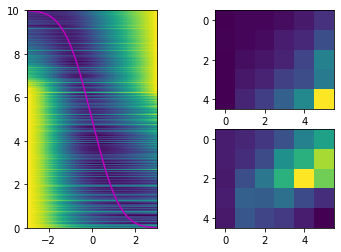

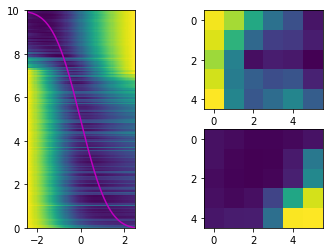

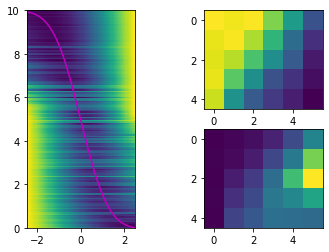

In [20]:
allowable_inputs = [None,[0,2],[1,3],[0,1,2]]
factor = 1
ncelltypes = len(Rs)
Xs = [None for ialign in range(2)]
ys_data = [None for icelltype in range(ncelltypes)]
# ws = [None for icelltype in range(ncelltypes)]
ws = np.zeros((4,12))
for ialign in range(2):
    Xs[ialign] = [np.nanmean(Rs[iinp][ialign],axis=0)[:,np.newaxis] for iinp in range(ncelltypes)]
    Xs[ialign] = np.concatenate(Xs[ialign],axis=1)
    Xs[ialign] = np.concatenate((Xs[ialign],np.ones((Xs[ialign].shape[0],1))),axis=1)
for icelltype in range(1,ncelltypes):
    ys_data[icelltype] = Rs[icelltype][0].copy() # [ind:ind+1]
    ys_data[icelltype] = ys_data[icelltype][~np.isnan(ys_data[icelltype][:,0])]
    wm0 = np.array((1,1,-1,-1,1))*factor
    ws0 = np.array((1,1,-1,-1,1))*factor
    s020 = np.array((1,))*factor
    k0 = np.array((0.5,))
    bounds = [(-np.inf,np.inf)]*12
    ignore = np.setdiff1d(np.arange(ncelltypes),[allowable_inputs[icelltype]])
    for badind in ignore:
        bounds[badind] = (0,0)
        bounds[badind + ncelltypes + 1] = (0,0)
    bounds[-2] = (1,1)
    bounds[-1] = (0,1)
    niter = int(1e3)
    wstar = fit_w_data_loss(Xs,ys_data[icelltype],evaluate_f_mt,wm0=wm0,ws0=ws0,s020=s020,k0=k0,bounds=bounds,niter=niter)
    ws[icelltype] = wstar[0].copy()

In [418]:
ws[2]

array([ 0.        ,  1.71742459,  0.        , -6.98626796, -3.01177364,
        0.        ,  2.15650022,  0.        , -4.31114669,  0.32745633,
        1.        ,  0.99661366])

In [ ]:
titles = ['PC','SST','VIP']
t = 1500
plt.figure(figsize=(6,2))
lbl = 'Wmx'
data = Wstar_dict[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])
plt.figure(figsize=(9,2))
lbl = 'Wmy'
data = Wstar_dict[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])


In [23]:
def display_model_fit(y,ym):
    plt.figure()
    plt.subplot(1,2,1)
    sca.show_size_contrast(y.reshape((5,6)))
    plt.clim(vmin=y.min(),vmax=y.max())
#     plt.imshow(y.reshape((5,6)),vmax=y.max())
    plt.subplot(1,2,2)
    sca.show_size_contrast(ym.reshape((5,6)))
    plt.clim(vmin=y.min(),vmax=y.max())
    plt.tight_layout()
#     plt.imshow(ym.reshape((5,6)),vmax=y.max())
    #plt.figure()
    #sca.scatter_size_contrast(y,ym)
    #plt.plot((0,1),(0,1),c='r')
    #plt.xlabel('measured')
    #plt.ylabel('modeled')

In [24]:
display_model_fit(ys_data[icelltype].mean(0),yms[icelltype]/yms[icelltype].sum())
plt.title('SST')
# plt.savefig('figures/sst_measured_modeled_mt.pdf')

AttributeError: 'NoneType' object has no attribute 'sum'

In [ ]:
plt.figure()
plt.bar(np.arange(3),[ws[i][-1] for i in range(1,4)])
plt.xticks(np.arange(3),['PC','SST','VIP'])
plt.ylabel('fit coupling to neighboring space')
plt.xlabel('cell type')
#plt.savefig('figures/space_coupling_coefficients.pdf')

In [147]:
display_model_fit(ys_data[icelltype].mean(0),yms[icelltype]/yms[icelltype].sum())
plt.title('VIP')
# plt.savefig('figures/vip_measured_modeled_mt.pdf')

AttributeError: 'NoneType' object has no attribute 'sum'

In [148]:
display_model_fit(ys_data[icelltype].mean(0),yms[icelltype]/yms[icelltype].sum())
plt.title('PC')
# plt.savefig('figures/pc_measured_modeled_mt.pdf')

AttributeError: 'NoneType' object has no attribute 'sum'

In [149]:
# find ML columns of wx,wy one by one from data: Ydata ~ Y = f(Xwx + Ywy)
# 1. linearize around Y = f(Xwx + Ywy) and find new ML wx,xy
# 2. solve Y = f(Xwx + Ywy) exactly for fixed wx,wy
# repeat from 1.

In [26]:
def compute_Y_nonlinear(X,Wmx,Wmy,Wsx,Wsy,k,s02,f,Y0=None,bounds=None,stop_early=False):
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    
#     def parse_W(W): 
#         Wx = W[:nP*nQ].reshape((nP,nQ))
#         Wy = W[nP*nQ:].reshape((nQ,nQ))
#         return Wx,Wy
    
    def unparse_y(ys):
        y = np.concatenate(ys,axis=0)
        return y
    
    def parse_y(y):
        ys = [y[:nQ],y[nQ:]]
        return ys #[Y[:nN*nQ].reshape((nN,nQ)),Y[nN*nQ:].reshape((nN,nQ))]

    npixels = 2
#     Wx,Wy = parse_W(W)
    nN,nQ = Y0[0].shape
    
    Ystar = [np.zeros((nN,nQ)) for i in range(npixels)]
    
    for i in range(nN):
        def minusL(y):
            ys = parse_y(y)
            def u_fn(thisX,thisy,Wx,Wy,k):
                return thisX[0][i] @ Wx + thisX[1][i] @ (Wx*k[np.newaxis,:]) + thisy[0] @ Wy + thisy[1] @ (Wy*k[np.newaxis,:])
            term0 = 0.5*np.sum((f(u_fn(X,ys,Wmx,Wmy,k),u_fn(X,ys,Wsx,Wsy,k)**2+s02) - ys[0])**2)
            term1 = 0.5*np.sum((f(u_fn(X[::-1],ys[::-1],Wmx,Wmy,k),u_fn(X[::-1],ys[::-1],Wsx,Wsy,k)**2+s02) - ys[1])**2)
            return term0 + term1
            
        def minusdLdy(y):
            return egrad(minusL)(y)
        
        if stop_early:
            maxiter = 25
        else:
            maxiter = 15000
        YY0 = unparse_y([Y0[0][i],Y0[1][i]])
        YYstar = sop.fmin_l_bfgs_b(minusL,YY0,fprime=minusdLdy,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=maxiter)
        Ystar[0][i],Ystar[1][i] = parse_y(YYstar[0])
    
    return Ystar #[np.array([el[0] for el in Ystar[ialign]]) for ialign in range(npixels)],Ystar # list of two, 0 is aligned, 1 is misaligned

In [27]:
def fit_w_data_loss(X,ydata,rate_fn,wm0=None,ws0=None,s020=None,k0=None,bounds=None,niter=int(1e4)):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(X(wm),X(ws))
    # f is a static nonlinearity, given as a function of mean and std. of noise
    N,P = X[0].shape
    abd = 1

    nroi = ydata.shape[0]
    alpha_roi = sst.norm.ppf(np.arange(1,nroi+1)/(nroi+1))
    
    def sort_by_11(w):
        yalpha11 = rate_fn_wrapper(w,np.array((-abd,abd)))
        difference11 = compute_y_distance(yalpha11[np.newaxis,:,:],ydata[:,np.newaxis,:])
        sortby11 = np.argsort(difference11[:,0]-difference11[:,-1])
        return sortby11
    
    def compute_y_distance(y1,y2):
        return np.sum((y1-y2)**2,axis=-1)
    
    def compare_sorted_to_expected(w,sortind):
       
        yalpha_roi = rate_fn_wrapper(w,alpha_roi)
#         print(yalpha_roi.max())
        difference_roi = compute_y_distance(yalpha_roi,ydata[sortind])
        difference_roi_unsorted = compute_y_distance(yalpha_roi,ydata)
#         print(difference_roi.shape)
        return difference_roi

    def rate_fn_wrapper(w,alphas):
        wm,ws,s02,k = parse_w(w)
        inputs0 = [wm,np.array((0,)),s02,[np.array((0,)),np.array((0,))]]
        inputs1 = [X,ws,[np.array((0,)),np.array((0,))],np.array((0,))]
        yalpha = rate_fn(X,inputs0,alphas[:,np.newaxis]*u_fn(*inputs1,k),k)
        yalpha = normalize(yalpha)
        return yalpha

#     def compute_f_by_itself(w):

    def normalize(arr):
        arrsum = arr.sum(1)
#         arrnorm = np.ones_like(arr)
#         arrnorm = arrnorm/arrnorm.shape[1]
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def parse_w(w):
        wm = w[:P]
        ws = w[P:-2]
        s02 = w[-2]
        k = w[-1]
        return wm,ws,s02,k

    def minusL(w,sortind):
#         wm,ws,k = parse_w(w)
        difference_roi = compare_sorted_to_expected(w,sortind)
#         print(difference_roi.shape)
#         print(str(w) + ' -> ' + str(np.round(np.sum(difference_roi),decimals=2)))
        return 0.5*np.sum(difference_roi) # k*
    
    def minusdLdw(w,sortind): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(lambda w: minusL(w,sortind))(w)
    
    def fix_violations(w,bounds):
        lb = np.array([b[0] for b in bounds])
        ub = np.array([b[1] for b in bounds])
        w[w<lb] = lb[w<lb]
        w[w>ub] = ub[w>ub]
        return w
    
    w0 = np.concatenate((wm0,ws0,s020,k0)) #,(k0,)))
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    this_w = w0
    for i in range(niter):
        sortind = sort_by_11(this_w)
        wstar = sop.fmin_l_bfgs_b(lambda w: minusL(w,sortind),this_w,fprime=lambda w: minusdLdw(w,sortind),bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=1)
        assert(~np.isnan(wstar[1]))
        if np.isnan(wstar[1]):
            this_w = old_w
        else:
            this_w = wstar[0].copy() + np.random.randn(*this_w.shape)*0.01*np.exp(-i/niter)
            old_w = wstar[0].copy()
        this_w = fix_violations(this_w,bounds)
        print(str(i) + ': ' + str(wstar[1]))
    
    max_alpha = alpha_roi.max()
    this_yalpha = rate_fn_wrapper(this_w,np.linspace(-max_alpha,max_alpha,101))
    ydist = compute_y_distance(ydata[sortind,np.newaxis],this_yalpha[np.newaxis,:])
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(ydist/ydist.max(1)[:,np.newaxis],extent=[-max_alpha,max_alpha,0,10])
    plt.plot(-alpha_roi,10*np.arange(nroi)/nroi,c='m')
    plt.subplot(2,2,2)
    plt.imshow(this_yalpha[25].reshape((5,6)))
    plt.subplot(2,2,4)
    plt.imshow(this_yalpha[75].reshape((5,6)))
#         print(wstar)
    
    return wstar

In [28]:
nQ = ncelltypes-1
offset = 0
wxfactor = 1e-1
wyfactor = 1e-1
W0my = wyfactor*ws[1:4,1:4].T
W0mx = wxfactor*ws[1:4,[0,4]].T
W0sy = wyfactor*ws[1:4,6:9].T
W0sx = wxfactor*ws[1:4,[5,10]].T
s020 = np.ones((nQ,))
k0 = ws[1:4,-1]
npixels = 2
Yhat = [[Rs[icelltype][ialign].copy() for icelltype in range(1,4)] for ialign in range(npixels)]
X = [None for ialign in range(npixels)]
for ialign in range(npixels):
    for i in range(len(Yhat[ialign])):
        Yhat[ialign][i] = Yhat[ialign][i][~np.isnan(Yhat[ialign][i][:,0])]
    x = columnize(Rs[ialign][0])[:,np.newaxis]
    X[ialign] = np.concatenate((x,np.ones_like(x)),axis=1)
nN,nP = X[0].shape
nQ = len(Yhat[0])
# W0mx = np.zeros((nP,nQ))
# W0my = np.zeros((nQ,nQ))
# W0sx = np.zeros((nP,nQ))
# W0sy = np.zeros((nQ,nQ))

W0s = [W0mx,W0my,W0sx,W0sy,s020,k0]

In [38]:
u,s,v = np.linalg.svd(W0my/wyfactor)

In [40]:
def parse_bounds(W0x_bounds,W0y_bounds,s02_bounds,k_bounds):
    bounds = [(-np.inf,np.inf)]*(2*(W0x_bounds.size+W0y_bounds.size) + s02_bounds.size + k_bounds.size)
    is_free = np.zeros((2*(W0x_bounds.size+W0y_bounds.size) + s02_bounds.size + k_bounds.size,))
    so_far = 0
    is_free = np.concatenate((W0x_bounds.flatten(),W0y_bounds.flatten(),np.abs(W0x_bounds).flatten(),np.abs(W0y_bounds).flatten()))
    for i in range(2*(W0x_bounds.size+W0y_bounds.size)):
        if is_free[i]==0:
            bounds[i] = (0,0)
        elif is_free[i]==-1:
            bounds[i] = (-np.inf,0)
    for i in range(2*(W0x_bounds.size+W0y_bounds.size),2*(W0x_bounds.size+W0y_bounds.size)+s02_bounds.size):
        bounds[i] = (1,1)
    for i in range(2*(W0x_bounds.size+W0y_bounds.size)+s02_bounds.size,2*(W0x_bounds.size+W0y_bounds.size)+s02_bounds.size+k_bounds.size):
        bounds[i] = (0,1)
    return bounds

In [41]:
W0x_bounds = np.ones((nP,nQ),dtype=int)
W0x_bounds[0,1] = 0
W0y_bounds = np.ones((nQ,nQ),dtype=int)
W0y_bounds[1:3,1:3] = np.array(((0,-1),(-1,0)))
W0y_bounds[1,0] = -1
W0y_bounds[2,0] = 0

# W0mx[W0x_bounds>0] = np.random.randn((W0x_bounds>0).sum())
# W0my[W0y_bounds>0] = np.random.randn((W0y_bounds>0).sum())
# W0sx[W0x_bounds>0] = np.random.randn((W0x_bounds>0).sum())
# W0sy[W0y_bounds>0] = np.random.randn((W0y_bounds>0).sum())

s02_bounds = np.ones((nQ,))

k_bounds = np.ones((nQ,))

bounds = parse_bounds(W0x_bounds,W0y_bounds,s02_bounds,k_bounds)

In [42]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']

In [248]:
#Y0,diagnostics = compute_Y_nonlinear(X,*W0s,f_miller_troyer,Y0=np.zeros((nN,nQ))) #_t_evolution

In [249]:
#Wstar_dict = np.load('w_over_time_miller_troyer_data_loss.npy',allow_pickle=True)[()]
#Wstar_dict['k'] = np.array((0.2,1,0.2))[np.newaxis,:]*np.ones((1001,1))
#Wstar_t = []
#for i, label in enumerate(labels):
#    Wstar_t.append(Wstar_dict[label])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 0, 'VIP')

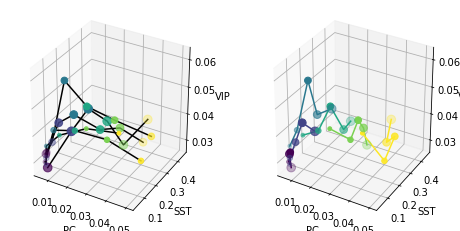

In [43]:
r_to_plot = [None for i in range(3)]
ialign = 0
r_to_plot[0] = rs[1][ialign].mean(0)
r_to_plot[1] = rs[2][ialign].mean(0)
r_to_plot[2] = rs[3][ialign].mean(0)
colors = plt.cm.viridis(np.linspace(0,1,6))

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1,projection='3d')
for i in range(5):
    ax.plot(r_to_plot[0][i],r_to_plot[1][i],r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[0][i],r_to_plot[1][i],r_to_plot[2][i],c=colors,s=15*i+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('PC')
plt.ylabel('SST')
ax.set_zlabel('VIP')
ax = fig.add_subplot(1,2,2,projection='3d')
for i in range(6):
    ax.plot(r_to_plot[0][:,i],r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i])
    ax.scatter(r_to_plot[0][:,i],r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i],s=15*np.arange(5)+15)
plt.xlabel('PC')
plt.ylabel('SST')
ax.set_zlabel('VIP')
#plt.tight_layout()
# plt.savefig('figures/wire_plots_size_contrast.pdf')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

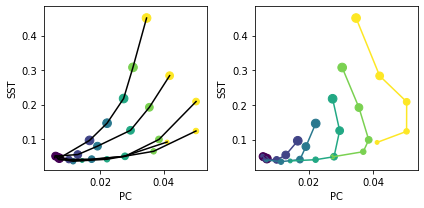

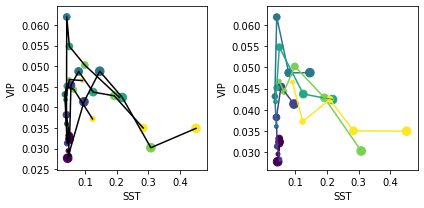

In [44]:
r_to_plot = [None for i in range(3)]
ialign = 0
r_to_plot[0] = rs[1][ialign].mean(0)
r_to_plot[1] = rs[2][ialign].mean(0)
r_to_plot[2] = rs[3][ialign].mean(0)
colors = plt.cm.viridis(np.linspace(0,1,6))

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,2,1)#,projection='3d')
for i in range(5):
    ax.plot(r_to_plot[0][i],r_to_plot[1][i],c='k')#,r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[0][i],r_to_plot[1][i],c=colors,s=15*i+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('PC')
plt.ylabel('SST')
ax = fig.add_subplot(1,2,2)#,projection='3d')
for i in range(6):
    ax.plot(r_to_plot[0][:,i],r_to_plot[1][:,i],c=colors[i])#,r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[0][:,i],r_to_plot[1][:,i],c=colors[i],s=15*np.arange(5)+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('PC')
plt.ylabel('SST')
plt.tight_layout()
#ax.set_zlabel('VIP')

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,2,1)#,projection='3d')
for i in range(5):
    ax.plot(r_to_plot[1][i],r_to_plot[2][i],c='k')#,r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[1][i],r_to_plot[2][i],c=colors,s=15*i+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('SST')
plt.ylabel('VIP')
ax = fig.add_subplot(1,2,2)#,projection='3d')
for i in range(6):
    ax.plot(r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i])#,r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i],s=15*np.arange(5)+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('SST')
plt.ylabel('VIP')
plt.tight_layout()

In [400]:
def fit_W_momentum(X,Yhat,pop_rate_fn=None,neuron_rate_fn=None,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,s020=None,k0=None,bounds=None,niter=10,weight=None,eta=0.1,gamma=0.9,barrier_wt=1):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    f_sq_second_argument = lambda a,b: pop_rate_fn(a,b**2)
    fprime_m = egrad(pop_rate_fn,0)
    fprime_s = egrad(f_sq_second_argument,1)
    fprime_s2 = egrad(pop_rate_fn,1)
    
    YY0 = np.concatenate(Y0,axis=1)
    XX = np.concatenate(X,axis=1)
    
    npixels = len(Yhat)
    assert(npixels==len(X))
    nN,nP = X[0].shape
    nQ = len(Yhat[0])
    assert(nN==Yhat[0][0].shape[1])
    
    first = True
    
    if weight is None:
        weight = np.ones((nQ,))
        
#     lower_bound = np.array([b[0] for b in bounds])
#     upper_bound = np.array([b[1] for b in bounds])
    
    nrois = [[y.shape[0] for y in Yhat[ialign]] for ialign in range(npixels)]
    alpha_rois = [[sst.norm.ppf(np.arange(1,nroi+1)/(nroi+1)) for nroi in nrois[ialign]] for ialign in range(npixels)]
    sortinds = [[np.arange(nroi) for nroi in nrois[ialign]] for ialign in range(npixels)]
    
    # Yhat is all measured tuning curves, Y is the averages of the model tuning curves
    
    def take_one_step(W0,YY0,momentum0=None,sortinds=None):
        
#         print(first)
        W0mx,W0my,W0sx,W0sy,s020,k0 = parse_W(W0)
        Y00 = [YY0[:,ialign*nQ:(ialign+1)*nQ] for ialign in range(npixels)]
        Y0 = compute_Y_nonlinear(X,W0mx,W0my,W0sx,W0sy,s020,k0,pop_rate_fn,Y0=Y00,stop_early=not first)
        YY0 = np.concatenate(Y0,axis=1)
        sortinds = [[None for icelltype in range(nQ)] for ialign in range(npixels)]
        #W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten(),s020.flatten()),axis=0)

        def compare_sorted_to_expected(YY,w,ydata,sortind,alpha_roi,inside=True):
            yalpha_roi = neuron_rate_fn_wrapper(YY,w,alpha_roi,inside=inside)
            difference_roi = compute_y_distance(yalpha_roi,ydata[sortind])[0]
#             assert(True==False)
            return difference_roi
        
        def compute_f(W,YY):
            # returns value (N,Q)
            return compute_f_(XX,W,YY)

        def compute_f_(xx,W,yy):
            Wmx,Wmy,Wsx,Wsy,s2,k = parse_W(W)
            def u_fn(Wx,Wy,k):
                WWx,WWy = [gen_Weight(W,k) for W in [Wx,Wy]]
                return xx @ WWx + yy @ WWy
            return pop_rate_fn(u_fn(Wmx,Wmy,k),u_fn(Wsx,Wsy,k)**2+np.concatenate((s2,s2),axis=0))

        def dfdW(W,YY):
            # returns value (N,Q,R)
            # dfdW(W,Y): 2*Q*(P+Q) + Q = R, (N,Q,R)
            fW = lambda W: compute_f(W,YY)
            return jacobian(fW)(W)
        
        def compute_difference(XX,W,YY):
            Wmx,Wmy,Wsx,Wsy,s2,k = parse_W(W)
            difference_roi = [[np.zeros((nroi,)) for nroi in nrois[ialign]] for ialign in range(npixels)]
            for ialign in range(npixels):
                inside = ialign==0
                for icelltype in range(nQ):
                    w = unparse_w(Wmx,Wmy,Wsx,Wsy,s2,k,icelltype=icelltype)
                    difference_roi[ialign][icelltype] = compare_sorted_to_expected(YY,w,Yhat[ialign][icelltype],sortinds[ialign][icelltype],alpha_rois[ialign][icelltype],inside=inside)
            return difference_roi
        
        def dfdYY(W,YY):
            compute_fs = [lambda yy: compute_f_(xx,W,yy) for xx in XX]
            jacobians = [jacobian(this_compute_f)(yy)[np.newaxis] for this_compute_f,yy in zip(compute_fs,YY)]
            jac = np.concatenate(jacobians,axis=0)
            return jac
        
        def dYYdW(W):
            # returns value (N,Q,R)
            A = np.linalg.inv(np.eye(npixels*nQ)[np.newaxis] - dfdYY(W,YY0))
            B = dfdW(W,YY0)
            return A @ B
        
        def minusLWYY(W,YY):
            # returns value float
            all_diffs = compute_difference(XX,W,YY)
            diffs = [np.array([np.mean(z) for z in all_diffs[ialign]]) for ialign in range(npixels)]
            return 0.5*np.sum([np.sum(weight*diffs[ialign]) for ialign in range(npixels)])
                
        def minuspLpYY(W,YY): # partial L partial Y
            return egrad(minusLWYY,1)(W,YY)
        
        def minuspLpW(W,YY): # partial L partial W
            return egrad(minusLWYY,0)(W,YY)
        
        def minusLW(W):
            # returns value float
            return minusLWYY(W,compute_f(W,YY0))
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return np.einsum('ij,ijk->k',minuspLpYY(W,YY0),dYYdW(W)) + minuspLpW(W,YY0)
        
#         def ddifferencedW(W,YY):
#             ftemp = lambda W: compute_difference(XX,W,YY)[0]
#             return jacobian(ftemp)(W)
        
#         def ddifferencedY(Y):
#             ftemp = lambda YY: compute_difference(XX,W,YY)[0]
#             return jacobian(ftemp)(Y)
        
        def fix_violations(w,bounds):
            lb = np.array([b[0] for b in bounds])
            ub = np.array([b[1] for b in bounds])
            lb_violation = w<lb
            ub_violation = w>ub
            w[lb_violation] = lb[lb_violation]
            w[ub_violation] = ub[ub_violation]
            return w,lb_violation,ub_violation
        
        def sorted_r_eigs(w):
            drW,prW = np.linalg.eig(w)
            srtinds = np.argsort(drW)
            return drW[srtinds],prW[:,srtinds]
        
        
        if momentum0 is None:
            momentum0 = np.zeros_like(W0)
        deriv = minusdLdW(W0)
        drW,prW = sorted_r_eigs(W0my - np.eye(nQ))
#         dlW,plW = sorted_r_eigs(W0my.T - np.eye(nQ))
        plW = np.linalg.inv(prW)
        print('stability: %.5f' % np.real(drW[-1]))
        assert(np.real(drW[-1])<0) # most positive real and imag parts in last position
        eig_penalty = barrier_wt/np.abs(np.real(drW[-1]))*np.real(np.outer(plW[:,-1],prW[-1,:]))
        gen_Weight(W,K)
        eig_penalty_W = unparse_W(np.zeros_like(W0mx),eig_penalty,np.zeros_like(W0sx),np.zeros_like(W0sy),np.zeros_like(s020),np.zeros_like(k0))
        deriv = deriv + eig_penalty_W
#         assert(True==False)
        print((deriv,eig_penalty))
        momentum1 = gamma*momentum0 + (1-gamma)*eta*deriv
        W1 = W0 - momentum1
        
        W1,lb_violation,ub_violation = fix_violations(W1,bounds)
        momentum1[lb_violation | ub_violation] = 0
        loss = minusLW(W1)
        
        print('loss: %.5f' % loss)
        
        W0mx,W0my,W0sx,W0sy,s020,k0 = parse_W(W1)
#         drW,prW = sorted_r_eigs(W0my - np.eye(nQ))
#         dlW,plW = sorted_r_eigs(W0my.T - np.eye(nQ))
#         print(np.real(drW[-1]))
#         assert(np.real(drW[-1])<0) # most positive real and imag parts in last position
#         W1mx,W1my,W1sx,W1sy,s021 = parse_W(W1)
        
        return W1,YY0,momentum1,loss
    
    def parse_W(W):
        shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,)]
        Ws = parse_thing(W,shapes)
        return Ws
    
    def parse_thing(V,shapes):
        for shape in shapes:
            if type(shape) is int:
                shape = (shape,)
        sizes = [np.prod(shape) for shape in shapes]
        sofar = 0
        outputs = []
        for size,shape in zip(sizes,shapes):
            if size > 1:
                new_element = V[sofar:sofar+size].reshape(shape)
            else:
                new_element = V[sofar] # if just a float
            outputs.append(new_element)
            sofar = sofar + size
        return outputs
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    def unparse_w(*Ws,icelltype):
        return unparse_W(*[w.T[icelltype].T for w in Ws])
    
    def parse_w(w):
        shapes = [nP,nQ,nP,nQ,1,1]
        wws = parse_thing(w,shapes)
        wmx,wmy,wsx,wsy,s02,k = wws
        return wmx,wmy,wsx,wsy,s02,k
    
    def normalize(arr):
        arrsum = arr.sum(1)
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def compute_y_distance(y1,y2):
        return np.sum((y1-y2)**2,axis=-1)
    
    def gen_Weight(W,K):
        WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
        WW1 = np.concatenate((W*K[np.newaxis,:],W),axis=1)
        WW = np.concatenate((WW0,WW1),axis=0)
        return WW
    
    def gen_weight(w,k,inside=True):
        if inside:
            return np.concatenate((w,k*w),axis=0)
        else:
            return np.concatenate((k*w,w),axis=0)
    
    def neuron_rate_fn_wrapper(YY,w,alphas,inside=True):
        wmx,wmy,wsx,wsy,s02,k = parse_w(w)
        wwmx,wwmy,wwsx,wwsy = [gen_weight(w,k,inside=inside) for w in [wmx,wmy,wsx,wsy]]
        inputs0 = [wwmx,wwmy,s02,YY]
        inputs1 = [XX,wwsx,YY,wwsy]
        yalpha = neuron_rate_fn(XX,inputs0,alphas[:,np.newaxis]*u_fn(*inputs1))
        yalpha = normalize(yalpha)
        return yalpha
    
    def sort_by_11(YY,w,ydata,inside=True):
        yalpha11 = neuron_rate_fn_wrapper(YY,w,np.array((-abd,abd)),inside=inside)
        difference11 = compute_y_distance(yalpha11[np.newaxis,:,:],ydata[:,np.newaxis,:])
        sortby11 = np.argsort(difference11[:,0]-difference11[:,-1])
        return sortby11
    
    Wmx = np.zeros((niter+1,)+W0mx.shape)
    Wmy = np.zeros((niter+1,)+W0my.shape)
    Wsx = np.zeros((niter+1,)+W0sx.shape)
    Wsy = np.zeros((niter+1,)+W0sy.shape)
    s02 = np.zeros((niter+1,)+s020.shape)
    k   = np.zeros((niter+1,)+k0.shape)
    loss = np.zeros((niter+1,)+s020.shape)
    loss[0] = np.nan
    
    abd = 1
    
    W0 = unparse_W(W0mx,W0my,W0sx,W0sy,s020,k0).copy()
    print(W0.shape)
    
    momentum = np.zeros((niter+1,)+W0.shape)
    
    YY = np.zeros((niter+1,nN,npixels*nQ))
    diagnostics = [None]*(niter+1)
    
    Wmx[0],Wmy[0],Wsx[0],Wsy[0],s02[0],k[0],YY[0] = W0mx,W0my,W0sx,W0sy,s020,k0,YY0
    
    #sort_by_11(YY,w,ydata,inside=True)
    
    for iiter in range(niter):
        print(iiter)
        for ialign in range(npixels):
            inside = ialign==0
            for icelltype in range(nQ):
                w0 = unparse_w(Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],icelltype=icelltype).copy()
                sortinds[ialign][icelltype] = sort_by_11(YY[iiter],w0,Yhat[ialign][icelltype],inside=inside)
        W0 = unparse_W(Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter]).copy()
        W1,YY[iiter+1],momentum[iiter+1],loss[iiter+1] = take_one_step(W0,YY[iiter],momentum0=momentum[iiter],sortinds=sortinds)
        Wmx[iiter+1],Wmy[iiter+1],Wsx[iiter+1],Wsy[iiter+1],s02[iiter+1],k[iiter+1] = parse_W(W1.copy())
        first = False
    
    return Wmx,Wmy,Wsx,Wsy,s02,k,YY,momentum,loss

In [113]:
def evaluate_LW(X,Yhat,pop_rate_fn=None,neuron_rate_fn=None,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,s020=None,k0=None,bounds=None,weight=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    niter=0
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    f_sq_second_argument = lambda a,b: pop_rate_fn(a,b**2)
    fprime_m = egrad(pop_rate_fn,0)
    fprime_s = egrad(f_sq_second_argument,1)
    fprime_s2 = egrad(pop_rate_fn,1)
    
    YY0 = np.concatenate(Y0,axis=1)
    XX = np.concatenate(X,axis=1)
    
    npixels = len(Yhat)
    assert(npixels==len(X))
    nN,nP = X[0].shape
    nQ = len(Yhat[0])
    assert(nN==Yhat[0][0].shape[1])
    
    first = True
    
    if weight is None:
        weight = np.ones((nQ,))
        
#     lower_bound = np.array([b[0] for b in bounds])
#     upper_bound = np.array([b[1] for b in bounds])
    
    nrois = [[y.shape[0] for y in Yhat[ialign]] for ialign in range(npixels)]
    alpha_rois = [[sst.norm.ppf(np.arange(1,nroi+1)/(nroi+1)) for nroi in nrois[ialign]] for ialign in range(npixels)]
    sortinds = [[np.arange(nroi) for nroi in nrois[ialign]] for ialign in range(npixels)]
    
    # Yhat is all measured tuning curves, Y is the averages of the model tuning curves
    
    def take_one_step(W0,YY0,sortinds=None):
        
#         print(first)
        W0mx,W0my,W0sx,W0sy,s020,k0 = parse_W(W0)
        Y00 = [YY0[:,ialign*nQ:(ialign+1)*nQ] for ialign in range(npixels)]
        Y0 = compute_Y_nonlinear(X,W0mx,W0my,W0sx,W0sy,s020,k0,pop_rate_fn,Y0=Y00,stop_early=not first)
        YY0 = np.concatenate(Y0,axis=1)
        #sortinds = [[None for icelltype in range(nQ)] for ialign in range(npixels)]
        #W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten(),s020.flatten()),axis=0)

        def compare_sorted_to_expected(YY,w,ydata,sortind,alpha_roi,inside=True):
            yalpha_roi = neuron_rate_fn_wrapper(YY,w,alpha_roi,inside=inside)
            difference_roi = compute_y_distance(yalpha_roi,ydata[sortind])[0]
#             assert(True==False)
            return difference_roi
        
        def compute_f(W,YY):
            # returns value (N,Q)
            return compute_f_(XX,W,YY)

        def compute_f_(xx,W,yy):
            Wmx,Wmy,Wsx,Wsy,s2,k = parse_W(W)
            def u_fn(Wx,Wy,k):
                WWx,WWy = [gen_Weight(W,k) for W in [Wx,Wy]]
                return xx @ WWx + yy @ WWy
            return pop_rate_fn(u_fn(Wmx,Wmy,k),u_fn(Wsx,Wsy,k)**2+np.concatenate((s2,s2),axis=0))

#         def dfdW(W,YY):
#             # returns value (N,Q,R)
#             # dfdW(W,Y): 2*Q*(P+Q) + Q = R, (N,Q,R)
#             fW = lambda W: compute_f(W,YY)
#             return jacobian(fW)(W)
        
        def compute_difference(XX,W,YY):
            Wmx,Wmy,Wsx,Wsy,s2,k = parse_W(W)
            difference_roi = [[np.zeros((nroi,)) for nroi in nrois[ialign]] for ialign in range(npixels)]
            for ialign in range(npixels):
                inside = ialign==0
                for icelltype in range(nQ):
                    w = unparse_w(Wmx,Wmy,Wsx,Wsy,s2,k,icelltype=icelltype)
                    difference_roi[ialign][icelltype] = compare_sorted_to_expected(YY,w,Yhat[ialign][icelltype],sortinds[ialign][icelltype],alpha_rois[ialign][icelltype],inside=inside)
            return difference_roi
        
#         def dfdYY(W,YY):
#             compute_fs = [lambda yy: compute_f_(xx,W,yy) for xx in XX]
#             jacobians = [jacobian(this_compute_f)(yy)[np.newaxis] for this_compute_f,yy in zip(compute_fs,YY)]
#             jac = np.concatenate(jacobians,axis=0)
#             return jac
        
#         def dYYdW(W):
#             # returns value (N,Q,R)
#             A = np.linalg.inv(np.eye(npixels*nQ)[np.newaxis] - dfdYY(W,YY0))
#             B = dfdW(W,YY0)
#             return A @ B
        
        def minusLWYY(W,YY):
            # returns value float
            all_diffs = compute_difference(XX,W,YY)
            diffs = [np.array([np.mean(z) for z in all_diffs[ialign]]) for ialign in range(npixels)]
            return 0.5*np.sum([np.sum(weight*diffs[ialign]) for ialign in range(npixels)])
                
#         def minuspLpYY(W,YY): # partial L partial Y
#             return egrad(minusLWYY,1)(W,YY)
        
#         def minuspLpW(W,YY): # partial L partial W
#             return egrad(minusLWYY,0)(W,YY)
        
        def minusLW(W):
            # returns value float
            return minusLWYY(W,compute_f(W,YY0))
    
#         def minusdLdW(W): 
#             # returns value (R,)
#             # sum in first dimension: (N,1) times (N,1) times (N,P)
#             return np.einsum('ij,ijk->k',minuspLpYY(W,YY0),dYYdW(W)) + minuspLpW(W,YY0)
        
#         def ddifferencedW(W,YY):
#             ftemp = lambda W: compute_difference(XX,W,YY)[0]
#             return jacobian(ftemp)(W)
        
#         def ddifferencedY(Y):
#             ftemp = lambda YY: compute_difference(XX,W,YY)[0]
#             return jacobian(ftemp)(Y)
        
        def fix_violations(w,bounds):
            lb = np.array([b[0] for b in bounds])
            ub = np.array([b[1] for b in bounds])
            lb_violation = w<lb
            ub_violation = w>ub
            w[lb_violation] = lb[lb_violation]
            w[ub_violation] = ub[ub_violation]
            return w,lb_violation,ub_violation
        
#         assert(True==False)
        loss = minusLW(W0)
#         W1mx,W1my,W1sx,W1sy,s021 = parse_W(W1)
        
        return loss
    
    def parse_W(W):
        shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,)]
        Ws = parse_thing(W,shapes)
        return Ws
    
    def parse_thing(V,shapes):
        for shape in shapes:
            if type(shape) is int:
                shape = (shape,)
        sizes = [np.prod(shape) for shape in shapes]
        sofar = 0
        outputs = []
        for size,shape in zip(sizes,shapes):
            if size > 1:
                new_element = V[sofar:sofar+size].reshape(shape)
            else:
                new_element = V[sofar] # if just a float
            outputs.append(new_element)
            sofar = sofar + size
        return outputs
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    def unparse_w(*Ws,icelltype):
        return unparse_W(*[w.T[icelltype].T for w in Ws])
    
    def parse_w(w):
        shapes = [nP,nQ,nP,nQ,1,1]
        wws = parse_thing(w,shapes)
        wmx,wmy,wsx,wsy,s02,k = wws
        return wmx,wmy,wsx,wsy,s02,k
    
    def normalize(arr):
        arrsum = arr.sum(1)
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def compute_y_distance(y1,y2):
        return np.sum((y1-y2)**2,axis=-1)
    
    def gen_Weight(W,K):
        WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
        WW1 = np.concatenate((W*K[np.newaxis,:],W),axis=1)
        WW = np.concatenate((WW0,WW1),axis=0)
        return WW
    
    def gen_weight(w,k,inside=True):
        if inside:
            return np.concatenate((w,k*w),axis=0)
        else:
            return np.concatenate((k*w,w),axis=0)
    
    def neuron_rate_fn_wrapper(YY,w,alphas,inside=True):
        wmx,wmy,wsx,wsy,s02,k = parse_w(w)
        wwmx,wwmy,wwsx,wwsy = [gen_weight(w,k,inside=inside) for w in [wmx,wmy,wsx,wsy]]
        inputs0 = [wwmx,wwmy,s02,YY]
        inputs1 = [XX,wwsx,YY,wwsy]
        yalpha = neuron_rate_fn(XX,inputs0,alphas[:,np.newaxis]*u_fn(*inputs1))
        yalpha = normalize(yalpha)
        return yalpha
    
    def sort_by_11(YY,w,ydata,inside=True):
        yalpha11 = neuron_rate_fn_wrapper(YY,w,np.array((-abd,abd)),inside=inside)
        difference11 = compute_y_distance(yalpha11[np.newaxis,:,:],ydata[:,np.newaxis,:])
        sortby11 = np.argsort(difference11[:,0]-difference11[:,-1])
        return sortby11
    
    Wmx = np.zeros((niter+1,)+W0mx.shape)
    Wmy = np.zeros((niter+1,)+W0my.shape)
    Wsx = np.zeros((niter+1,)+W0sx.shape)
    Wsy = np.zeros((niter+1,)+W0sy.shape)
    s02 = np.zeros((niter+1,)+s020.shape)
    k   = np.zeros((niter+1,)+k0.shape)
#     loss = np.zeros((niter+1,)+s020.shape)
#     loss[0] = np.nan
    
    abd = 1
    
    W0 = unparse_W(W0mx,W0my,W0sx,W0sy,s020,k0).copy()
#     print(W0.shape)
    
#     momentum = np.zeros((niter+1,)+W0.shape)
    
    YY = np.zeros((niter+1,nN,npixels*nQ))
#     diagnostics = [None]*(niter+1)
    
    Wmx[0],Wmy[0],Wsx[0],Wsy[0],s02[0],k[0],YY[0] = W0mx,W0my,W0sx,W0sy,s020,k0,YY0
    
    #sort_by_11(YY,w,ydata,inside=True)
    
    iiter = 0
    for ialign in range(npixels):
        inside = ialign==0
        for icelltype in range(nQ):
            w0 = unparse_w(Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],icelltype=icelltype).copy()
            sortinds[ialign][icelltype] = sort_by_11(YY[iiter],w0,Yhat[ialign][icelltype],inside=inside)
#     W0 = unparse_W(W0mx[iiter],W0my[iiter],W0sx[iiter],W0sy[iiter],s02[iiter],k[iiter]).copy()
    loss = take_one_step(W0,YY0,sortinds=sortinds)
    
    return loss

In [47]:
#Wstar_t_init = [ww[-1].copy() for ww in Wstar_t]

In [48]:
#W0mx,W0my,W0sx,W0sy,s020,k0 = [Wstar_t_init[i].copy() + 0.05*np.random.randn(*Wstar_t_init[i].shape) for i in range(6)]
# W0my[-1] = W0my[-1] - 2
#Y0 = Yhat.copy() #[Wstar_t_init[-3][:,:3].copy(),Wstar_t_init[-3][:,3:].copy()] #[Wstar_t_init[-3].copy(),Wstar_t_init[-3].copy()]

In [49]:
[x.shape for x in Yhat[0]]

[(734, 30), (150, 30), (151, 30)]

In [50]:
def set_bounds_zeros(lb,ub,code):
    lb = set_bound_zeros(lb,code)
    ub = set_bound_zeros(ub,code)
    return lb,ub
def set_bound_zeros(bd,code):
    for iitem in range(len(bd)):
        bd[iitem][code[iitem]==0] = 0
    return bd

In [51]:
lb = [-np.inf*np.ones(shp) for shp in [(2,3),(3,3),(2,3),(3,3),(3,),(3,)]]
ub = [np.inf*np.ones(shp) for shp in [(2,3),(3,3),(2,3),(3,3),(3,),(3,)]]
bdlist = [W0x_bounds,W0y_bounds,W0x_bounds,W0y_bounds,s02_bounds,k_bounds]
lb,ub = set_bounds_zeros(lb,ub,bdlist)
ub = set_bound_zeros(ub,[ np.logical_or(bd>=0,(not i==1)) for i,bd in enumerate(bdlist)])
for bd in [lb,ub]:
    for ind in [2,3]:
        bd[ind][:,1] = 0
# temporary for no variation expt.
# lb[2] = np.zeros_like(lb[2])
# lb[3] = np.zeros_like(lb[3])
# lb[4] = np.ones_like(lb[4])
# lb[5] = np.zeros_like(lb[5])
# ub[2] = np.zeros_like(ub[2])
# ub[3] = np.zeros_like(ub[3])
# ub[4] = np.ones_like(ub[4])
# ub[5] = np.ones_like(ub[5])
# temporary for no variation expt.
lb = np.concatenate([a.flatten() for a in lb])
ub = np.concatenate([b.flatten() for b in ub])
bounds = [(a,b) for a,b in zip(lb,ub)]

In [54]:
def u_fn(X,Wx,Y,Wy):
    return X @ Wx + Y @ Wy

def evaluate_f_mt(X,Ws,offset):
    # Ws: Wx,Wy,s02,Y
    return f_miller_troyer(u_fn(X,Ws[0],Ws[3],Ws[1])+offset,Ws[2])

In [351]:
niter = int(1e4)
eta = 1
gamma = 0.9
eta_decay = 1e-3
weight = np.array((1,1,1))
# thisY0 = np.ones_like(Y0)
Y0 = [np.concatenate([x.mean(0)[:,np.newaxis] for x in Yhat[ialign]],axis=1) for ialign in range(npixels)]
Wstar_t = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=W0mx.copy(),W0my=W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),k0=k0.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma,barrier_wt=10)#,eta_decay=eta_decay)

(36,)
0
[-8.95033834e-04  2.84071732e-04  6.65586861e-04  6.38533117e-04
 -6.49668790e-04 -6.43198679e-04  5.93203295e+00 -3.20199280e+00
  1.73127386e+00  2.33168500e+01 -2.89129499e+00 -2.89049981e+00
 -5.48783417e+00 -8.84033301e-01  2.24496472e+00  7.80446536e-05
  1.42040381e-04  1.55335798e-04  9.25323353e-04 -1.58851674e-04
  1.50050303e-04  3.41674457e-04  1.77509780e-04  2.44576364e-04
  3.27944973e-04  7.09900764e-05  2.57158909e-04  2.49541135e-03
  2.07280916e-04  1.00460399e-03  4.58766472e-04 -2.18600270e-04
 -5.49900531e-06 -3.01751931e-04  4.25348747e-04 -1.04030064e-04]
1
[-1.91994380e-02  1.25502850e-03 -3.71509003e-04 -3.05002611e-02
  7.04551353e-03 -8.48817232e-03 -1.11328679e+01  1.50303140e-01
  1.47784706e-01 -1.08650737e+00  1.13876215e+00 -1.10980265e+00
 -1.11887004e+00 -6.98658705e-02  9.61876148e-02 -2.79229019e-03
  5.28474421e-04  1.60238727e-04  1.84789438e-02  6.16775205e-05
 -3.03305559e-05 -1.60077486e-03  4.41600627e-04  1.53526126e-04
  4.50797476e-

AssertionError: 

In [56]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t[i]

In [352]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']
Wstar_t2 = [None for i in range(len(labels))]
for i,label in enumerate(labels):
    Wstar_t2[i] = Wstar_dict2[label]

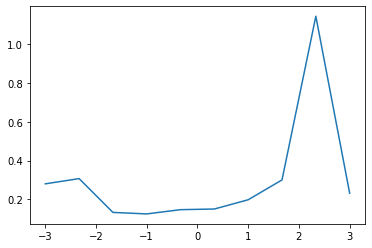

In [406]:
nbeta = 10
loss = np.zeros((nbeta,))
betas = np.linspace(-3,3,nbeta)
t = -1
W0mx,W0my,W0sx,W0sy,s020,k0 = [Wstar_t2[i][t].copy() for i in range(6)]
for ibeta,beta in enumerate(betas):
    perturbationY = 0*beta*np.array(((-1,0,0),(0,0,-1),(0,-1,0))) #beta*np.array(((2,0,0),(0,0,0),(0,0,0))) #perturbationY = beta*np.array(((0,0,0),(0,0,-1),(0,0,0))) # np.array(((0,0,0),(-1,0,0),(0,0,0)))
    perturbationX = 0*beta*np.array(((-1,0,0),(0,0,0))) #beta*np.array(((-1,0,0),(0,0,0))) #perturbationX = beta*np.array(((0,0,1),(0,0,0)))
    perturbationSY = beta*np.array(((0,0,0),(0,0,1),(0,0,0)))
    loss[ibeta] = evaluate_LW(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=perturbationX+W0mx.copy(),W0my=perturbationY+W0my.copy(),W0sx=W0sx.copy(),W0sy=perturbationSY+W0sy.copy(),s020=s020.copy(),k0=k0.copy(),bounds=bounds,weight=weight)
plt.figure()
plt.plot(betas,loss)

In [412]:
niter = int(1e3)
eta = 3
gamma = 0.0
weight = np.array((1,1,1))
beta = 0
perturbationY = 0*beta*np.array(((-1,0,0),(0,0,-1),(0,-1,0))) #beta*np.array(((2,0,0),(0,0,0),(0,0,0))) #perturbationY = beta*np.array(((0,0,0),(0,0,-1),(0,0,0))) # np.array(((0,0,0),(-1,0,0),(0,0,0)))
perturbationX = 0*beta*np.array(((-1,0,0),(0,0,0))) #beta*np.array(((-1,0,0),(0,0,0))) #perturbationX = beta*np.array(((0,0,1),(0,0,0)))
perturbationSY = beta*np.array(((0,0,0),(0,0,1),(0,0,0)))
# thisY0 = np.ones_like(Y0)
Y0 = [np.concatenate([x.mean(0)[:,np.newaxis] for x in Yhat[ialign]],axis=1) for ialign in range(npixels)]
Wstar_t2 = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=perturbationX+W0mx.copy(),W0my=perturbationY+W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),k0=k0.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma,barrier_wt=3e-4)#,eta_decay=eta_decay)

(36,)
0
stability: -0.26795
(array([-1.02792243e-03,  3.09937190e-04,  6.34936218e-04,  4.39745878e-04,
       -5.62294993e-04, -6.54260536e-04, -3.06986738e-05,  9.20862978e-05,
        3.38082863e-04, -8.50804104e-04,  2.89378921e-04,  9.08728384e-04,
       -2.71158093e-03, -2.27401192e-04,  5.32883918e-04,  1.18298132e-04,
        1.47374714e-04,  1.35503184e-04,  7.31696494e-04, -1.27676284e-04,
        1.64046738e-04,  3.17374235e-04,  1.84748869e-04,  2.16305663e-04,
        3.59739490e-04,  9.18035070e-05,  2.32220038e-04,  2.14949361e-03,
        3.04682830e-04,  9.44880366e-04,  5.65871408e-04, -2.03569867e-04,
       -5.48645930e-06, -3.06233876e-04,  3.95448309e-04, -1.56070807e-04]), array([[ 1.09036742e-03, -1.32050392e-04, -1.32050392e-04],
       [ 3.28543251e-04,  1.46199250e-05, -9.41972573e-05],
       [ 3.28543251e-04, -9.41972573e-05,  1.46199250e-05]]))
loss: 0.09355
1
stability: -0.26718
(array([-1.04098503e-03,  3.12870672e-04,  6.30935264e-04,  4.25762578e-04,


stability: -0.25772
(array([-1.15212141e-03,  3.42547525e-04,  5.87968761e-04,  3.35718118e-04,
       -5.11729592e-04, -6.02488569e-04, -1.04781717e-04,  3.90544940e-04,
        5.25660027e-04, -1.74601305e-03,  3.52478561e-04,  8.78076626e-04,
       -3.86907220e-03, -6.98402199e-05,  3.10592655e-04,  1.49457592e-04,
        1.52701814e-04,  9.83677853e-05,  4.44268599e-04, -9.99619221e-05,
        1.80066795e-04,  2.58394168e-04,  1.85952565e-04,  1.73258340e-04,
        3.78734788e-04,  1.23752134e-04,  1.87397329e-04,  1.49542060e-03,
        3.74158392e-04,  8.34245600e-04,  6.57017619e-04, -1.93585542e-04,
       -5.02736313e-06, -2.43380921e-04,  3.71294232e-04, -1.92108740e-04]), array([[ 1.11765357e-03,  1.31441679e-04,  1.31441679e-04],
       [-3.46593392e-04,  2.31913805e-05, -1.04713631e-04],
       [-3.46593392e-04, -1.04713631e-04,  2.31913805e-05]]))
loss: 0.09393
11
stability: -0.25629
(array([-1.16356229e-03,  3.46185629e-04,  5.82261388e-04,  3.31785679e-04,
       

stability: -0.24507
(array([-1.23201482e-03,  3.72144657e-04,  5.26809639e-04,  2.78098276e-04,
       -4.63577622e-04, -5.38663401e-04, -9.22634245e-05,  4.15998990e-04,
        4.40193308e-04, -1.95239164e-03,  4.22955302e-04,  8.34890078e-04,
       -4.04764390e-03,  5.21803274e-05,  8.84578039e-05,  1.46262064e-04,
        1.57807659e-04,  3.30754626e-05,  1.82701956e-04, -7.53092200e-05,
        1.89471801e-04,  1.71971268e-04,  1.81704565e-04,  1.04436939e-04,
        3.51731152e-04,  1.66404634e-04,  9.57892703e-05,  7.65676933e-04,
        4.11386431e-04,  6.41932324e-04,  7.00072637e-04, -1.81669838e-04,
       -4.67141581e-06, -9.83343556e-05,  3.20889930e-04, -2.22554800e-04]), array([[ 1.15352735e-03,  1.30783246e-04,  1.30783246e-04],
       [-3.67009416e-04,  3.53059276e-05, -1.18526638e-04],
       [-3.67009416e-04, -1.18526638e-04,  3.53059276e-05]]))
loss: 0.09415
21
stability: -0.24346
(array([-1.23703748e-03,  3.74826678e-04,  5.19164733e-04,  2.72107053e-04,
       

stability: -0.23008
(array([-1.23154082e-03,  3.86244464e-04,  4.46802102e-04,  2.50548530e-04,
       -4.06633351e-04, -4.67321468e-04,  2.34705026e-05,  4.21859301e-04,
        3.37784232e-04, -2.06253722e-03,  4.89687308e-04,  7.72689287e-04,
       -3.85554566e-03,  1.23015248e-04, -1.57042014e-04,  1.03583797e-04,
        1.62261700e-04, -8.97647099e-05, -2.12043592e-05, -5.44053151e-05,
        1.77868206e-04,  6.58290262e-05,  1.72138853e-04, -1.87020581e-05,
        2.60001517e-04,  2.17147348e-04, -1.11559559e-04,  6.90259659e-05,
        4.11559111e-04,  2.96472703e-04,  6.93337612e-04, -1.63867246e-04,
       -5.25743802e-06,  9.52341492e-05,  2.50207702e-04, -2.44325590e-04]), array([[ 1.19514385e-03,  1.27749672e-04,  1.27749672e-04],
       [-3.89203112e-04,  5.43633840e-05, -1.37567711e-04],
       [-3.89203112e-04, -1.37567711e-04,  5.43633840e-05]]))
loss: 0.09420
31
stability: -0.22851
(array([-1.22603669e-03,  3.85820309e-04,  4.37951458e-04,  2.47726896e-04,
       

stability: -0.21917
(array([-1.13101725e-03,  3.76676391e-04,  3.65236604e-04,  2.28621846e-04,
       -3.29167778e-04, -4.30312395e-04,  1.99276838e-04,  1.66349713e-04,
       -1.38496070e-05, -1.13036570e-03,  5.15501290e-04,  6.78937894e-04,
       -2.70168459e-03,  2.01334091e-04, -4.16164648e-04,  4.66600360e-05,
        1.63564963e-04, -2.20140066e-04, -7.82953311e-05, -3.97416330e-05,
        1.32713594e-04, -3.29909407e-06,  1.59369681e-04, -1.45884350e-04,
        1.45535851e-04,  2.62149062e-04, -3.74818428e-04, -2.45180512e-04,
        3.80039078e-04, -5.25610100e-05,  6.26106198e-04, -1.40079390e-04,
       -6.84647943e-06,  3.02808154e-04,  1.67967191e-04, -2.65262488e-04]), array([[ 1.22465757e-03, -1.24878523e-04, -1.24878523e-04],
       [ 4.06055074e-04,  7.20862412e-05, -1.54897240e-04],
       [ 4.06055074e-04, -1.54897240e-04,  7.20862412e-05]]))
loss: 0.09426
41
stability: -0.21836
(array([-1.11567435e-03,  3.74881412e-04,  3.57732730e-04,  2.30529790e-04,
       

stability: -0.21289
(array([-9.58466606e-04,  3.53790157e-04,  2.94131096e-04,  2.20513579e-04,
       -2.67721143e-04, -3.80232552e-04,  3.85271414e-04,  4.00346125e-04,
        1.59511070e-04, -1.60756566e-03,  5.06259948e-04,  5.83279191e-04,
       -3.12915304e-03,  2.36848978e-04, -5.52928239e-04, -1.43888506e-05,
        1.61670646e-04, -3.05218187e-04, -5.67792448e-05, -3.13256330e-05,
        7.66081923e-05, -4.75456109e-05,  1.45191991e-04, -2.27294455e-04,
        2.23848984e-05,  2.97468566e-04, -5.81283867e-04, -3.19796206e-04,
        3.24591615e-04, -2.65756913e-04,  5.11964404e-04, -1.19274394e-04,
       -7.35109778e-06,  4.36864890e-04,  9.00237686e-05, -2.76755076e-04]), array([[ 1.23608318e-03,  1.22779299e-04,  1.22779299e-04],
       [-4.15581813e-04,  8.65611196e-05, -1.69120036e-04],
       [-4.15581813e-04, -1.69120036e-04,  8.65611196e-05]]))
loss: 0.09404
51
stability: -0.21204
(array([-9.35105842e-04,  3.48905539e-04,  2.86360703e-04,  2.23664882e-04,
       

stability: -0.21092
(array([-7.92006528e-04,  3.33219835e-04,  2.39252736e-04,  1.42889665e-04,
       -2.30032790e-04, -3.10501126e-04,  4.87845680e-04,  1.41694548e-04,
       -1.28439168e-04, -4.02524134e-04,  4.89399673e-04,  5.01396085e-04,
       -2.20692932e-03,  2.40589643e-04, -5.50549422e-04, -6.53450434e-05,
        1.57613342e-04, -3.16873257e-04, -7.83355056e-06, -2.88368806e-05,
        3.33057882e-05, -7.47786239e-05,  1.31624349e-04, -2.40465819e-04,
       -7.82076931e-05,  3.20206675e-04, -6.41140968e-04, -2.73262404e-04,
        2.58160894e-04, -3.08546852e-04,  3.74092171e-04, -1.05063638e-04,
       -5.71068047e-06,  4.50394079e-04,  2.82418117e-05, -2.82131513e-04]), array([[ 1.22939535e-03, -1.21797920e-04, -1.21797920e-04],
       [ 4.17854646e-04,  9.64740480e-05, -1.79268938e-04],
       [ 4.17854646e-04, -1.79268938e-04,  9.64740480e-05]]))
loss: 0.09380
61
stability: -0.21102
(array([-7.79416301e-04,  3.32092358e-04,  2.34577053e-04,  1.26228750e-04,
       

stability: -0.21294
(array([-6.83274265e-04,  3.26342985e-04,  1.99936239e-04, -1.20302678e-05,
       -2.24089935e-04, -2.30064920e-04,  4.83287018e-04,  1.31276764e-04,
       -1.47885022e-04, -1.35606494e-04,  4.81105368e-04,  4.37503421e-04,
       -2.50385941e-03,  2.13755570e-04, -4.50132263e-04, -9.59267710e-05,
        1.53036991e-04, -2.67529742e-04, -3.69456326e-07, -2.88686626e-05,
        1.16063599e-05, -1.03762676e-04,  1.21766749e-04, -2.00034744e-04,
       -1.31764493e-04,  3.29600499e-04, -5.52984107e-04, -3.01360495e-04,
        2.04357625e-04, -2.46786404e-04,  2.47712305e-04, -1.00490308e-04,
       -2.86487753e-06,  4.04793011e-04, -2.54035387e-05, -2.79957184e-04]), array([[ 1.21131431e-03, -1.23950755e-04, -1.23950755e-04],
       [ 4.15133867e-04,  9.87696382e-05, -1.83728853e-04],
       [ 4.15133867e-04, -1.83728853e-04,  9.87696382e-05]]))
loss: 0.09335
71
stability: -0.21324
(array([-6.79327278e-04,  3.26693762e-04,  1.96154869e-04, -2.82973786e-05,
       

stability: -0.21639
(array([-6.30629820e-04,  3.25796925e-04,  1.72511681e-04, -1.31845172e-04,
       -2.38706703e-04, -1.54512039e-04,  4.39992199e-04,  1.18447704e-04,
       -1.53281310e-04,  3.94044215e-06,  4.80794521e-04,  3.83812708e-04,
       -2.79866631e-03,  1.48745671e-04, -3.03743649e-04, -9.97724042e-05,
        1.49669043e-04, -2.10138912e-04,  6.96449437e-07, -3.18002351e-05,
        7.91849288e-07, -1.15461097e-04,  1.13880443e-04, -1.54149485e-04,
       -1.20787190e-04,  3.33221783e-04, -4.33816227e-04, -3.23398464e-04,
        1.58051249e-04, -1.80066188e-04,  1.74688154e-04, -1.01396322e-04,
       -6.01347738e-07,  3.25180594e-04, -3.66386470e-05, -2.68512399e-04]), array([[ 1.19080808e-03, -1.26985603e-04, -1.26985603e-04],
       [ 4.10901338e-04,  9.77892685e-05, -1.85424808e-04],
       [ 4.10901338e-04, -1.85424808e-04,  9.77892685e-05]]))
loss: 0.09306
81
stability: -0.21679
(array([-6.31863279e-04,  3.27058041e-04,  1.68760436e-04, -1.45937579e-04,
       

stability: -0.22058
(array([-6.11943470e-04,  3.27597556e-04,  1.52425503e-04, -1.83743632e-04,
       -2.53998141e-04, -1.01520060e-04,  3.97570127e-04,  1.08382835e-04,
       -1.55798985e-04,  7.28642028e-05,  4.80717613e-04,  3.37425900e-04,
       -2.96894489e-03,  9.52599066e-05, -1.86239430e-04, -8.75786203e-05,
        1.46868539e-04, -1.61486806e-04,  1.81077662e-05, -3.69405366e-05,
       -5.09044481e-06, -1.06446763e-04,  1.07205419e-04, -1.16150753e-04,
       -7.38581657e-05,  3.32221135e-04, -3.27350273e-04, -2.88141679e-04,
        1.17722752e-04, -1.30229699e-04,  1.47267095e-04, -1.02946906e-04,
        8.67586051e-07,  2.61284545e-04, -3.77855286e-05, -2.57557543e-04]), array([[ 1.16990727e-03, -1.29977226e-04, -1.29977226e-04],
       [ 4.06170641e-04,  9.50637968e-05, -1.85315280e-04],
       [ 4.06170641e-04, -1.85315280e-04,  9.50637968e-05]]))
loss: 0.09295
91
stability: -0.22103
(array([-6.11043853e-04,  3.27952278e-04,  1.50432142e-04, -1.88396029e-04,
       

stability: -0.22515
(array([-6.06592349e-04,  3.29815365e-04,  1.35929346e-04, -1.93902822e-04,
       -2.61587566e-04, -7.16807985e-05,  3.62392345e-04,  1.02570851e-04,
       -1.61325053e-04,  1.17721051e-04,  4.79755220e-04,  2.95270913e-04,
       -3.05604383e-03,  6.93486786e-05, -1.17387091e-04, -7.05223384e-05,
        1.44958145e-04, -1.24228785e-04,  3.90102218e-05, -4.17783809e-05,
       -9.44530090e-06, -9.04578678e-05,  1.02142937e-04, -8.77003051e-05,
       -1.93787839e-05,  3.29961433e-04, -2.44834546e-04, -2.39394595e-04,
        8.68213137e-05, -9.64082008e-05,  1.42543615e-04, -1.03224387e-04,
        1.74978896e-06,  2.09274918e-04, -3.31546292e-05, -2.51280816e-04]), array([[ 1.14951105e-03, -1.32731759e-04, -1.32731759e-04],
       [ 4.01349029e-04,  9.14590108e-05, -1.84144962e-04],
       [ 4.01349029e-04, -1.84144962e-04,  9.14590108e-05]]))
loss: 0.09300
101
stability: -0.22562
(array([-6.06102820e-04,  3.29689323e-04,  1.35000285e-04, -1.90820313e-04,
      

stability: -0.22991
(array([-6.02717322e-04,  3.31518089e-04,  1.21115163e-04, -1.84678192e-04,
       -2.64848346e-04, -5.59435529e-05,  3.35370427e-04,  9.89800017e-05,
       -1.68753789e-04,  1.61769707e-04,  4.76956871e-04,  2.54086406e-04,
       -3.10192259e-03,  5.84033883e-05, -7.79381126e-05, -5.75420419e-05,
        1.42765286e-04, -9.58861860e-05,  4.66851076e-05, -4.74379567e-05,
       -1.26860268e-05, -8.06937011e-05,  9.72507994e-05, -6.60555959e-05,
        1.93128043e-05,  3.26189966e-04, -1.81396046e-04, -2.25490896e-04,
        5.62851653e-05, -7.40955749e-05,  1.43458313e-04, -1.02746121e-04,
        2.25096824e-06,  1.75043198e-04, -4.14310562e-05, -2.47033279e-04]), array([[ 1.13022182e-03, -1.35397944e-04, -1.35397944e-04],
       [ 3.96621986e-04,  8.73322586e-05, -1.82361041e-04],
       [ 3.96621986e-04, -1.82361041e-04,  8.73322586e-05]]))
loss: 0.09311
111
stability: -0.23039
(array([-6.03043847e-04,  3.31830039e-04,  1.19611728e-04, -1.85731357e-04,
      

stability: -0.23475
(array([-5.99707253e-04,  3.34648445e-04,  1.06488185e-04, -1.72116903e-04,
       -2.64028424e-04, -5.14890649e-05,  3.08673103e-04,  9.84634224e-05,
       -1.79486160e-04,  2.08069383e-04,  4.77471202e-04,  2.11409664e-04,
       -3.15284344e-03,  6.17178851e-05, -6.32967058e-05, -4.80830410e-05,
        1.41350853e-04, -7.36134487e-05,  4.63291261e-05, -5.19172612e-05,
       -1.46601471e-05, -7.64315812e-05,  9.36343786e-05, -4.94794809e-05,
        4.74288969e-05,  3.23319666e-04, -1.31155154e-04, -2.35444096e-04,
        3.27631658e-05, -5.69651040e-05,  1.41228963e-04, -1.02130154e-04,
        2.48920085e-06,  1.46041212e-04, -3.88112706e-05, -2.45344631e-04]), array([[ 1.11228175e-03, -1.38078166e-04, -1.38078166e-04],
       [ 3.92066511e-04,  8.28347640e-05, -1.80176692e-04],
       [ 3.92066511e-04, -1.80176692e-04,  8.28347640e-05]]))
loss: 0.09325
121
stability: -0.23525
(array([-6.00530592e-04,  3.34997404e-04,  1.05426516e-04, -1.70377720e-04,
      

stability: -0.23964
(array([-5.97198791e-04,  3.39064027e-04,  9.06824893e-05, -1.67778863e-04,
       -2.63546528e-04, -5.24218959e-05,  2.77208511e-04,  1.00248680e-04,
       -1.93296636e-04,  2.62012245e-04,  4.76909889e-04,  1.68123142e-04,
       -3.25170854e-03,  7.46566432e-05, -6.70662669e-05, -4.34519260e-05,
        1.39973960e-04, -5.61899321e-05,  4.08520892e-05, -5.57965392e-05,
       -1.59277392e-05, -7.74712652e-05,  9.06099969e-05, -3.65042089e-05,
        6.21730624e-05,  3.20447943e-04, -9.18502297e-05, -2.59945519e-04,
        1.25432948e-05, -4.39213008e-05,  1.34495875e-04, -1.01743171e-04,
        2.63203058e-06,  1.25006958e-04, -3.76455019e-05, -2.45098257e-04]), array([[ 1.09591981e-03, -1.40878477e-04, -1.40878477e-04],
       [ 3.87741672e-04,  7.79870811e-05, -1.77674040e-04],
       [ 3.87741672e-04, -1.77674040e-04,  7.79870811e-05]]))
loss: 0.09335
131
stability: -0.24013
(array([-5.97229076e-04,  3.39702081e-04,  8.85116084e-05, -1.69941762e-04,
      

stability: -0.24461
(array([-5.90243397e-04,  3.46453914e-04,  7.12756001e-05, -1.73926235e-04,
       -2.67808984e-04, -5.27812960e-05,  2.42475532e-04,  3.91254666e-04,
        7.82557277e-05, -4.33053713e-04,  4.80444475e-04,  1.16435173e-04,
       -4.16811938e-03,  8.32112989e-05, -6.90329140e-05, -4.24047580e-05,
        1.38657921e-04, -4.18998933e-05,  2.57857804e-05, -5.87455805e-05,
       -1.62705275e-05, -8.58268483e-05,  8.77982754e-05, -2.56864143e-05,
        6.95082910e-05,  3.19039502e-04, -5.92956177e-05, -3.16158857e-04,
       -5.73152550e-06, -3.29520041e-05,  1.20036779e-04, -1.03004514e-04,
        2.71244742e-06,  1.06524783e-04, -3.44356572e-05, -2.43490697e-04]), array([[ 1.08106821e-03,  1.43850252e-04,  1.43850252e-04],
       [-3.83597869e-04,  7.26928334e-05, -1.74778252e-04],
       [-3.83597869e-04, -1.74778252e-04,  7.26928334e-05]]))
loss: 0.09333
141
stability: -0.24454
(array([-5.78109184e-04,  3.44666114e-04,  6.55253798e-05, -1.68826685e-04,
      

stability: -0.24685
(array([-5.29444487e-04,  3.39206377e-04,  3.77346461e-05, -1.50619827e-04,
       -2.69458579e-04, -4.13223859e-05,  2.69224246e-04,  9.57977591e-05,
       -2.27667524e-04,  5.05839178e-04,  4.67408020e-04,  3.26115556e-05,
       -3.36226814e-03,  6.15686884e-05, -4.38669226e-05, -6.08547895e-05,
        1.36265998e-04, -4.87085786e-05,  1.91972626e-05, -6.55481588e-05,
       -2.41339129e-05, -9.99972498e-05,  8.09958773e-05, -3.45408486e-05,
        2.35024193e-05,  3.19937501e-04, -7.37888858e-05, -3.45093991e-04,
       -4.62953317e-05, -5.95031190e-05,  1.03866324e-04, -9.98336842e-05,
        2.76972800e-06,  9.31613629e-05, -2.02836032e-05, -2.36514558e-04]), array([[ 1.06919135e-03, -1.43935513e-04, -1.43935513e-04],
       [ 3.79893114e-04,  7.30708862e-05, -1.75354000e-04],
       [ 3.79893114e-04, -1.75354000e-04,  7.30708862e-05]]))
loss: 0.09353
151
stability: -0.24758
(array([-5.38337273e-04,  3.40868000e-04,  3.95992244e-05, -1.57778550e-04,
      

stability: -0.24994
(array([-4.93773561e-04,  3.34239226e-04,  1.52527998e-05, -1.41187199e-04,
       -2.69823312e-04, -3.47319580e-05,  2.71094776e-04,  3.79204597e-04,
        4.93678338e-05, -1.37974133e-04,  4.59141361e-04, -2.54551411e-05,
       -4.11941675e-03,  4.78016202e-05, -2.41182236e-05, -6.82258823e-05,
        1.34564495e-04, -4.82089662e-05,  2.53969772e-05, -7.12020643e-05,
       -2.85571190e-05, -1.02806044e-04,  7.75006606e-05, -3.54392359e-05,
        7.46144802e-06,  3.17286994e-04, -7.19291263e-05, -3.35730067e-04,
       -7.11241253e-05, -7.19805211e-05,  8.86336229e-05, -9.75642806e-05,
        2.78237334e-06,  7.51170778e-05, -2.12464417e-05, -2.30302627e-04]), array([[ 1.05526347e-03,  1.43871196e-04,  1.43871196e-04],
       [-3.75157700e-04,  7.25147875e-05, -1.74810354e-04],
       [-3.75157700e-04, -1.74810354e-04,  7.25147875e-05]]))
loss: 0.09351
161
stability: -0.25023
(array([-4.93845841e-04,  3.34067773e-04,  1.46547607e-05, -1.34168400e-04,
      

stability: -0.25386
(array([-4.80065606e-04,  3.33971432e-04,  1.89649853e-06, -1.39315613e-04,
       -2.72033969e-04, -3.08841001e-05,  2.54885905e-04,  3.78741469e-04,
        4.41361591e-05, -7.58983560e-05,  4.60120465e-04, -6.37443572e-05,
       -4.14746713e-03,  3.56501679e-05, -2.41944333e-06, -6.75784714e-05,
        1.33072863e-04, -4.09919895e-05,  2.85603146e-05, -7.52163260e-05,
       -2.92634770e-05, -1.02581450e-04,  7.39969330e-05, -3.11983424e-05,
        1.24182442e-05,  3.17997404e-04, -5.45427658e-05, -3.33666753e-04,
       -9.36813320e-05, -6.88425672e-05,  7.36098693e-05, -9.73291651e-05,
        2.77403405e-06,  6.00964020e-05, -1.51008716e-05, -2.24136958e-04]), array([[ 1.04041858e-03,  1.44065342e-04,  1.44065342e-04],
       [-3.69872361e-04,  7.06580358e-05, -1.73089478e-04],
       [-3.69872361e-04, -1.73089478e-04,  7.06580358e-05]]))
loss: 0.09354
171
stability: -0.25420
(array([-4.84218752e-04,  3.34731737e-04,  7.59671172e-07, -1.35932441e-04,
      

stability: -0.25774
(array([-4.76768090e-04,  3.34708613e-04, -9.58919849e-06, -1.41629240e-04,
       -2.71786969e-04, -3.26052786e-05,  2.28177739e-04,  3.80803568e-04,
        3.70894884e-05, -3.15217582e-05,  4.61257930e-04, -9.57459218e-05,
       -4.20675160e-03,  3.77078070e-05,  3.35534255e-07, -6.48349609e-05,
        1.32274871e-04, -3.46696739e-05,  3.28528635e-05, -7.74103026e-05,
       -2.95116603e-05, -1.00498969e-04,  7.20964865e-05, -2.67675977e-05,
        2.25969084e-05,  3.19247117e-04, -3.94603617e-05, -3.27262627e-04,
       -1.06513295e-04, -6.48507515e-05,  6.37366269e-05, -9.66422214e-05,
        2.74079400e-06,  3.69101723e-05, -9.90362935e-06, -2.21125797e-04]), array([[ 1.02603662e-03,  1.43982436e-04,  1.43982436e-04],
       [-3.64517955e-04,  6.89612734e-05, -1.71265971e-04],
       [-3.64517955e-04, -1.71265971e-04,  6.89612734e-05]]))
loss: 0.09355
181
stability: -0.25807
(array([-4.77018890e-04,  3.35064049e-04, -1.08204174e-05, -1.40808825e-04,
      

stability: -0.26285
(array([-4.97373011e-04,  3.43386642e-04, -1.26278152e-05, -1.66888258e-04,
       -2.83219039e-04, -2.67146475e-05,  1.76614235e-04,  3.87932593e-04,
        4.08194433e-05, -4.58693239e-05,  4.72942024e-04, -1.04803648e-04,
       -4.35328332e-03,  2.57487912e-05,  2.17038696e-05, -5.76780105e-05,
        1.31834246e-04, -2.18037094e-05,  1.89501068e-05, -7.77104888e-05,
       -2.53502890e-05, -1.04699497e-04,  7.32600888e-05, -1.45577804e-05,
        4.54942725e-05,  3.17568162e-04, -8.91067402e-06, -3.75380427e-04,
       -1.04237934e-04, -4.63344083e-05,  5.35827245e-05, -1.00227331e-04,
        2.81120471e-06,  3.65770901e-05, -2.66044533e-05, -2.13278110e-04]), array([[ 1.01227051e-03,  1.45140816e-04,  1.45140816e-04],
       [-3.59360620e-04,  6.45394258e-05, -1.67590721e-04],
       [-3.59360620e-04, -1.67590721e-04,  6.45394258e-05]]))
loss: 0.09345
191
stability: -0.26310
(array([-4.97361023e-04,  3.43805500e-04, -1.47298415e-05, -1.63118000e-04,
      

stability: -0.26589
(array([-4.90700572e-04,  3.46538813e-04, -2.80977731e-05, -1.48009328e-04,
       -2.83995129e-04, -3.16912375e-05,  1.64083732e-04,  3.92395089e-04,
        3.05615252e-05,  1.25717705e-05,  4.77834853e-04, -1.47095049e-04,
       -4.36618029e-03,  3.27226615e-05,  1.22246950e-05, -6.29272273e-05,
        1.31442936e-04, -2.29698967e-05,  1.52047033e-05, -8.02191154e-05,
       -2.57894625e-05, -1.09950727e-04,  7.27626231e-05, -1.48597091e-05,
        3.21353538e-05,  3.16715028e-04, -1.09124661e-05, -3.88713226e-04,
       -1.11108649e-04, -4.86554130e-05,  5.18384110e-05, -9.97204708e-05,
        2.68499440e-06,  3.59873557e-05, -2.41891102e-05, -2.10709178e-04]), array([[ 1.00195464e-03,  1.45032662e-04,  1.45032662e-04],
       [-3.55079819e-04,  6.31688434e-05, -1.65964258e-04],
       [-3.55079819e-04, -1.65964258e-04,  6.31688434e-05]]))
loss: 0.09346
201
stability: -0.26617
(array([-4.89928603e-04,  3.46740802e-04, -2.96942005e-05, -1.45074878e-04,
      

stability: -0.26892
(array([-4.80733758e-04,  3.48108563e-04, -3.97920965e-05, -1.40101762e-04,
       -2.88240374e-04, -2.98406658e-05,  1.54855573e-04,  3.93369451e-04,
        2.51486293e-05,  6.22060228e-05,  4.83172617e-04, -1.81784272e-04,
       -4.36995399e-03,  2.17107627e-05,  2.75492298e-05, -6.65082593e-05,
        1.30428096e-04, -2.27566883e-05,  1.73577357e-05, -8.34872640e-05,
       -2.55740167e-05, -1.12442469e-04,  7.09774712e-05, -1.45276310e-05,
        2.52381301e-05,  3.17105276e-04, -9.00438957e-06, -3.87552577e-04,
       -1.25322096e-04, -4.94465189e-05,  4.20816106e-05, -1.00028999e-04,
        2.59307993e-06,  3.80604430e-05, -1.84670497e-05, -2.04380318e-04]), array([[ 9.91648071e-04,  1.44639475e-04,  1.44639475e-04],
       [-3.50573944e-04,  6.19540351e-05, -1.64221831e-04],
       [-3.50573944e-04, -1.64221831e-04,  6.19540351e-05]]))
loss: 0.09345
211
stability: -0.26926
(array([-4.83356238e-04,  3.48739051e-04, -4.08264528e-05, -1.40539675e-04,
      

stability: -0.27215
(array([-4.84373896e-04,  3.52401761e-04, -5.00988465e-05, -1.45280457e-04,
       -2.91314859e-04, -3.31425635e-05,  1.27222524e-04,  3.98910928e-04,
        1.80506312e-05,  9.17980073e-05,  4.89864255e-04, -2.10027199e-04,
       -4.44555657e-03,  2.75952393e-05,  2.03609146e-05, -6.64184108e-05,
        1.29923530e-04, -2.09427882e-05,  1.91726300e-05, -8.54104368e-05,
       -2.45477219e-05, -1.13018312e-04,  7.12237815e-05, -1.19294226e-05,
        2.83620249e-05,  3.16246302e-04, -3.83671422e-06, -3.87538861e-04,
       -1.29133855e-04, -4.63889615e-05,  3.63109026e-05, -1.00432767e-04,
        2.53312677e-06,  3.68228189e-05, -1.93921515e-05, -2.01284538e-04]), array([[ 9.81635818e-04,  1.44266761e-04,  1.44266761e-04],
       [-3.46031854e-04,  6.03548416e-05, -1.62064445e-04],
       [-3.46031854e-04, -1.62064445e-04,  6.03548416e-05]]))
loss: 0.09339
221
stability: -0.27246
(array([-4.82664341e-04,  3.52769055e-04, -5.05046268e-05, -1.41879839e-04,
      

stability: -0.27532
(array([-4.88519672e-04,  3.57311217e-04, -5.73743514e-05, -1.45759849e-04,
       -2.96808259e-04, -3.27298339e-05,  1.05197610e-04,  4.03579304e-04,
        1.49782813e-05,  1.09214578e-04,  5.00598465e-04, -2.32241514e-04,
       -4.48466341e-03,  2.29032177e-05,  2.71853925e-05, -6.59078761e-05,
        1.29313673e-04, -1.88888292e-05,  1.82158068e-05, -8.76274385e-05,
       -2.28945361e-05, -1.14649879e-04,  7.11183878e-05, -8.71695641e-06,
        3.27859931e-05,  3.16034510e-04,  1.92030575e-06, -3.95737548e-04,
       -1.35082769e-04, -4.15128717e-05,  3.07434069e-05, -1.01653008e-04,
        2.47194463e-06,  4.15494365e-05, -1.71959039e-05, -1.95703230e-04]), array([[ 9.72383995e-04,  1.43877889e-04,  1.43877889e-04],
       [-3.41614834e-04,  5.86241979e-05, -1.59717637e-04],
       [-3.41614834e-04, -1.59717637e-04,  5.86241979e-05]]))
loss: 0.09333
231
stability: -0.27563
(array([-4.88223648e-04,  3.58097797e-04, -5.82225229e-05, -1.44039058e-04,
      

stability: -0.27837
(array([-4.91882744e-04,  3.63136702e-04, -6.54568510e-05, -1.50073521e-04,
       -3.04359169e-04, -3.03557784e-05,  8.41399034e-05,  4.08509994e-04,
        1.24838939e-05,  1.26526914e-04,  5.13485588e-04, -2.56712530e-04,
       -4.53019089e-03,  1.42851963e-05,  3.82469224e-05, -6.62046848e-05,
        1.28695404e-04, -1.75085001e-05,  1.48166863e-05, -8.97764241e-05,
       -2.14532668e-05, -1.17960505e-04,  7.16063230e-05, -5.53781060e-06,
        3.53818617e-05,  3.14958036e-04,  5.63081919e-06, -4.11756704e-04,
       -1.38811978e-04, -3.70342298e-05,  2.69543015e-05, -1.03316922e-04,
        2.42395345e-06,  5.46027711e-05, -2.01318247e-05, -1.88918174e-04]), array([[ 9.64014767e-04,  1.43455714e-04,  1.43455714e-04],
       [-3.37360163e-04,  5.68451402e-05, -1.57250745e-04],
       [-3.37360163e-04, -1.57250745e-04,  5.68451402e-05]]))
loss: 0.09325
241
stability: -0.27867
(array([-4.92077751e-04,  3.63822835e-04, -6.72259586e-05, -1.56011436e-04,
      

stability: -0.28130
(array([-4.96411123e-04,  3.70282773e-04, -7.53638117e-05, -1.63820540e-04,
       -3.14105041e-04, -2.63490283e-05,  5.69532848e-05,  4.14840598e-04,
        8.61249872e-06,  1.47662799e-04,  5.26889213e-04, -2.83166379e-04,
       -4.61730626e-03,  7.40683559e-06,  4.61040249e-05, -6.76203658e-05,
        1.28694562e-04, -1.65230662e-05,  5.85061085e-06, -9.07696711e-05,
       -1.99003443e-05, -1.24564061e-04,  7.41254963e-05, -2.12362927e-06,
        3.51821033e-05,  3.12673891e-04,  8.62668014e-06, -4.44752266e-04,
       -1.32879345e-04, -3.35428464e-05,  2.41873646e-05, -1.05334093e-04,
        2.41947419e-06,  6.76958224e-05, -2.50400791e-05, -1.82259302e-04]), array([[ 9.56440370e-04,  1.42981217e-04,  1.42981217e-04],
       [-3.33226214e-04,  5.50172061e-05, -1.54647232e-04],
       [-3.33226214e-04, -1.54647232e-04,  5.50172061e-05]]))
loss: 0.09313
251
stability: -0.28159
(array([-4.97007393e-04,  3.70836051e-04, -7.53753751e-05, -1.61251175e-04,
      

stability: -0.28411
(array([-5.01993727e-04,  3.78363700e-04, -8.38992293e-05, -1.70474109e-04,
       -3.23413541e-04, -2.39732041e-05,  3.46054023e-05,  4.22148986e-04,
        5.40914730e-06,  1.61690729e-04,  5.44456723e-04, -3.08914750e-04,
       -4.67392583e-03,  8.70621318e-07,  5.33831811e-05, -6.78835505e-05,
        1.28137836e-04, -1.55782558e-05,  4.30942101e-06, -9.29379312e-05,
       -1.80205434e-05, -1.27362145e-04,  7.51955781e-05,  1.15274201e-06,
        3.91153648e-05,  3.11308170e-04,  1.13151063e-05, -4.57560310e-04,
       -1.34802795e-04, -2.81273445e-05,  2.27062196e-05, -1.07571352e-04,
        2.38394915e-06,  8.78289305e-05, -2.47389841e-05, -1.75497445e-04]), array([[ 9.49621221e-04,  1.42434054e-04,  1.42434054e-04],
       [-3.29189837e-04,  5.31518203e-05, -1.51902442e-04],
       [-3.29189837e-04, -1.51902442e-04,  5.31518203e-05]]))
loss: 0.09302
261
stability: -0.28439
(array([-5.00351574e-04,  3.78957469e-04, -8.46327962e-05, -1.70658352e-04,
      

stability: -0.28682
(array([-5.07937534e-04,  3.87325790e-04, -9.27900918e-05, -1.79615156e-04,
       -3.33475500e-04, -2.10044254e-05,  1.09627358e-05,  4.30460666e-04,
        2.05472522e-06,  1.75617111e-04,  5.64151146e-04, -3.34952490e-04,
       -4.73743659e-03, -4.75228500e-06,  5.87749755e-05, -6.81719772e-05,
        1.28259107e-04, -1.49418411e-05,  2.76936970e-06, -9.38803638e-05,
       -1.60277133e-05, -1.30381496e-04,  7.82673291e-05,  4.89206064e-06,
        4.36033953e-05,  3.09048804e-04,  1.33255091e-05, -4.71396194e-04,
       -1.27117942e-04, -2.33761268e-05,  2.23954203e-05, -1.09946805e-04,
        2.36209618e-06,  1.04147611e-04, -2.36723165e-05, -1.68674573e-04]), array([[ 9.43417131e-04,  1.41779923e-04,  1.41779923e-04],
       [-3.25207980e-04,  5.12645927e-05, -1.49011307e-04],
       [-3.25207980e-04, -1.49011307e-04,  5.12645927e-05]]))
loss: 0.09291
271
stability: -0.28708
(array([-5.08963409e-04,  3.88353329e-04, -9.38674546e-05, -1.81149384e-04,
      

stability: -0.28940
(array([-5.14417133e-04,  3.96358881e-04, -1.01052974e-04, -1.89659756e-04,
       -3.46063243e-04, -1.52671857e-05, -1.27009647e-05,  4.38713990e-04,
       -2.08759263e-07,  1.88137303e-04,  5.83305080e-04, -3.58142844e-04,
       -4.80197746e-03, -1.37190991e-05,  6.78492707e-05, -6.95892298e-05,
        1.28690977e-04, -1.45184779e-05, -7.43732430e-07, -9.41167760e-05,
       -1.37357097e-05, -1.34723891e-04,  8.22047659e-05,  8.64300105e-06,
        4.42066653e-05,  3.06871363e-04,  1.52592261e-05, -4.89793494e-04,
       -1.15037593e-04, -1.87675759e-05,  2.31321174e-05, -1.12619420e-04,
        2.37839806e-06,  1.21159077e-04, -2.16442760e-05, -1.60887852e-04]), array([[ 9.37879807e-04,  1.41031910e-04,  1.41031910e-04],
       [-3.21277711e-04,  4.93792072e-05, -1.46002269e-04],
       [-3.21277711e-04, -1.46002269e-04,  4.93792072e-05]]))
loss: 0.09277
281
stability: -0.28965
(array([-5.13487521e-04,  3.97074883e-04, -1.01488565e-04, -1.89162217e-04,
      

stability: -0.29191
(array([-5.17978283e-04,  4.05543650e-04, -1.07962141e-04, -1.93761319e-04,
       -3.58733829e-04, -8.72444016e-06, -2.76193356e-05,  4.46642818e-04,
       -4.27019356e-07,  1.97144191e-04,  6.07174229e-04, -3.81248125e-04,
       -4.82368643e-03, -2.82441698e-05,  8.42675212e-05, -7.10177541e-05,
        1.28848309e-04, -1.43811609e-05, -2.02452231e-06, -9.47842832e-05,
       -1.15371911e-05, -1.37955403e-04,  8.54642259e-05,  1.19039256e-05,
        4.50312841e-05,  3.05540738e-04,  1.60558673e-05, -5.02273378e-04,
       -1.06612563e-04, -1.33584503e-05,  2.49059192e-05, -1.15481327e-04,
        2.36412263e-06,  1.46354594e-04, -2.00577788e-05, -1.51617923e-04]), array([[ 9.32755657e-04,  1.40152069e-04,  1.40152069e-04],
       [-3.17327545e-04,  4.74873728e-05, -1.42848064e-04],
       [-3.17327545e-04, -1.42848064e-04,  4.74873728e-05]]))
loss: 0.09266
291
stability: -0.29216
(array([-5.17984721e-04,  4.06500515e-04, -1.08913153e-04, -1.95749423e-04,
      

stability: -0.29438
(array([-5.23094409e-04,  4.15078821e-04, -1.13967183e-04, -1.97422835e-04,
       -3.69553808e-04, -5.57507025e-06, -4.31037569e-05,  4.56147534e-04,
       -1.12046397e-06,  2.02092939e-04,  6.33233139e-04, -4.03555962e-04,
       -4.84203541e-03, -3.63952989e-05,  9.17755362e-05, -7.11930899e-05,
        1.28896772e-04, -1.42992135e-05,  2.38910340e-06, -9.54489692e-05,
       -9.30245935e-06, -1.37790857e-04,  8.85574894e-05,  1.51551842e-05,
        4.98768913e-05,  3.04717077e-04,  1.64816339e-05, -4.98492680e-04,
       -9.89766740e-05, -7.31975468e-06,  2.80693921e-05, -1.18070384e-04,
        2.32498061e-06,  1.63561992e-04, -1.80553383e-05, -1.43524754e-04]), array([[ 9.27906052e-04,  1.39123087e-04,  1.39123087e-04],
       [-3.13316350e-04,  4.55868508e-05, -1.39539332e-04],
       [-3.13316350e-04, -1.39539332e-04,  4.55868508e-05]]))
loss: 0.09256
301
stability: -0.29463
(array([-5.23161554e-04,  4.15825684e-04, -1.14973587e-04, -2.01455898e-04,
      

stability: -0.29681
(array([-5.26847567e-04,  4.23875579e-04, -1.18914881e-04, -2.04473706e-04,
       -3.82578958e-04,  1.20708643e-06, -5.85576149e-05,  4.64987322e-04,
       -3.18142479e-07,  2.08732236e-04,  6.57646609e-04, -4.21001780e-04,
       -4.86419926e-03, -4.88085224e-05,  1.04460460e-04, -7.36546690e-05,
        1.29675869e-04, -1.44870737e-05, -5.47119128e-07, -9.44167645e-05,
       -6.93906500e-06, -1.41715820e-04,  9.36359519e-05,  1.82477101e-05,
        4.58411202e-05,  3.03800041e-04,  1.67814140e-05, -5.12792788e-04,
       -8.11401635e-05, -2.33835804e-06,  3.19170448e-05, -1.20774873e-04,
        2.33111162e-06,  1.71676220e-04, -1.58150820e-05, -1.34413506e-04]), array([[ 9.23295923e-04,  1.37958403e-04,  1.37958403e-04],
       [-3.09233730e-04,  4.37225630e-05, -1.36133653e-04],
       [-3.09233730e-04, -1.36133653e-04,  4.37225630e-05]]))
loss: 0.09245
311
stability: -0.29705
(array([-5.25739168e-04,  4.24225081e-04, -1.17755639e-04, -1.97898318e-04,
      

stability: -0.29924
(array([-5.27987698e-04,  4.30911022e-04, -1.18698986e-04, -1.97753395e-04,
       -3.94019262e-04,  6.76771938e-06, -6.05172950e-05,  1.98792007e-04,
       -2.68054306e-04,  8.13489534e-04,  6.84475880e-04, -4.30694362e-04,
       -4.19728473e-03, -6.77903617e-05,  1.26717975e-04, -7.51948627e-05,
        1.29578751e-04, -1.45005242e-05,  3.52454541e-06, -9.49107625e-05,
       -4.31692577e-06, -1.41420784e-04,  9.63949897e-05,  2.09114218e-05,
        4.32350473e-05,  3.04530168e-04,  1.74097224e-05, -5.04144427e-04,
       -7.50396274e-05,  4.60801674e-06,  3.68038547e-05, -1.23302208e-04,
        2.27830370e-06,  1.83278614e-04, -1.35935399e-05, -1.23940042e-04]), array([[ 9.18727447e-04, -1.36641744e-04, -1.36641744e-04],
       [ 3.05038199e-04,  4.18987290e-05, -1.32635001e-04],
       [ 3.05038199e-04, -1.32635001e-04,  4.18987290e-05]]))
loss: 0.09248
321
stability: -0.29993
(array([-5.29608871e-04,  4.33435348e-04, -1.18408415e-04, -2.04610110e-04,
      

stability: -0.30447
(array([-5.40237127e-04,  4.45096379e-04, -1.05593177e-04, -2.09140794e-04,
       -4.17426215e-04,  2.40977485e-05, -7.27831718e-05,  2.10885392e-04,
       -2.44468938e-04,  7.35949647e-04,  7.28719036e-04, -4.01368175e-04,
       -4.16989949e-03, -1.10184468e-04,  1.80827986e-04, -5.72079260e-05,
        1.30351886e-04, -4.84742283e-06,  1.64221547e-05, -9.22556996e-05,
        1.40285888e-06, -1.25303336e-04,  1.02990183e-04,  3.44959538e-05,
        1.07397256e-04,  3.04394058e-04,  4.14293150e-05, -4.78239448e-04,
       -5.12394775e-05,  3.05413782e-05,  4.68771588e-05, -1.31171855e-04,
        2.37945828e-06,  2.34948151e-04, -1.70683904e-05, -1.05287606e-04]), array([[ 9.12808657e-04, -1.36893592e-04, -1.36893592e-04],
       [ 3.00531761e-04,  3.62582295e-05, -1.26399513e-04],
       [ 3.00531761e-04, -1.26399513e-04,  3.62582295e-05]]))
loss: 0.09241
331
stability: -0.30508
(array([-5.42247004e-04,  4.47176475e-04, -1.04485084e-04, -2.09692528e-04,
      

stability: -0.31000
(array([-5.42378742e-04,  4.57183557e-04, -8.93326551e-05, -1.91104738e-04,
       -4.27759722e-04,  2.16761501e-05, -6.52084929e-05,  2.25852696e-04,
       -2.23159162e-04,  6.81402013e-04,  7.73842265e-04, -3.71478522e-04,
       -4.04048431e-03, -1.24555942e-04,  1.95293255e-04, -5.01327070e-05,
        1.30621829e-04,  1.34125358e-06,  2.79792939e-05, -9.09406694e-05,
        6.66014480e-06, -1.14963635e-04,  1.08379037e-04,  4.46166513e-05,
        1.31305117e-04,  3.04008536e-04,  5.59704971e-05, -4.45689083e-04,
       -3.45405314e-05,  5.44184194e-05,  6.23319888e-05, -1.37090984e-04,
        2.26036745e-06,  2.41429842e-04, -1.75883743e-05, -9.24970415e-05]), array([[ 9.06764456e-04, -1.37086143e-04, -1.37086143e-04],
       [ 2.96100431e-04,  3.04898144e-05, -1.20019715e-04],
       [ 2.96100431e-04, -1.20019715e-04,  3.04898144e-05]]))
loss: 0.09251
341
stability: -0.31057
(array([-5.38475169e-04,  4.57197499e-04, -8.56931590e-05, -1.82307409e-04,
      

stability: -0.31496
(array([-5.26524872e-04,  4.63944009e-04, -7.29615867e-05, -1.47296169e-04,
       -4.24740772e-04,  5.25044439e-06, -2.75476463e-05,  5.12253390e-04,
        6.94954828e-05,  7.36623254e-05,  8.18344986e-04, -3.53422350e-04,
       -4.36458570e-03, -1.27321255e-04,  1.93259761e-04, -5.67332625e-05,
        1.29307600e-04,  2.15864637e-06,  3.64274414e-05, -9.29622450e-05,
        1.01100293e-05, -1.14845430e-04,  1.09361836e-04,  4.86741447e-05,
        1.06077964e-04,  3.05262502e-04,  5.54387861e-05, -4.14322577e-04,
       -4.09922888e-05,  7.02406892e-05,  7.80890859e-05, -1.40243709e-04,
        1.94990228e-06,  2.07189059e-04, -1.44028318e-05, -8.32906080e-05]), array([[ 9.00569730e-04,  1.36714016e-04,  1.36714016e-04],
       [-2.91682072e-04,  2.59631383e-05, -1.14522694e-04],
       [-2.91682072e-04, -1.14522694e-04,  2.59631383e-05]]))
loss: 0.09271
351
stability: -0.31516
(array([-5.26760432e-04,  4.63778441e-04, -7.17815744e-05, -1.41983616e-04,
      

stability: -0.32007
(array([-5.10470890e-04,  4.70490934e-04, -6.05677201e-05, -1.20027951e-04,
       -4.20066124e-04, -1.23726538e-05,  1.70435366e-06,  2.53300863e-04,
       -1.89530321e-04,  6.38463948e-04,  8.60380096e-04, -3.42566307e-04,
       -3.58352815e-03, -1.20896747e-04,  1.79001534e-04, -5.51239727e-05,
        1.28470489e-04,  3.36223695e-06,  5.10842564e-05, -9.35247617e-05,
        1.32696107e-05, -1.06990949e-04,  1.11488299e-04,  5.28616406e-05,
        1.08449707e-04,  3.06632759e-04,  5.66868524e-05, -3.64617591e-04,
       -4.05218065e-05,  8.39297873e-05,  8.84624548e-05, -1.43221071e-04,
        1.69712577e-06,  1.68529038e-04, -1.08689719e-05, -7.65008335e-05]), array([[ 8.93658355e-04, -1.36305552e-04, -1.36305552e-04],
       [ 2.86976510e-04,  2.18198119e-05, -1.09362196e-04],
       [ 2.86976510e-04, -1.09362196e-04,  2.18198119e-05]]))
loss: 0.09308
361
stability: -0.32067
(array([-5.09474563e-04,  4.71998984e-04, -6.01646776e-05, -1.19525426e-04,
      

stability: -0.32462
(array([-4.93207647e-04,  4.76399745e-04, -5.43468272e-05, -1.01915348e-04,
       -4.08534495e-04, -3.65569476e-05,  2.63622172e-05,  5.40975369e-04,
        8.69599395e-05,  7.11169738e-05,  9.02094277e-04, -3.48874483e-04,
       -3.99426972e-03, -9.66418768e-05,  1.41787307e-04, -6.01835541e-05,
        1.27152757e-04,  1.96828813e-06,  5.37290932e-05, -9.48669356e-05,
        1.52178481e-05, -1.09207557e-04,  1.11997369e-04,  5.36583910e-05,
        8.73996449e-05,  3.09248442e-04,  5.08607547e-05, -3.48599211e-04,
       -4.77844551e-05,  9.18441706e-05,  9.37069888e-05, -1.44642715e-04,
        1.43210401e-06,  1.19681805e-04, -6.08795916e-06, -7.52568962e-05]), array([[ 8.86440996e-04,  1.35503288e-04,  1.35503288e-04],
       [-2.82145279e-04,  1.88541912e-05, -1.05112866e-04],
       [-2.82145279e-04, -1.05112866e-04,  1.88541912e-05]]))
loss: 0.09327
371
stability: -0.32487
(array([-4.91721733e-04,  4.76270907e-04, -5.35263468e-05, -9.81667474e-05,
      

stability: -0.32977
(array([-4.73994449e-04,  4.82670833e-04, -4.82726052e-05, -9.16847064e-05,
       -4.11403884e-04, -4.10612481e-05,  5.21869526e-05,  2.82956563e-04,
       -1.72704985e-04,  6.24961242e-04,  9.44111656e-04, -3.52143961e-04,
       -3.28180825e-03, -1.10855089e-04,  1.56290239e-04, -5.36550415e-05,
        1.25831674e-04,  3.27564112e-06,  6.12771559e-05, -9.53867191e-05,
        1.72010671e-05, -1.00676858e-04,  1.12742677e-04,  5.70598937e-05,
        1.06518894e-04,  3.12802924e-04,  5.20838509e-05, -3.18091138e-04,
       -5.31314264e-05,  1.02931828e-04,  9.56592164e-05, -1.49148139e-04,
        1.33660471e-06,  1.10726225e-04, -4.87005675e-06, -6.57530539e-05]), array([[ 8.78452873e-04, -1.34904892e-04, -1.34904892e-04],
       [ 2.76929829e-04,  1.56319166e-05, -1.00688702e-04],
       [ 2.76929829e-04, -1.00688702e-04,  1.56319166e-05]]))
loss: 0.09365
381
stability: -0.33042
(array([-4.72023898e-04,  4.83724094e-04, -4.75777886e-05, -9.04564069e-05,
      

stability: -0.33523
(array([-4.56564731e-04,  4.87991286e-04, -4.04991202e-05, -8.10741580e-05,
       -4.07216609e-04, -5.55891133e-05,  7.55075279e-05,  2.98306312e-04,
       -1.63633144e-04,  6.12171882e-04,  9.84400860e-04, -3.51416899e-04,
       -3.13840839e-03, -1.04725087e-04,  1.45354664e-04, -5.29143478e-05,
        1.24424266e-04,  4.62196395e-06,  6.32719572e-05, -9.61319860e-05,
        1.93925411e-05, -9.87448565e-05,  1.13434637e-04,  6.03301217e-05,
        1.04483070e-04,  3.16221598e-04,  5.34780609e-05, -3.02035124e-04,
       -5.95458245e-05,  1.15024796e-04,  9.65711898e-05, -1.52496328e-04,
        1.20852992e-06,  9.06153754e-05, -4.39412461e-06, -6.14984168e-05]), array([[ 8.69685818e-04, -1.34159511e-04, -1.34159511e-04],
       [ 2.71446627e-04,  1.26167867e-05, -9.63646092e-05],
       [ 2.71446627e-04, -9.63646092e-05,  1.26167867e-05]]))
loss: 0.09397
391
stability: -0.33589
(array([-4.53952041e-04,  4.88828112e-04, -3.97254801e-05, -7.93451832e-05,
      

stability: -0.34199
(array([-4.34106087e-04,  4.95947015e-04, -3.26792188e-05, -6.75144164e-05,
       -4.09648096e-04, -6.41436755e-05,  1.05345464e-04,  3.15599244e-04,
       -1.52693666e-04,  6.03096117e-04,  1.03107546e-03, -3.49630625e-04,
       -2.96924844e-03, -1.09719976e-04,  1.49630220e-04, -4.56301384e-05,
        1.23024363e-04,  9.00288510e-06,  6.37606188e-05, -9.62181328e-05,
        2.19406082e-05, -9.16656434e-05,  1.14903482e-04,  6.70623240e-05,
        1.24486868e-04,  3.19387532e-04,  6.21630300e-05, -2.88336045e-04,
       -6.27172515e-05,  1.33451419e-04,  9.94066279e-05, -1.58473591e-04,
        1.16593623e-06,  8.31320680e-05, -5.28117716e-06, -5.41785540e-05]), array([[ 8.59648037e-04, -1.33702181e-04, -1.33702181e-04],
       [ 2.65456463e-04,  8.78365078e-06, -9.13572311e-05],
       [ 2.65456463e-04, -9.13572311e-05,  8.78365078e-06]]))
loss: 0.09435
401
stability: -0.34268
(array([-4.32821242e-04,  4.97362456e-04, -3.29139249e-05, -6.84363205e-05,
      

stability: -0.34866
(array([-4.14426897e-04,  5.03970623e-04, -2.83919651e-05, -6.32219348e-05,
       -4.07384701e-04, -7.88966969e-05,  1.26067201e-04,  3.36087144e-04,
       -1.48501104e-04,  6.00931680e-04,  1.07604078e-03, -3.56016611e-04,
       -2.85266912e-03, -9.54612544e-05,  1.29227881e-04, -4.51189421e-05,
        1.21750158e-04,  1.15268002e-05,  6.13650177e-05, -9.61399964e-05,
        2.41754626e-05, -9.19043504e-05,  1.16763409e-04,  7.18791425e-05,
        1.22865290e-04,  3.21996901e-04,  6.59313669e-05, -2.86981692e-04,
       -6.41287668e-05,  1.48661348e-04,  9.71688579e-05, -1.63436141e-04,
        1.10564347e-06,  6.31902718e-05, -4.48174749e-06, -5.20116761e-05]), array([[ 8.49242789e-04, -1.33022962e-04, -1.33022962e-04],
       [ 2.59300195e-04,  5.59651191e-06, -8.68285941e-05],
       [ 2.59300195e-04, -8.68285941e-05,  5.59651191e-06]]))
loss: 0.09473
411
stability: -0.34937
(array([-4.11352639e-04,  5.04401520e-04, -2.74050617e-05, -6.10474783e-05,
      

stability: -0.35452
(array([-4.03321412e-04,  5.08090419e-04, -2.37035926e-05, -6.94850402e-05,
       -4.00860571e-04, -9.69767673e-05,  1.32072407e-04,  6.18634960e-04,
        1.17752967e-04,  8.44019301e-05,  1.10889335e-03, -3.58720813e-04,
       -3.30626428e-03, -7.15586741e-05,  9.71780927e-05, -5.58741135e-05,
        1.20554920e-04,  1.10279918e-05,  4.71383487e-05, -9.63507399e-05,
        2.61102482e-05, -1.07025116e-04,  1.18406018e-04,  7.32094033e-05,
        8.26048546e-05,  3.24568079e-04,  6.21750318e-05, -3.26391916e-04,
       -6.66482192e-05,  1.57990373e-04,  8.99079509e-05, -1.66116380e-04,
        1.01690315e-06,  3.35220362e-05, -3.37174386e-06, -5.37557676e-05]), array([[ 8.39129045e-04,  1.32002433e-04,  1.32002433e-04],
       [-2.53251111e-04,  3.54536601e-06, -8.32226529e-05],
       [-2.53251111e-04, -8.32226529e-05,  3.54536601e-06]]))
loss: 0.09490
421
stability: -0.35489
(array([-4.02286198e-04,  5.08331515e-04, -2.38825697e-05, -7.08385543e-05,
      

stability: -0.35844
(array([-4.06459124e-04,  5.08052288e-04, -2.10601260e-05, -9.15487069e-05,
       -3.95504756e-04, -1.08395316e-04,  1.16475293e-04,  6.28962082e-04,
        1.15869121e-04,  6.36133738e-05,  1.12990431e-03, -3.64698519e-04,
       -3.33186854e-03, -5.97715194e-05,  8.14829793e-05, -6.35330237e-05,
        1.19320902e-04,  6.35876760e-06,  4.32799766e-05, -9.74581323e-05,
        2.72192237e-05, -1.15762797e-04,  1.18755600e-04,  6.94114297e-05,
        5.37745541e-05,  3.28134945e-04,  4.80355584e-05, -3.35026201e-04,
       -7.49303533e-05,  1.57233502e-04,  7.61262186e-05, -1.66692636e-04,
        9.21173187e-07,  1.97925150e-05, -6.64787989e-07, -5.56603217e-05]), array([[ 8.30679468e-04,  1.30627665e-04,  1.30627665e-04],
       [-2.47830201e-04,  3.13799255e-06, -8.10825710e-05],
       [-2.47830201e-04, -8.10825710e-05,  3.13799255e-06]]))
loss: 0.09502
431
stability: -0.35878
(array([-4.05696993e-04,  5.07942057e-04, -2.08115509e-05, -9.17094804e-05,
      

stability: -0.36232
(array([-4.06092480e-04,  5.06920174e-04, -1.57773733e-05, -9.80984969e-05,
       -4.02234415e-04, -1.03598964e-04,  1.12725096e-04,  6.34504694e-04,
        1.22396853e-04,  3.56234017e-05,  1.14991636e-03, -3.62978990e-04,
       -3.28336972e-03, -8.74675030e-05,  1.17304516e-04, -5.93299833e-05,
        1.17919469e-04,  3.62651097e-06,  4.70112362e-05, -9.88640338e-05,
        2.83189115e-05, -1.09591386e-04,  1.18593025e-04,  6.74450965e-05,
        6.38377252e-05,  3.32581648e-04,  3.91373883e-05, -3.11533861e-04,
       -8.56776715e-05,  1.59378230e-04,  6.85269303e-05, -1.69356406e-04,
        8.99616273e-07,  3.16005711e-05, -5.22123590e-07, -4.91389047e-05]), array([[ 8.22728485e-04,  1.29334620e-04,  1.29334620e-04],
       [-2.42524436e-04,  2.63944228e-06, -7.88901286e-05],
       [-2.42524436e-04, -7.88901286e-05,  2.63944228e-06]]))
loss: 0.09514
441
stability: -0.36265
(array([-4.07351751e-04,  5.07842944e-04, -1.67381649e-05, -1.00547051e-04,
      

stability: -0.36592
(array([-4.10028132e-04,  5.07209222e-04, -1.24712525e-05, -1.05845015e-04,
       -4.00873413e-04, -1.10132921e-04,  1.01850708e-04,  6.44771898e-04,
        1.22582403e-04,  6.49107932e-06,  1.17299013e-03, -3.67197601e-04,
       -3.26414135e-03, -8.57912215e-05,  1.16393685e-04, -5.64873122e-05,
        1.16814649e-04,  1.48052904e-06,  4.86264674e-05, -9.99188195e-05,
        2.93937906e-05, -1.05261131e-04,  1.18990346e-04,  6.57206762e-05,
        6.89269135e-05,  3.36830681e-04,  3.22461372e-05, -2.94548676e-04,
       -9.31742668e-05,  1.62011894e-04,  6.34545830e-05, -1.70623264e-04,
        8.52271724e-07,  3.28199209e-05,  2.25832206e-07, -4.90873894e-05]), array([[ 8.15228766e-04,  1.27984178e-04,  1.27984178e-04],
       [-2.37386350e-04,  2.30887801e-06, -7.68442680e-05],
       [-2.37386350e-04, -7.68442680e-05,  2.30887801e-06]]))
loss: 0.09526
451
stability: -0.36622
(array([-4.11288127e-04,  5.07699870e-04, -1.28372810e-05, -1.07304242e-04,
      

stability: -0.36924
(array([-4.14162066e-04,  5.06710161e-04, -8.37656163e-06, -1.09140462e-04,
       -3.97687502e-04, -1.18622474e-04,  9.22245790e-05,  6.54748836e-04,
        1.22992675e-04, -2.30835824e-05,  1.19481977e-03, -3.69552615e-04,
       -3.23357130e-03, -8.05939745e-05,  1.11501113e-04, -5.76353591e-05,
        1.15779398e-04, -4.81341068e-07,  4.19098989e-05, -1.01006674e-04,
        3.04039224e-05, -1.07666318e-04,  1.19482062e-04,  6.39284909e-05,
        5.89930143e-05,  3.41023312e-04,  2.60401342e-05, -3.04200291e-04,
       -1.00171300e-04,  1.64424451e-04,  5.97542651e-05, -1.71309701e-04,
        8.00286382e-07,  2.83006948e-05,  1.29840412e-06, -5.00866248e-05]), array([[ 8.08198961e-04,  1.26592875e-04,  1.26592875e-04],
       [-2.32430341e-04,  2.14306854e-06, -7.49568841e-05],
       [-2.32430341e-04, -7.49568841e-05,  2.14306854e-06]]))
loss: 0.09538
461
stability: -0.36951
(array([-4.15480440e-04,  5.06978160e-04, -8.57945158e-06, -1.10943821e-04,
      

stability: -0.37168
(array([-4.23181088e-04,  5.03694904e-04, -3.54963899e-06, -1.19517581e-04,
       -3.90438706e-04, -1.30007062e-04,  7.35982212e-05,  6.62373598e-04,
        1.22285510e-04, -5.71369065e-05,  1.20925928e-03, -3.67915152e-04,
       -3.24588900e-03, -6.82332520e-05,  9.78572417e-05, -6.68076202e-05,
        1.14678229e-04, -4.25893101e-06,  2.50486318e-05, -1.02579490e-04,
        3.10049831e-05, -1.22266234e-04,  1.19453818e-04,  5.96842420e-05,
        1.99102657e-05,  3.45433021e-04,  1.49837151e-05, -3.50494677e-04,
       -1.09856522e-04,  1.62244063e-04,  5.25244161e-05, -1.70091512e-04,
        7.19963158e-07,  1.10794767e-05,  1.82057534e-06, -5.38101804e-05]), array([[ 8.01921702e-04,  1.24989688e-04,  1.24989688e-04],
       [-2.27809645e-04,  2.60975606e-06, -7.36238124e-05],
       [-2.27809645e-04, -7.36238124e-05,  2.60975606e-06]]))
loss: 0.09539
471
stability: -0.37190
(array([-4.25018534e-04,  5.02886786e-04, -2.45329818e-06, -1.21882256e-04,
      

stability: -0.37398
(array([-4.30207806e-04,  5.01615610e-04,  6.12521793e-08, -1.23669870e-04,
       -3.89619201e-04, -1.32946894e-04,  5.99373406e-05,  6.69508877e-04,
        1.22944613e-04, -9.27913503e-05,  1.22794350e-03, -3.70692862e-04,
       -3.23014140e-03, -7.44528201e-05,  1.07976434e-04, -6.74265460e-05,
        1.13534751e-04, -7.00290411e-06,  1.92851567e-05, -1.04105394e-04,
        3.13653415e-05, -1.23820238e-04,  1.19294874e-04,  5.62070603e-05,
        1.10109572e-05,  3.50267511e-04,  6.63558084e-06, -3.57426535e-04,
       -1.19623789e-04,  1.61240146e-04,  4.87811332e-05, -1.70365797e-04,
        6.81345556e-07,  9.29055189e-06,  2.74732966e-06, -5.33332820e-05]), array([[ 7.96166573e-04,  1.23454312e-04,  1.23454312e-04],
       [-2.23346126e-04,  3.01255185e-06, -7.22770581e-05],
       [-2.23346126e-04, -7.22770581e-05,  3.01255185e-06]]))
loss: 0.09542
481
stability: -0.37416
(array([-4.32205310e-04,  5.01208953e-04,  7.54511589e-07, -1.25499496e-04,
      

stability: -0.37594
(array([-4.38594383e-04,  4.99009844e-04,  4.13659099e-06, -1.28654139e-04,
       -3.85596107e-04, -1.39683729e-04,  4.40774571e-05,  6.77040628e-04,
        1.22755718e-04, -1.31794235e-04,  1.24576142e-03, -3.72128759e-04,
       -3.22281780e-03, -7.16898872e-05,  1.07279325e-04, -6.76854835e-05,
        1.12389941e-04, -9.49736407e-06,  1.71138278e-05, -1.05708822e-04,
        3.16451648e-05, -1.23784365e-04,  1.19072247e-04,  5.26975611e-05,
        2.84689592e-06,  3.55216287e-04, -7.17335654e-07, -3.52877652e-04,
       -1.29502063e-04,  1.60109423e-04,  4.49644623e-05, -1.69811146e-04,
        6.33910216e-07,  7.07813757e-06,  3.03438618e-06, -5.49368907e-05]), array([[ 7.90871735e-04,  1.21831910e-04,  1.21831910e-04],
       [-2.19050386e-04,  3.56721902e-06, -7.10556010e-05],
       [-2.19050386e-04, -7.10556010e-05,  3.56721902e-06]]))
loss: 0.09542
491
stability: -0.37609
(array([-4.39642434e-04,  4.98658003e-04,  4.50310914e-06, -1.29616991e-04,
      

stability: -0.37783
(array([-4.44923824e-04,  4.97254350e-04,  7.47645076e-06, -1.29936542e-04,
       -3.83914288e-04, -1.43577764e-04,  3.18576596e-05,  6.85377255e-04,
        1.22547278e-04, -1.68477016e-04,  1.26774864e-03, -3.76577592e-04,
       -3.19949769e-03, -7.47123822e-05,  1.14285304e-04, -6.70431341e-05,
        1.11187880e-04, -1.10998426e-05,  1.29624356e-05, -1.07292813e-04,
        3.18344140e-05, -1.23319750e-04,  1.18812352e-04,  4.98895806e-05,
       -2.18676170e-06,  3.60417356e-04, -5.52438453e-06, -3.54064436e-04,
       -1.39342966e-04,  1.60353428e-04,  4.32849959e-05, -1.69978005e-04,
        6.05494593e-07,  6.02593731e-06,  3.54898750e-06, -5.51435785e-05]), array([[ 7.85909135e-04,  1.20212687e-04,  1.20212687e-04],
       [-2.14851624e-04,  4.04967229e-06, -6.97770952e-05],
       [-2.14851624e-04, -6.97770952e-05,  4.04967229e-06]]))
loss: 0.09544
501
stability: -0.37795
(array([-4.45750712e-04,  4.96806565e-04,  7.92976364e-06, -1.30659868e-04,
      

stability: -0.38073
(array([-4.43552560e-04,  5.01121740e-04,  7.46278148e-06, -1.17258616e-04,
       -3.91875276e-04, -1.38731301e-04,  3.42643063e-05,  4.62366193e-04,
       -1.15804443e-04,  2.19620200e-04,  1.31133463e-03, -3.96711072e-04,
       -2.68222926e-03, -9.64702259e-05,  1.45176233e-04, -5.20085570e-05,
        1.09974302e-04, -8.36207781e-06,  2.63652799e-05, -1.08304095e-04,
        3.25453182e-05, -9.98275375e-05,  1.19102231e-04,  5.23469696e-05,
        4.88934248e-05,  3.66167425e-04,  2.55284022e-06, -2.91825618e-04,
       -1.46215736e-04,  1.69931297e-04,  4.98743112e-05, -1.74228571e-04,
        6.53676118e-07,  2.65763297e-05,  5.30332144e-06, -4.95889494e-05]), array([[ 7.80793465e-04, -1.18968332e-04, -1.18968332e-04],
       [ 2.10471312e-04,  3.58665387e-06, -6.77250518e-05],
       [ 2.10471312e-04, -6.77250518e-05,  3.58665387e-06]]))
loss: 0.09576
511
stability: -0.38111
(array([-4.43810698e-04,  5.02209174e-04,  6.89539386e-06, -1.17067949e-04,
      

stability: -0.38461
(array([-4.37516095e-04,  5.07653337e-04,  6.91187425e-06, -1.04010557e-04,
       -3.96037976e-04, -1.42287814e-04,  4.14763813e-05,  4.87207791e-04,
       -1.17263546e-04,  1.88113374e-04,  1.36757708e-03, -4.22634801e-04,
       -2.58561614e-03, -9.81827954e-05,  1.51154452e-04, -4.90164184e-05,
        1.08676982e-04, -4.04701238e-06,  2.10287677e-05, -1.08950073e-04,
        3.37893343e-05, -9.68763133e-05,  1.20013261e-04,  5.73523759e-05,
        5.54466964e-05,  3.72427323e-04,  1.50583675e-05, -2.98099230e-04,
       -1.51019645e-04,  1.84658055e-04,  5.53489300e-05, -1.79472028e-04,
        6.98524897e-07,  2.39822555e-05,  4.59575347e-06, -4.73125072e-05]), array([[ 7.74906540e-04, -1.17803760e-04, -1.17803760e-04],
       [ 2.05665966e-04,  2.55232219e-06, -6.50843122e-05],
       [ 2.05665966e-04, -6.50843122e-05,  2.55232219e-06]]))
loss: 0.09606
521
stability: -0.38501
(array([-4.37608189e-04,  5.08482036e-04,  6.56802368e-06, -1.04584647e-04,
      

stability: -0.38856
(array([-4.34472296e-04,  5.12742637e-04,  7.66504172e-06, -1.01785750e-04,
       -3.99629394e-04, -1.47372546e-04,  4.01705450e-05,  5.12608013e-04,
       -1.18373149e-04,  1.50517908e-04,  1.42081693e-03, -4.43696998e-04,
       -2.53481360e-03, -9.61678604e-05,  1.52020267e-04, -4.86596727e-05,
        1.07351861e-04, -9.95370345e-07,  1.93573131e-05, -1.09578479e-04,
        3.51251533e-05, -9.61872444e-05,  1.21272321e-04,  6.10555620e-05,
        5.30121136e-05,  3.78608507e-04,  2.37337985e-05, -2.96771848e-04,
       -1.54905513e-04,  1.98021950e-04,  5.54180306e-05, -1.84369593e-04,
        7.28145119e-07,  2.01027912e-05,  4.04554968e-06, -4.61497530e-05]), array([[ 7.68808070e-04, -1.16523528e-04, -1.16523528e-04],
       [ 2.00673419e-04,  1.63462634e-06, -6.24643070e-05],
       [ 2.00673419e-04, -6.24643070e-05,  1.63462634e-06]]))
loss: 0.09631
531
stability: -0.38895
(array([-4.34347990e-04,  5.13131232e-04,  7.83608451e-06, -1.01779092e-04,
      

stability: -0.39242
(array([-4.32937983e-04,  5.16072900e-04,  1.00427097e-05, -1.03264797e-04,
       -4.04701972e-04, -1.50976982e-04,  3.47133503e-05,  5.37240684e-04,
       -1.17487958e-04,  1.08449965e-04,  1.47070889e-03, -4.59124908e-04,
       -2.50139491e-03, -9.89406164e-05,  1.58413920e-04, -4.93062044e-05,
        1.05914479e-04,  9.54899455e-07,  1.58682569e-05, -1.10417696e-04,
        3.65125410e-05, -9.73277617e-05,  1.22607891e-04,  6.35296439e-05,
        4.64084799e-05,  3.84772064e-04,  2.89694392e-05, -3.02055353e-04,
       -1.59229501e-04,  2.09993290e-04,  5.30711721e-05, -1.89116636e-04,
        7.48375485e-07,  1.71706673e-05,  3.89651133e-06, -4.43397425e-05]), array([[ 7.62768399e-04, -1.15142943e-04, -1.15142943e-04],
       [ 1.95598561e-04,  8.63862141e-07, -5.99166334e-05],
       [ 1.95598561e-04, -5.99166334e-05,  8.63862141e-07]]))
loss: 0.09651
541
stability: -0.39279
(array([-4.33121407e-04,  5.16244157e-04,  1.04116099e-05, -1.03844997e-04,
      

stability: -0.39605
(array([-4.33304261e-04,  5.17788678e-04,  1.37918148e-05, -1.07553076e-04,
       -4.09495009e-04, -1.55194844e-04,  2.48918322e-05,  5.61481640e-04,
       -1.15272742e-04,  6.19382830e-05,  1.51723357e-03, -4.69466267e-04,
       -2.48542526e-03, -1.01050688e-04,  1.63585514e-04, -5.04254886e-05,
        1.04450547e-04,  1.97991633e-06,  1.11051799e-05, -1.11356296e-04,
        3.79302014e-05, -9.94492388e-05,  1.24086666e-04,  6.48304762e-05,
        3.72389615e-05,  3.90931987e-04,  3.13871959e-05, -3.11667516e-04,
       -1.63268060e-04,  2.20568799e-04,  4.95620452e-05, -1.93365079e-04,
        7.56548257e-07,  1.45300851e-05,  3.97116532e-06, -4.29226829e-05]), array([[ 7.56961723e-04, -1.13668552e-04, -1.13668552e-04],
       [ 1.90522733e-04,  2.55245266e-07, -5.74746332e-05],
       [ 1.90522733e-04, -5.74746332e-05,  2.55245266e-07]]))
loss: 0.09667
551
stability: -0.39640
(array([-4.33222078e-04,  5.18043521e-04,  1.40448458e-05, -1.07600966e-04,
      

stability: -0.39940
(array([-4.33713612e-04,  5.18104058e-04,  1.85831977e-05, -1.11511528e-04,
       -4.15095535e-04, -1.58330671e-04,  1.44555294e-05,  5.84916131e-04,
       -1.11302401e-04,  1.36498345e-05,  1.56222953e-03, -4.76811363e-04,
       -2.46942015e-03, -1.07742749e-04,  1.74102847e-04, -5.19165781e-05,
        1.02773024e-04,  2.25393162e-06,  3.61817024e-06, -1.12740160e-04,
        3.93670011e-05, -1.02931117e-04,  1.25212278e-04,  6.50607295e-05,
        2.59712204e-05,  3.97328384e-04,  3.15729943e-05, -3.30459575e-04,
       -1.69710374e-04,  2.29810583e-04,  4.50437282e-05, -1.97244963e-04,
        7.54942598e-07,  1.36589115e-05,  4.20001490e-06, -4.09134286e-05]), array([[ 7.51503548e-04, -1.12105241e-04, -1.12105241e-04],
       [ 1.85501917e-04, -1.87401213e-07, -5.51569471e-05],
       [ 1.85501917e-04, -5.51569471e-05, -1.87401213e-07]]))
loss: 0.09677
561
stability: -0.39972
(array([-4.34568810e-04,  5.18118460e-04,  1.91443023e-05, -1.13656675e-04,
      

stability: -0.40242
(array([-4.35028576e-04,  5.16199401e-04,  2.57835848e-05, -1.17777952e-04,
       -4.17442496e-04, -1.65193692e-04,  1.15047257e-06,  6.07195545e-04,
       -1.04705735e-04, -3.83639976e-05,  1.60163993e-03, -4.74460965e-04,
       -2.46523796e-03, -1.07282104e-04,  1.75783596e-04, -5.23718331e-05,
        1.01113739e-04,  2.00195600e-06,  2.11809343e-07, -1.14177847e-04,
        4.07724716e-05, -1.03788347e-04,  1.26525151e-04,  6.45259635e-05,
        1.79854505e-05,  4.03532517e-04,  2.99167962e-05, -3.34811379e-04,
       -1.75496898e-04,  2.38067512e-04,  3.90833491e-05, -1.99816870e-04,
        7.36701757e-07,  9.82143675e-06,  4.07862424e-06, -4.05770649e-05]), array([[ 7.46431095e-04, -1.10440151e-04, -1.10440151e-04],
       [ 1.80583740e-04, -4.66616728e-07, -5.29708556e-05],
       [ 1.80583740e-04, -5.29708556e-05, -4.66616728e-07]]))
loss: 0.09681
571
stability: -0.40270
(array([-4.35573597e-04,  5.15732097e-04,  2.68008413e-05, -1.19047712e-04,
      

stability: -0.40497
(array([-4.36688012e-04,  5.11420155e-04,  3.55977849e-05, -1.23766403e-04,
       -4.17631720e-04, -1.73725746e-04, -1.29410328e-05,  6.25888345e-04,
       -9.39213874e-05, -9.00053450e-05,  1.63086254e-03, -4.59955006e-04,
       -2.46470924e-03, -1.05497342e-04,  1.75238499e-04, -5.30108163e-05,
        9.93918733e-05,  9.54332325e-07, -3.90018983e-06, -1.15890436e-04,
        4.21084040e-05, -1.05100274e-04,  1.27678465e-04,  6.26429798e-05,
        7.53208638e-06,  4.09223659e-04,  2.59625330e-05, -3.40485411e-04,
       -1.82314637e-04,  2.43929587e-04,  3.30466861e-05, -2.01080229e-04,
        7.06173608e-07,  8.55233355e-06,  4.43575685e-06, -4.07016099e-05]), array([[ 7.41918932e-04, -1.08700593e-04, -1.08700593e-04],
       [ 1.75927524e-04, -5.62834342e-07, -5.09884210e-05],
       [ 1.75927524e-04, -5.09884210e-05, -5.62834342e-07]]))
loss: 0.09679
581
stability: -0.40520
(array([-4.37502801e-04,  5.10704959e-04,  3.67190796e-05, -1.25537393e-04,
      

stability: -0.40706
(array([-4.38138122e-04,  5.06270873e-04,  4.46523740e-05, -1.29219048e-04,
       -4.17990943e-04, -1.81152409e-04, -2.71948742e-05,  6.44041195e-04,
       -8.32945580e-05, -1.37122039e-04,  1.65891462e-03, -4.46607889e-04,
       -2.46784004e-03, -1.05514059e-04,  1.76331492e-04, -5.39047860e-05,
        9.76232016e-05, -6.95921501e-07, -1.08437998e-05, -1.17678730e-04,
        4.31390750e-05, -1.07714706e-04,  1.28623490e-04,  5.93836025e-05,
       -4.43985616e-06,  4.14747505e-04,  1.98543010e-05, -3.56024648e-04,
       -1.89697402e-04,  2.47483587e-04,  2.72306743e-05, -2.01816882e-04,
        6.71294098e-07,  5.44341313e-06,  4.70937037e-06, -4.06727600e-05]), array([[ 7.37971619e-04, -1.06905446e-04, -1.06905446e-04],
       [ 1.71519776e-04, -4.92409349e-07, -4.92016376e-05],
       [ 1.71519776e-04, -4.92016376e-05, -4.92409349e-07]]))
loss: 0.09670
591
stability: -0.40725
(array([-4.38420537e-04,  5.05542485e-04,  4.58152942e-05, -1.30179242e-04,
      

stability: -0.40867
(array([-4.39485483e-04,  4.99007627e-04,  5.55596143e-05, -1.35094013e-04,
       -4.15200198e-04, -1.91029508e-04, -4.16268337e-05,  6.59069793e-04,
       -6.92996691e-05, -1.83520268e-04,  1.67861935e-03, -4.23171750e-04,
       -2.47386453e-03, -1.01215950e-04,  1.72030030e-04, -5.36916217e-05,
        9.58219884e-05, -2.73559096e-06, -1.37897940e-05, -1.19655204e-04,
        4.39658892e-05, -1.07577839e-04,  1.29342953e-04,  5.50100281e-05,
       -1.26102630e-05,  4.19739386e-04,  1.24217874e-05, -3.56840839e-04,
       -1.97921259e-04,  2.49298685e-04,  2.07435781e-05, -2.01056036e-04,
        6.25966914e-07,  3.50004687e-06,  4.77738093e-06, -4.16746989e-05]), array([[ 7.34604670e-04, -1.05036997e-04, -1.05036997e-04],
       [ 1.67419912e-04, -2.55771060e-07, -4.76210952e-05],
       [ 1.67419912e-04, -4.76210952e-05, -2.55771060e-07]]))
loss: 0.09655
601
stability: -0.40880
(array([-4.39464744e-04,  4.98214732e-04,  5.66338390e-05, -1.35232087e-04,
      

stability: -0.40975
(array([-4.39974049e-04,  4.90259056e-04,  6.72230123e-05, -1.39606470e-04,
       -4.12076769e-04, -1.99465805e-04, -5.41781422e-05,  6.70545914e-04,
       -5.23046438e-05, -2.24458741e-04,  1.69078668e-03, -3.92589745e-04,
       -2.47596562e-03, -1.01061081e-04,  1.72169198e-04, -5.39362303e-05,
        9.39440071e-05, -5.26992790e-06, -1.94319156e-05, -1.21815079e-04,
        4.44518559e-05, -1.09058264e-04,  1.29677897e-04,  4.93378920e-05,
       -2.37256301e-05,  4.24133496e-04,  3.15632050e-06, -3.66778709e-04,
       -2.07564551e-04,  2.48521051e-04,  1.44399757e-05, -1.99324417e-04,
        5.77799959e-07,  1.67383056e-06,  4.87242460e-06, -4.20378086e-05]), array([[ 7.31853060e-04, -1.03097137e-04, -1.03097137e-04],
       [ 1.63696690e-04,  1.52460279e-07, -4.62728112e-05],
       [ 1.63696690e-04, -4.62728112e-05,  1.52460279e-07]]))
loss: 0.09634
611
stability: -0.40982
(array([-4.39937409e-04,  4.89383165e-04,  6.82989700e-05, -1.39789926e-04,
      

stability: -0.41028
(array([-4.40258485e-04,  4.80450111e-04,  7.91198406e-05, -1.43798290e-04,
       -4.07155279e-04, -2.07943194e-04, -6.58679941e-05,  6.78842904e-04,
       -3.33447257e-05, -2.61278152e-04,  1.69570263e-03, -3.56313844e-04,
       -2.47888205e-03, -1.00213895e-04,  1.70919049e-04, -5.38212062e-05,
        9.20389501e-05, -8.23251918e-06, -2.41752861e-05, -1.24085337e-04,
        4.45410801e-05, -1.09811930e-04,  1.29609889e-04,  4.23476044e-05,
       -3.39500556e-05,  4.27756115e-04, -7.73102171e-06, -3.73102983e-04,
       -2.18374609e-04,  2.45104636e-04,  8.43315773e-06, -1.96456422e-04,
        5.26055829e-07, -3.39434173e-07,  5.20180411e-06, -4.26760277e-05]), array([[ 7.29727812e-04, -1.01082040e-04, -1.01082040e-04],
       [ 1.60412792e-04,  7.40168148e-07, -4.51809914e-05],
       [ 1.60412792e-04, -4.51809914e-05,  7.40168148e-07]]))
loss: 0.09608
621
stability: -0.41030
(array([-4.40293046e-04,  4.79415538e-04,  8.03264548e-05, -1.44244989e-04,
      

stability: -0.41025
(array([-4.40314688e-04,  4.69903671e-04,  9.08268835e-05, -1.48048612e-04,
       -4.00564899e-04, -2.15900488e-04, -7.64126637e-05,  6.83988728e-04,
       -1.28947903e-05, -2.93799420e-04,  1.69379617e-03, -3.15461375e-04,
       -2.48268680e-03, -9.90080303e-05,  1.68727275e-04, -5.33721707e-05,
        9.01144150e-05, -1.15642321e-05, -2.80419065e-05, -1.26432914e-04,
        4.41819734e-05, -1.09894202e-04,  1.29086977e-04,  3.42124868e-05,
       -4.31718610e-05,  4.30556769e-04, -2.00658045e-05, -3.75971407e-04,
       -2.30420961e-04,  2.38904786e-04,  2.54533516e-06, -1.92545894e-04,
        4.72738609e-07, -2.13517762e-06,  5.52898561e-06, -4.34754241e-05]), array([[ 7.28221336e-04, -9.89804078e-05, -9.89804078e-05],
       [ 1.57614256e-04,  1.51774410e-06, -4.43638476e-05],
       [ 1.57614256e-04, -4.43638476e-05,  1.51774410e-06]]))
loss: 0.09578
631
stability: -0.41022
(array([-4.40455750e-04,  4.68782480e-04,  9.20552089e-05, -1.48624764e-04,
      

stability: -0.40966
(array([-4.40460246e-04,  4.59144001e-04,  1.01693640e-04, -1.51484844e-04,
       -3.92679937e-04, -2.22768572e-04, -8.58986110e-05,  6.86436368e-04,
        7.98983000e-06, -3.21951814e-04,  1.68616640e-03, -2.72552400e-04,
       -2.48552800e-03, -9.76489184e-05,  1.65886444e-04, -5.28850443e-05,
        8.82034372e-05, -1.51525484e-05, -3.21828075e-05, -1.28788431e-04,
        4.33157752e-05, -1.10056740e-04,  1.28086357e-04,  2.49489082e-05,
       -5.25835902e-05,  4.32484333e-04, -3.34291705e-05, -3.79615693e-04,
       -2.43470173e-04,  2.30183759e-04, -2.68244338e-06, -1.87781356e-04,
        4.20467330e-07, -3.88360369e-06,  6.21344899e-06, -4.43914407e-05]), array([[ 7.27316009e-04, -9.67797940e-05, -9.67797940e-05],
       [ 1.55328576e-04,  2.49925126e-06, -4.38366271e-05],
       [ 1.55328576e-04, -4.38366271e-05,  2.49925126e-06]]))
loss: 0.09546
641
stability: -0.40957
(array([-4.40672371e-04,  4.57848114e-04,  1.03065141e-04, -1.52503836e-04,
      

stability: -0.40851
(array([-4.40844640e-04,  4.48365112e-04,  1.11536988e-04, -1.54899679e-04,
       -3.83298942e-04, -2.28640907e-04, -9.46869893e-05,  6.86496814e-04,
        2.88459953e-05, -3.46715954e-04,  1.67329259e-03, -2.28317349e-04,
       -2.48958210e-03, -9.48526631e-05,  1.61186013e-04, -5.22223009e-05,
        8.63006056e-05, -1.88376852e-05, -3.54692047e-05, -1.31131376e-04,
        4.19387887e-05, -1.09767330e-04,  1.26581775e-04,  1.49354433e-05,
       -6.14391948e-05,  4.33555550e-04, -4.71704138e-05, -3.80068091e-04,
       -2.57527241e-04,  2.19317843e-04, -7.49365789e-06, -1.82207201e-04,
        3.70446453e-07, -5.43547821e-06,  6.82637050e-06, -4.55949870e-05]), array([[ 7.26969918e-04, -9.44578429e-05, -9.44578429e-05],
       [ 1.53555684e-04,  3.69933658e-06, -4.36034324e-05],
       [ 1.53555684e-04, -4.36034324e-05,  3.69933658e-06]]))
loss: 0.09511
651
stability: -0.40837
(array([-4.41212572e-04,  4.47002745e-04,  1.12911427e-04, -1.56314382e-04,
      

stability: -0.40682
(array([-4.41634467e-04,  4.37830595e-04,  1.19986107e-04, -1.58367556e-04,
       -3.72613869e-04, -2.33241412e-04, -1.03000411e-04,  6.84569506e-04,
        4.89612397e-05, -3.68817104e-04,  1.65600014e-03, -1.84636078e-04,
       -2.49494912e-03, -9.03574144e-05,  1.54483044e-04, -5.11931804e-05,
        8.44265886e-05, -2.25115321e-05, -3.72225945e-05, -1.33412454e-04,
        4.00401768e-05, -1.08430818e-04,  1.24581169e-04,  4.45435830e-06,
       -6.84548793e-05,  4.33776809e-04, -6.08056325e-05, -3.74885468e-04,
       -2.72334744e-04,  2.06633473e-04, -1.19782573e-05, -1.75947248e-04,
        3.23912221e-07, -6.68507768e-06,  7.46394900e-06, -4.70788854e-05]), array([[ 7.27144355e-04, -9.19935929e-05, -9.19935929e-05],
       [ 1.52288158e-04,  5.13821950e-06, -4.36712418e-05],
       [ 1.52288158e-04, -4.36712418e-05,  5.13821950e-06]]))
loss: 0.09475
661
stability: -0.40663
(array([-4.41767311e-04,  4.36811842e-04,  1.20735811e-04, -1.58848644e-04,
      

stability: -0.40461
(array([-4.42922964e-04,  4.28012613e-04,  1.26447990e-04, -1.61790625e-04,
       -3.61267749e-04, -2.35876477e-04, -1.11043625e-04,  6.81575306e-04,
        6.70908470e-05, -3.88263711e-04,  1.63633053e-03, -1.44372151e-04,
       -2.50186075e-03, -8.47144499e-05,  1.46687272e-04, -5.00932862e-05,
        8.25761250e-05, -2.60276015e-05, -3.86207541e-05, -1.35586354e-04,
        3.76086899e-05, -1.06871658e-04,  1.22089087e-04, -6.28851430e-06,
       -7.48986169e-05,  4.33199378e-04, -7.36955530e-05, -3.68479853e-04,
       -2.87729742e-04,  1.92626779e-04, -1.60062473e-05, -1.69252533e-04,
        2.82725519e-07, -8.04615798e-06,  8.35779265e-06, -4.87555874e-05]), array([[ 7.27780298e-04, -8.93578298e-05, -8.93578298e-05],
       [ 1.51489297e-04,  6.83433305e-06, -4.40344465e-05],
       [ 1.51489297e-04, -4.40344465e-05,  6.83433305e-06]]))
loss: 0.09438
671
stability: -0.40436
(array([-4.42888074e-04,  4.27259429e-04,  1.26671383e-04, -1.61490058e-04,
      

stability: -0.40191
(array([-4.44349047e-04,  4.18978359e-04,  1.30680570e-04, -1.64445007e-04,
       -3.50770253e-04, -2.34901474e-04, -1.18067479e-04,  6.77699883e-04,
        8.29421701e-05, -4.04350765e-04,  1.61516551e-03, -1.09457383e-04,
       -2.50646929e-03, -8.22057676e-05,  1.42871696e-04, -4.92040157e-05,
        8.07108409e-05, -2.93174479e-05, -4.11173402e-05, -1.37679480e-04,
        3.46361946e-05, -1.05972371e-04,  1.19081084e-04, -1.69396973e-05,
       -8.22435928e-05,  4.31875532e-04, -8.55897240e-05, -3.66135015e-04,
       -3.03826385e-04,  1.77488103e-04, -1.94619237e-05, -1.62421274e-04,
        2.48741143e-07, -9.22425749e-06,  9.39512534e-06, -4.97723973e-05]), array([[ 7.28816246e-04, -8.65214526e-05, -8.65214526e-05],
       [ 1.51104821e-04,  8.80629102e-06, -4.46831218e-05],
       [ 1.51104821e-04, -4.46831218e-05,  8.80629102e-06]]))
loss: 0.09402
681
stability: -0.40162
(array([-4.44497521e-04,  4.18143719e-04,  1.30934557e-04, -1.64667206e-04,
      

stability: -0.39877
(array([-4.46115199e-04,  4.10711471e-04,  1.32671682e-04, -1.67575583e-04,
       -3.40192626e-04, -2.31678365e-04, -1.24852317e-04,  6.73480211e-04,
        9.60463629e-05, -4.18223539e-04,  1.59266191e-03, -8.04401077e-05,
       -2.51340043e-03, -7.89734837e-05,  1.38812802e-04, -4.81765455e-05,
        7.88334421e-05, -3.22263975e-05, -4.33469129e-05, -1.39660625e-04,
        3.11616560e-05, -1.04669781e-04,  1.15620390e-04, -2.71114440e-05,
       -8.84945496e-05,  4.29802488e-04, -9.57638301e-05, -3.62844370e-04,
       -3.20295297e-04,  1.61740277e-04, -2.26866885e-05, -1.55359079e-04,
        2.20709153e-07, -1.05088699e-05,  1.04825878e-05, -5.08407015e-05]), array([[ 7.30173610e-04, -8.34490479e-05, -8.34490479e-05],
       [ 1.51062927e-04,  1.10678910e-05, -4.55968228e-05],
       [ 1.51062927e-04, -4.55968228e-05,  1.10678910e-05]]))
loss: 0.09366
691
stability: -0.39844
(array([-4.46197709e-04,  4.10108093e-04,  1.32455189e-04, -1.67571955e-04,
      

stability: -0.39493
(array([-4.46355827e-04,  4.00360323e-04,  1.34102756e-04, -1.68583877e-04,
       -3.32012550e-04, -2.22108140e-04, -1.26521077e-04,  6.62414444e-04,
        1.10890871e-04, -4.13372909e-04,  1.55139878e-03, -4.23087089e-05,
       -2.51411843e-03, -8.67772231e-05,  1.47135955e-04, -5.41174167e-05,
        7.67884992e-05, -3.64968643e-05, -6.75762678e-05, -1.41777426e-04,
        2.68570383e-05, -1.23477892e-04,  1.11349899e-04, -4.03991884e-05,
       -1.38842271e-04,  4.26360478e-04, -1.11971221e-04, -4.39287332e-04,
       -3.38526713e-04,  1.40760910e-04, -2.62499403e-05, -1.47100272e-04,
        1.92366524e-07, -2.23237101e-05,  9.14418840e-06, -5.04766929e-05]), array([[ 7.31688488e-04, -7.97939814e-05, -7.97939814e-05],
       [ 1.51317278e-04,  1.39675760e-05, -4.69712607e-05],
       [ 1.51317278e-04, -4.69712607e-05,  1.39675760e-05]]))
loss: 0.09325
701
stability: -0.39456
(array([-4.48064202e-04,  3.99922753e-04,  1.33718498e-04, -1.75209474e-04,
      

stability: -0.39099
(array([-4.50377818e-04,  3.94075163e-04,  1.30671921e-04, -1.78978292e-04,
       -3.18863049e-04, -2.17568564e-04, -1.38018805e-04,  6.59812080e-04,
        1.15418335e-04, -4.34971351e-04,  1.52934894e-03, -3.22871340e-05,
       -2.54760521e-03, -7.13664837e-05,  1.31739656e-04, -4.60693787e-05,
        7.48220850e-05, -3.75595574e-05, -4.70892710e-05, -1.43685648e-04,
        2.24451263e-05, -1.01601032e-04,  1.07025720e-04, -4.74140834e-05,
       -1.00686875e-04,  4.22383741e-04, -1.13128053e-04, -3.53162249e-04,
       -3.55836671e-04,  1.26138960e-04, -3.00322217e-05, -1.39511879e-04,
        1.76775075e-07, -1.25751486e-05,  1.23240929e-05, -5.34127797e-05]), array([[ 7.33547656e-04, -7.61743263e-05, -7.61743263e-05],
       [ 1.51800613e-04,  1.68663757e-05, -4.83934600e-05],
       [ 1.51800613e-04, -4.83934600e-05,  1.68663757e-05]]))
loss: 0.09292
711
stability: -0.39058
(array([-4.50504272e-04,  3.93460314e-04,  1.30172426e-04, -1.79197576e-04,
      

stability: -0.38651
(array([-4.51954611e-04,  3.85536853e-04,  1.26150419e-04, -1.87740782e-04,
       -3.08896256e-04, -2.06622742e-04, -1.43229080e-04,  6.50866573e-04,
        1.20540803e-04, -4.34822932e-04,  1.48808980e-03, -1.68501813e-05,
       -2.57525615e-03, -6.73065334e-05,  1.29122125e-04, -4.53090507e-05,
        7.26323786e-05, -3.98944975e-05, -4.87796370e-05, -1.45699039e-04,
        1.71997834e-05, -1.00535624e-04,  1.01985695e-04, -5.71959835e-05,
       -1.08298401e-04,  4.17034541e-04, -1.20158994e-04, -3.47951859e-04,
       -3.74371769e-04,  1.06482122e-04, -3.45250815e-05, -1.30932707e-04,
        1.60418426e-07, -1.50132113e-05,  1.21968329e-05, -5.47902554e-05]), array([[ 7.35342614e-04, -7.18837134e-05, -7.18837134e-05],
       [ 1.52361298e-04,  2.04133944e-05, -5.02016744e-05],
       [ 1.52361298e-04, -5.02016744e-05,  2.04133944e-05]]))
loss: 0.09255
721
stability: -0.38608
(array([-4.52110491e-04,  3.84867439e-04,  1.25569364e-04, -1.88145482e-04,
      

stability: -0.38168
(array([-4.52913408e-04,  3.76492699e-04,  1.19026387e-04, -1.98342026e-04,
       -2.99793824e-04, -1.92735753e-04, -1.47131635e-04,  7.74112739e-04,
        2.56278642e-04, -7.33892248e-04,  1.43768606e-03, -8.32812673e-06,
       -2.91506223e-03, -6.33455184e-05,  1.28169013e-04, -4.37735163e-05,
        7.02530307e-05, -4.14520766e-05, -5.03578969e-05, -1.47871507e-04,
        1.13589755e-05, -9.76836577e-05,  9.64224152e-05, -6.57010892e-05,
       -1.11032302e-04,  4.10042642e-04, -1.22990349e-04, -3.41592002e-04,
       -3.93784788e-04,  8.64042958e-05, -3.91463665e-05, -1.21850348e-04,
        1.50879982e-07, -1.55424472e-05,  1.21528256e-05, -5.61900791e-05]), array([[ 7.37100939e-04,  6.70832137e-05,  6.70832137e-05],
       [-1.52954916e-04,  2.44474695e-05, -5.22881811e-05],
       [-1.52954916e-04, -5.22881811e-05,  2.44474695e-05]]))
loss: 0.09212
731
stability: -0.38108
(array([-4.51385784e-04,  3.74757555e-04,  1.18194570e-04, -1.94314512e-04,
      

stability: -0.37678
(array([-4.50616541e-04,  3.67122448e-04,  1.09418931e-04, -2.01631282e-04,
       -2.95449593e-04, -1.73223195e-04, -1.42773671e-04,  6.27385408e-04,
        1.20750147e-04, -4.01461321e-04,  1.38048228e-03, -9.80345125e-06,
       -2.61542293e-03, -7.09295757e-05,  1.41126182e-04, -4.63114799e-05,
        6.77353299e-05, -4.20253803e-05, -7.41866176e-05, -1.50041241e-04,
        5.22845558e-06, -1.09110082e-04,  9.06410571e-05, -7.22226209e-05,
       -1.43714754e-04,  4.01979273e-04, -1.20861854e-04, -4.11589782e-04,
       -4.12899552e-04,  6.69029211e-05, -4.14609451e-05, -1.13111825e-04,
        1.53736885e-07, -2.18243794e-05,  1.09315342e-05, -5.53244525e-05]), array([[ 7.38762023e-04, -6.19484826e-05, -6.19484826e-05],
       [ 1.53424944e-04,  2.87264871e-05, -5.44572154e-05],
       [ 1.53424944e-04, -5.44572154e-05,  2.87264871e-05]]))
loss: 0.09186
741
stability: -0.37635
(array([-4.51511578e-04,  3.66651591e-04,  1.08261988e-04, -2.06828141e-04,
      

stability: -0.37217
(array([-4.47164526e-04,  3.57899708e-04,  9.83518736e-05, -2.08557809e-04,
       -2.90699144e-04, -1.55826202e-04, -1.37686787e-04,  6.16016292e-04,
        1.16019605e-04, -3.73807947e-04,  1.32179485e-03, -2.14602270e-05,
       -2.63110034e-03, -7.18806671e-05,  1.47353864e-04, -4.53864400e-05,
        6.52007641e-05, -4.12651258e-05, -8.46113001e-05, -1.52092837e-04,
       -6.32816455e-07, -1.09751191e-04,  8.51463213e-05, -7.56987190e-05,
       -1.51731282e-04,  3.93375172e-04, -1.11913435e-04, -4.35653135e-04,
       -4.30560086e-04,  4.97838955e-05, -4.43309511e-05, -1.04738135e-04,
        1.62677328e-07, -2.47824532e-05,  8.94468815e-06, -5.53036233e-05]), array([[ 7.40241754e-04, -5.67511473e-05, -5.67511473e-05],
       [ 1.53632011e-04,  3.29208002e-05, -5.64774094e-05],
       [ 1.53632011e-04, -5.64774094e-05,  3.29208002e-05]]))
loss: 0.09158
751
stability: -0.37177
(array([-4.48196112e-04,  3.57385264e-04,  9.71643516e-05, -2.15229963e-04,
      

stability: -0.36761
(array([-4.44086625e-04,  3.46728335e-04,  8.60425551e-05, -2.30237303e-04,
       -2.82608043e-04, -1.42045343e-04, -1.37104668e-04,  6.01473577e-04,
        1.08162158e-04, -3.49136324e-04,  1.24508839e-03, -3.45280322e-05,
       -2.69796013e-03, -5.67413001e-05,  1.37269930e-04, -3.71745312e-05,
        6.23965679e-05, -3.97311360e-05, -5.98117974e-05, -1.54519576e-04,
       -6.73907465e-06, -8.55050434e-05,  7.94507343e-05, -7.74896595e-05,
       -1.01758775e-04,  3.82402526e-04, -9.81650552e-05, -3.42189066e-04,
       -4.49142715e-04,  3.22624885e-05, -5.16950957e-05, -9.52993234e-05,
        1.73847924e-07, -1.68868528e-05,  6.15235807e-06, -5.84793879e-05]), array([[ 7.41161226e-04, -5.10377463e-05, -5.10377463e-05],
       [ 1.53530510e-04,  3.74606321e-05, -5.86054275e-05],
       [ 1.53530510e-04, -5.86054275e-05,  3.74606321e-05]]))
loss: 0.09130
761
stability: -0.36722
(array([-4.43564884e-04,  3.45897089e-04,  8.49546867e-05, -2.30376851e-04,
      

stability: -0.36378
(array([-4.37400949e-04,  3.36835715e-04,  7.50618520e-05, -2.34517788e-04,
       -2.80676348e-04, -1.25729424e-04, -1.26102057e-04,  5.88915910e-04,
        1.02271016e-04, -3.10812906e-04,  1.17552303e-03, -4.95686776e-05,
       -2.69935810e-03, -5.71688761e-05,  1.44958205e-04, -3.36624179e-05,
        5.98804413e-05, -3.60644000e-05, -6.63678268e-05, -1.56647274e-04,
       -1.14896799e-05, -7.92177051e-05,  7.48432573e-05, -7.39218052e-05,
       -8.75235275e-05,  3.72027555e-04, -7.27545031e-05, -3.56144690e-04,
       -4.64628766e-04,  2.09014584e-05, -5.34132531e-05, -8.78632441e-05,
        2.06973711e-07, -1.38763034e-05,  3.54316565e-06, -5.84766253e-05]), array([[ 7.42103470e-04, -4.59790282e-05, -4.59790282e-05],
       [ 1.53111800e-04,  4.12872952e-05, -6.02602068e-05],
       [ 1.53111800e-04, -6.02602068e-05,  4.12872952e-05]]))
loss: 0.09109
771
stability: -0.36343
(array([-4.36643515e-04,  3.35863382e-04,  7.40889570e-05, -2.34508851e-04,
      

stability: -0.36032
(array([-4.28540056e-04,  3.25280790e-04,  6.43569984e-05, -2.40876423e-04,
       -2.79025021e-04, -1.10902611e-04, -1.11204321e-04,  5.72721420e-04,
        9.59242580e-05, -2.58135325e-04,  1.09077959e-03, -6.11780826e-05,
       -2.70806004e-03, -5.44581060e-05,  1.47885749e-04, -3.08700134e-05,
        5.73176163e-05, -3.42803870e-05, -6.97227719e-05, -1.58911985e-04,
       -1.62590156e-05, -7.36915557e-05,  7.05480259e-05, -7.34795452e-05,
       -7.67394378e-05,  3.60513711e-04, -5.78760562e-05, -3.60473174e-04,
       -4.79753465e-04,  6.28829975e-06, -5.64765977e-05, -8.03063532e-05,
        2.38454365e-07, -1.41726789e-05, -1.23680814e-06, -5.94423536e-05]), array([[ 7.42494847e-04, -4.08450634e-05, -4.08450634e-05],
       [ 1.52362734e-04,  4.50529728e-05, -6.18160940e-05],
       [ 1.52362734e-04, -6.18160940e-05,  4.50529728e-05]]))
loss: 0.09090
781
stability: -0.36002
(array([-4.27758746e-04,  3.24255855e-04,  6.35944102e-05, -2.41207167e-04,
      

stability: -0.35705
(array([-4.15038977e-04,  3.10543851e-04,  5.25917903e-05, -2.43214958e-04,
       -2.80506865e-04, -9.31349991e-05, -8.46968205e-05,  6.18804594e-04,
        1.58407097e-04, -4.67710146e-04,  9.76741579e-04, -7.08584453e-05,
       -3.01037206e-03, -5.72989954e-05,  1.55401030e-04, -3.40441397e-05,
        5.45293960e-05, -3.53993618e-05, -9.52917409e-05, -1.61530461e-04,
       -2.18130285e-05, -8.72716605e-05,  6.61186249e-05, -7.88849502e-05,
       -1.16550302e-04,  3.46755551e-04, -5.98884739e-05, -4.36437608e-04,
       -4.95750122e-04, -1.45420967e-05, -5.91992876e-05, -7.21682992e-05,
        2.74643867e-07, -2.39171534e-05, -9.60246709e-06, -5.99961209e-05]), array([[ 7.42079692e-04,  3.52907093e-05,  3.52907093e-05],
       [-1.51326997e-04,  4.90709219e-05, -6.34640851e-05],
       [-1.51326997e-04, -6.34640851e-05,  4.90709219e-05]]))
loss: 0.09066
791
stability: -0.35671
(array([-4.13605717e-04,  3.08781000e-04,  5.10465623e-05, -2.45077890e-04,
      

stability: -0.35459
(array([-4.06648335e-04,  2.98750331e-04,  4.45783081e-05, -2.53809456e-04,
       -2.78374929e-04, -8.28478264e-05, -7.22397045e-05,  5.30445329e-04,
        8.30789180e-05, -1.17008594e-04,  8.80905974e-04, -6.85036330e-05,
       -2.73196018e-03, -4.40970798e-05,  1.48992205e-04, -2.61984167e-05,
        5.21091501e-05, -3.16502868e-05, -7.36070289e-05, -1.64143742e-04,
       -2.53216790e-05, -6.37625175e-05,  6.30009818e-05, -7.26821879e-05,
       -5.83030666e-05,  3.33127072e-04, -3.34397363e-05, -3.61962430e-04,
       -5.09781703e-04, -2.40411836e-05, -6.41841470e-05, -6.53427880e-05,
        3.35726940e-07, -1.47144286e-05, -1.33929920e-05, -6.34986880e-05]), array([[ 7.41407446e-04, -3.06255102e-05, -3.06255102e-05],
       [ 1.50010755e-04,  5.23143918e-05, -6.47074583e-05],
       [ 1.50010755e-04, -6.47074583e-05,  5.23143918e-05]]))
loss: 0.09054
801
stability: -0.35442
(array([-4.06273856e-04,  2.98045575e-04,  4.41767816e-05, -2.54665998e-04,
      

stability: -0.35249
(array([-3.94658699e-04,  2.86384622e-04,  3.65448851e-05, -2.51763856e-04,
       -2.80131274e-04, -7.00391719e-05, -4.85757809e-05,  5.09457784e-04,
        7.76264129e-05, -3.80639179e-05,  7.76883035e-04, -6.64613391e-05,
       -2.71574288e-03, -4.17568171e-05,  1.52144299e-04, -2.58509666e-05,
        4.98471167e-05, -3.10055921e-05, -8.54835219e-05, -1.66738924e-04,
       -2.90932767e-05, -6.57441352e-05,  6.03837518e-05, -7.21693287e-05,
       -6.57095510e-05,  3.19268690e-04, -2.61903564e-05, -3.95790128e-04,
       -5.22925352e-04, -3.77709565e-05, -6.57858977e-05, -5.91891162e-05,
        3.98183487e-07, -1.64368395e-05, -1.86602152e-05, -6.53836469e-05]), array([[ 7.40363321e-04, -2.62426130e-05, -2.62426130e-05],
       [ 1.48581380e-04,  5.53574402e-05, -6.58905489e-05],
       [ 1.48581380e-04, -6.58905489e-05,  5.53574402e-05]]))
loss: 0.09040
811
stability: -0.35238
(array([-3.95104144e-04,  2.85991094e-04,  3.65331016e-05, -2.54987746e-04,
      

stability: -0.35123
(array([-3.89683323e-04,  2.80286124e-04,  3.50433503e-05, -2.47557521e-04,
       -2.77629583e-04, -6.61792666e-05, -4.20493182e-05,  5.03112265e-04,
        8.00473225e-05, -2.56586395e-05,  7.23502988e-04, -4.48260893e-05,
       -2.68206025e-03, -2.84161749e-05,  1.44602240e-04, -1.91354987e-05,
        4.85125098e-05, -2.75208058e-05, -7.03712840e-05, -1.68731432e-04,
       -3.02341195e-05, -4.59320296e-05,  5.99319096e-05, -6.35444142e-05,
       -1.25780173e-05,  3.09174239e-04, -3.07009626e-06, -3.46098830e-04,
       -5.31662304e-04, -4.02017731e-05, -6.63864537e-05, -5.56803512e-05,
        4.59614871e-07, -7.43376452e-06, -1.67069157e-05, -6.92120435e-05]), array([[ 7.39919636e-04, -2.36587814e-05, -2.36587814e-05],
       [ 1.47120835e-04,  5.71155841e-05, -6.65239022e-05],
       [ 1.47120835e-04, -6.65239022e-05,  5.71155841e-05]]))
loss: 0.09032
821
stability: -0.35110
(array([-3.88985944e-04,  2.79634977e-04,  3.48712605e-05, -2.46494960e-04,
      

stability: -0.35005
(array([-3.82609918e-04,  2.74232450e-04,  3.26938497e-05, -2.37438930e-04,
       -2.75994745e-04, -6.18494083e-05, -2.94553283e-05,  4.95882455e-04,
        7.99091626e-05,  4.37072769e-06,  6.70252908e-04, -2.97840502e-05,
       -2.62870839e-03, -1.91445679e-05,  1.39192098e-04, -1.71112556e-05,
        4.74693214e-05, -2.69936993e-05, -7.12591113e-05, -1.70430939e-04,
       -3.18402523e-05, -4.11591123e-05,  5.99169814e-05, -6.09142529e-05,
       -1.02011757e-06,  3.00271193e-04,  1.36477205e-06, -3.46664944e-04,
       -5.38943693e-04, -4.68429629e-05, -6.56302121e-05, -5.26602166e-05,
        5.09406440e-07, -6.61322684e-06, -1.62685362e-05, -7.24127162e-05]), array([[ 7.39433322e-04, -2.13904292e-05, -2.13904292e-05],
       [ 1.45734082e-04,  5.87941202e-05, -6.72257515e-05],
       [ 1.45734082e-04, -6.72257515e-05,  5.87941202e-05]]))
loss: 0.09025
831
stability: -0.34994
(array([-3.81799916e-04,  2.73681541e-04,  3.23072774e-05, -2.36270181e-04,
      

stability: -0.34902
(array([-3.75663166e-04,  2.69006112e-04,  3.01126204e-05, -2.26929562e-04,
       -2.75196231e-04, -5.70353838e-05, -1.73575651e-05,  4.89865547e-04,
        7.83349538e-05,  3.40596964e-05,  6.22776333e-04, -1.87181431e-05,
       -2.57411520e-03, -1.33196282e-05,  1.37205319e-04, -1.56207985e-05,
        4.66602611e-05, -2.67209156e-05, -7.08997426e-05, -1.71934794e-04,
       -3.33660008e-05, -3.73892739e-05,  6.03103199e-05, -5.82575250e-05,
        7.32650772e-06,  2.92552515e-04,  3.65988918e-06, -3.43392949e-04,
       -5.45315213e-04, -5.33418610e-05, -6.49569003e-05, -5.02293693e-05,
        5.59175296e-07, -6.34270802e-06, -1.59907984e-05, -7.50517603e-05]), array([[ 7.38868210e-04, -1.94709150e-05, -1.94709150e-05],
       [ 1.44384925e-04,  6.03440158e-05, -6.79537805e-05],
       [ 1.44384925e-04, -6.79537805e-05,  6.03440158e-05]]))
loss: 0.09018
841
stability: -0.34892
(array([-3.75090963e-04,  2.68507429e-04,  3.00273675e-05, -2.25940124e-04,
      

stability: -0.34812
(array([-3.69376881e-04,  2.64472987e-04,  2.81000469e-05, -2.16303778e-04,
       -2.73391127e-04, -5.36202496e-05, -7.25406154e-06,  4.85283542e-04,
        7.69350768e-05,  5.85707388e-05,  5.80870773e-04, -5.90519787e-06,
       -2.51874274e-03, -4.79824970e-06,  1.32075960e-04, -1.42135803e-05,
        4.61044706e-05, -2.64150883e-05, -6.82582924e-05, -1.73237209e-04,
       -3.46172592e-05, -3.33621144e-05,  6.11568584e-05, -5.53295853e-05,
        1.58837074e-05,  2.85865817e-04,  6.09326780e-06, -3.32779216e-04,
       -5.50494309e-04, -5.89078352e-05, -6.45442341e-05, -4.81680862e-05,
        6.07961285e-07, -6.02061051e-06, -1.54739612e-05, -7.81321461e-05]), array([[ 7.38232191e-04, -1.78724085e-05, -1.78724085e-05],
       [ 1.43072984e-04,  6.17750817e-05, -6.87026008e-05],
       [ 1.43072984e-04, -6.87026008e-05,  6.17750817e-05]]))
loss: 0.09013
851
stability: -0.34803
(array([-3.68729796e-04,  2.64029407e-04,  2.79310760e-05, -2.15038492e-04,
      

stability: -0.34731
(array([-3.63380600e-04,  2.60578171e-04,  2.61077248e-05, -2.05251349e-04,
       -2.72033875e-04, -4.99800595e-05,  1.81865315e-06,  4.81838460e-04,
        7.49168702e-05,  8.11427127e-05,  5.43944132e-04,  5.21252894e-06,
       -2.46202576e-03,  1.59380191e-06,  1.29022318e-04, -1.30761598e-05,
        4.57538912e-05, -2.61990433e-05, -6.55691055e-05, -1.74381380e-04,
       -3.57266669e-05, -3.00139194e-05,  6.23580885e-05, -5.22928583e-05,
        2.26202137e-05,  2.80204669e-04,  7.73440237e-06, -3.22116593e-04,
       -5.54891411e-04, -6.40552122e-05, -6.39813948e-05, -4.65505612e-05,
        6.56667815e-07, -5.82834511e-06, -1.48893039e-05, -8.08050277e-05]), array([[ 7.37546787e-04, -1.65585965e-05, -1.65585965e-05],
       [ 1.41806526e-04,  6.31137495e-05, -6.94811206e-05],
       [ 1.41806526e-04, -6.94811206e-05,  6.31137495e-05]]))
loss: 0.09008
861
stability: -0.34724
(array([-3.62745465e-04,  2.60221847e-04,  2.58366862e-05, -2.04125121e-04,
      

stability: -0.34659
(array([-3.57654749e-04,  2.57199643e-04,  2.42177804e-05, -1.94143902e-04,
       -2.70997371e-04, -4.61589173e-05,  9.87904013e-06,  4.79369227e-04,
        7.26022035e-05,  1.01493602e-04,  5.11361711e-04,  1.55561205e-05,
       -2.40490858e-03,  6.20912946e-06,  1.27583482e-04, -1.21574310e-05,
        4.55835585e-05, -2.60504427e-05, -6.31671768e-05, -1.75381179e-04,
       -3.67053885e-05, -2.73215068e-05,  6.38899819e-05, -4.91245039e-05,
        2.77364016e-05,  2.75514420e-04,  8.72265085e-06, -3.12485338e-04,
       -5.58597309e-04, -6.87848431e-05, -6.33363888e-05, -4.53048162e-05,
        7.05486109e-07, -5.63951529e-06, -1.43260444e-05, -8.31149746e-05]), array([[ 7.36821862e-04, -1.54921958e-05, -1.54921958e-05],
       [ 1.40583653e-04,  6.43762020e-05, -7.02879416e-05],
       [ 1.40583653e-04, -7.02879416e-05,  6.43762020e-05]]))
loss: 0.09004
871
stability: -0.34652
(array([-3.57171920e-04,  2.56916923e-04,  2.40367623e-05, -1.93216203e-04,
      

stability: -0.34592
(array([-3.52402518e-04,  2.54324932e-04,  2.24266358e-05, -1.83197674e-04,
       -2.69231665e-04, -4.33633596e-05,  1.64117945e-05,  4.78091187e-04,
        6.98369674e-05,  1.18755233e-04,  4.82941123e-04,  2.49883201e-05,
       -2.34858829e-03,  1.28205239e-05,  1.23621413e-04, -1.12429473e-05,
        4.55846098e-05, -2.59376900e-05, -6.00744121e-05, -1.76245185e-04,
       -3.75228308e-05, -2.45521042e-05,  6.57183114e-05, -4.60148652e-05,
        3.31110734e-05,  2.71682393e-04,  9.51222540e-06, -3.00715846e-04,
       -5.61627802e-04, -7.29439854e-05, -6.27064631e-05, -4.42945553e-05,
        7.51726038e-07, -5.74866948e-06, -1.35941109e-05, -8.56888337e-05]), array([[ 7.36076222e-04, -1.46380541e-05, -1.46380541e-05],
       [ 1.39410925e-04,  6.55867089e-05, -7.11315278e-05],
       [ 1.39410925e-04, -7.11315278e-05,  6.55867089e-05]]))
loss: 0.09000
881
stability: -0.34586
(array([-3.51833943e-04,  2.54039336e-04,  2.22799082e-05, -1.82013140e-04,
      

stability: -0.34530
(array([-3.47384476e-04,  2.51922205e-04,  2.05331383e-05, -1.72190187e-04,
       -2.67983789e-04, -4.02089571e-05,  2.19996893e-05,  4.77841381e-04,
        6.65611020e-05,  1.34399347e-04,  4.58396452e-04,  3.23864836e-05,
       -2.29225508e-03,  1.72665021e-05,  1.21613631e-04, -1.04861588e-05,
        4.57133373e-05, -2.58591080e-05, -5.73826074e-05, -1.76991309e-04,
       -3.82274933e-05, -2.23053104e-05,  6.77714977e-05, -4.29876504e-05,
        3.72533872e-05,  2.68663405e-04,  1.00222403e-05, -2.90311069e-04,
       -5.64170521e-04, -7.66672135e-05, -6.19599246e-05, -4.35835524e-05,
        7.98287855e-07, -5.29987639e-06, -1.27488128e-05, -8.77661527e-05]), array([[ 7.35314323e-04, -1.39620449e-05, -1.39620449e-05],
       [ 1.38273932e-04,  6.67512924e-05, -7.20023443e-05],
       [ 1.38273932e-04, -7.20023443e-05,  6.67512924e-05]]))
loss: 0.08996
891
stability: -0.34524
(array([-3.47015826e-04,  2.51746957e-04,  2.03138690e-05, -1.71366006e-04,
      

stability: -0.34470
(array([-3.42576286e-04,  2.49749391e-04,  1.89226525e-05, -1.61420550e-04,
       -2.66445112e-04, -3.73822553e-05,  2.64531532e-05,  4.78320791e-04,
        6.36489179e-05,  1.47211230e-04,  4.36712360e-04,  4.06289906e-05,
       -2.23609171e-03,  2.19693795e-05,  1.19061464e-04, -9.73672309e-06,
        4.59823919e-05, -2.58280632e-05, -5.43027802e-05, -1.77604854e-04,
       -3.88157121e-05, -2.00460449e-05,  7.01004927e-05, -4.00481127e-05,
        4.14448629e-05,  2.66393075e-04,  1.01738520e-05, -2.78673638e-04,
       -5.66074195e-04, -7.99241177e-05, -6.12262185e-05, -4.30537561e-05,
        8.44056711e-07, -5.67403162e-06, -1.19263893e-05, -8.97741839e-05]), array([[ 7.34543613e-04, -1.34312254e-05, -1.34312254e-05],
       [ 1.37178183e-04,  6.78887440e-05, -7.29053859e-05],
       [ 1.37178183e-04, -7.29053859e-05,  6.78887440e-05]]))
loss: 0.08993
901
stability: -0.34464
(array([-3.42018709e-04,  2.49466297e-04,  1.88974808e-05, -1.60138565e-04,
      

stability: -0.34412
(array([-3.37850717e-04,  2.47807425e-04,  1.72811848e-05, -1.51034254e-04,
       -2.64865060e-04, -3.46591501e-05,  3.03433064e-05,  4.79401759e-04,
        6.05407491e-05,  1.58917936e-04,  4.17372225e-04,  4.78133534e-05,
       -2.18091237e-03,  2.62612543e-05,  1.16580254e-04, -9.07656826e-06,
        4.63502183e-05, -2.58230331e-05, -5.13636364e-05, -1.78139031e-04,
       -3.93057696e-05, -1.80839485e-05,  7.26112464e-05, -3.71353403e-05,
        4.49537729e-05,  2.64801609e-04,  1.02588710e-05, -2.67535607e-04,
       -5.67727629e-04, -8.29310097e-05, -6.06113416e-05, -4.27013135e-05,
        8.88713851e-07, -5.48955078e-06, -1.11673899e-05, -9.16114517e-05]), array([[ 7.33773809e-04, -1.30185455e-05, -1.30185455e-05],
       [ 1.36122403e-04,  6.90136297e-05, -7.38437713e-05],
       [ 1.36122403e-04, -7.38437713e-05,  6.90136297e-05]]))
loss: 0.08990
911
stability: -0.34406
(array([-3.37391799e-04,  2.47635130e-04,  1.71119792e-05, -1.49976928e-04,
      

stability: -0.34353
(array([-3.33284883e-04,  2.46094691e-04,  1.55669202e-05, -1.41003466e-04,
       -2.63437051e-04, -3.18793422e-05,  3.34861625e-05,  4.81096896e-04,
        5.71847469e-05,  1.69698586e-04,  3.99843648e-04,  5.40635308e-05,
       -2.12727860e-03,  2.99694549e-05,  1.14353219e-04, -8.48925564e-06,
        4.68224937e-05, -2.58516898e-05, -4.87119220e-05, -1.78556827e-04,
       -3.97128265e-05, -1.64147544e-05,  7.53372516e-05, -3.43812361e-05,
        4.78340054e-05,  2.63806334e-04,  1.02219659e-05, -2.57377974e-04,
       -5.68878909e-04, -8.56401705e-05, -5.99857566e-05, -4.24995337e-05,
        9.33443299e-07, -5.39303020e-06, -1.04864310e-05, -9.32368729e-05]), array([[ 7.33012788e-04, -1.27011746e-05, -1.27011746e-05],
       [ 1.35100600e-04,  7.01340204e-05, -7.48158932e-05],
       [ 1.35100600e-04, -7.48158932e-05,  7.01340204e-05]]))
loss: 0.08987
921
stability: -0.34347
(array([-3.32776747e-04,  2.45918947e-04,  1.53377079e-05, -1.39948093e-04,
      

stability: -0.34295
(array([-3.28661452e-04,  2.44502242e-04,  1.37509700e-05, -1.31354220e-04,
       -2.62657919e-04, -2.84375108e-05,  3.63460247e-05,  4.83152367e-04,
        5.36774456e-05,  1.80455761e-04,  3.83542427e-04,  5.92390745e-05,
       -2.07497846e-03,  3.13114647e-05,  1.14445105e-04, -8.01873992e-06,
        4.73612558e-05, -2.59409910e-05, -4.67332246e-05, -1.78910785e-04,
       -4.00790864e-05, -1.52192591e-05,  7.82205442e-05, -3.17115987e-05,
        4.96603470e-05,  2.63391165e-04,  9.79469125e-06, -2.49454084e-04,
       -5.69902054e-04, -8.82327938e-05, -5.93028166e-05, -4.24676625e-05,
        9.78766070e-07, -5.41741456e-06, -9.99852881e-06, -9.43390575e-05]), array([[ 7.32262323e-04, -1.24592781e-05, -1.24592781e-05],
       [ 1.34108894e-04,  7.12547193e-05, -7.58183845e-05],
       [ 1.34108894e-04, -7.58183845e-05,  7.12547193e-05]]))
loss: 0.08985
931
stability: -0.34289
(array([-3.28383397e-04,  2.44426265e-04,  1.36095358e-05, -1.30758015e-04,
      

stability: -0.34235
(array([-3.24275353e-04,  2.43085584e-04,  1.20540822e-05, -1.22426771e-04,
       -2.61144617e-04, -2.58771944e-05,  3.81513129e-05,  4.85979621e-04,
        5.02985134e-05,  1.88930614e-04,  3.69177058e-04,  6.44783122e-05,
       -2.02494729e-03,  3.48563071e-05,  1.11800363e-04, -7.46294304e-06,
        4.79818585e-05, -2.60096313e-05, -4.40682625e-05, -1.79175481e-04,
       -4.03277567e-05, -1.36967238e-05,  8.13022302e-05, -2.92147349e-05,
        5.23573251e-05,  2.63418121e-04,  9.70543663e-06, -2.39358075e-04,
       -5.70531117e-04, -9.03808191e-05, -5.87773238e-05, -4.24860282e-05,
        1.02246231e-06, -5.45601461e-06, -9.34448151e-06, -9.57079990e-05]), array([[ 7.31524421e-04, -1.22733571e-05, -1.22733571e-05],
       [ 1.33142807e-04,  7.23827800e-05, -7.68504619e-05],
       [ 1.33142807e-04, -7.68504619e-05,  7.23827800e-05]]))
loss: 0.08982
941
stability: -0.34229
(array([-3.23792282e-04,  2.42962682e-04,  1.17725407e-05, -1.21607793e-04,
      

stability: -0.34175
(array([-3.19895221e-04,  2.41775679e-04,  1.02484238e-05, -1.14149302e-04,
       -2.59985766e-04, -2.30182273e-05,  3.95771750e-05,  4.89226772e-04,
        4.66906898e-05,  1.97271837e-04,  3.55682338e-04,  6.87431959e-05,
       -1.97736663e-03,  3.72496301e-05,  1.10120647e-04, -6.96207551e-06,
        4.86579416e-05, -2.61172751e-05, -4.17596350e-05, -1.79375954e-04,
       -4.05523813e-05, -1.24071849e-05,  8.45553660e-05, -2.67676724e-05,
        5.45820305e-05,  2.63888815e-04,  9.31325089e-06, -2.30480235e-04,
       -5.70986752e-04, -9.24160623e-05, -5.82443430e-05, -4.26172204e-05,
        1.06651011e-06, -5.54416520e-06, -8.90978091e-06, -9.67898514e-05]), array([[ 7.30800907e-04, -1.21274616e-05, -1.21274616e-05],
       [ 1.32198292e-04,  7.35224998e-05, -7.79100961e-05],
       [ 1.32198292e-04, -7.79100961e-05,  7.35224998e-05]]))
loss: 0.08980
951
stability: -0.34168
(array([-3.19507751e-04,  2.41658634e-04,  1.01004221e-05, -1.13406213e-04,
      

stability: -0.34112
(array([-3.15516633e-04,  2.40529731e-04,  8.43730041e-06, -1.06277972e-04,
       -2.59007869e-04, -2.00125548e-05,  4.06423183e-05,  4.92856448e-04,
        4.31629783e-05,  2.05120079e-04,  3.42938272e-04,  7.27562606e-05,
       -1.93109392e-03,  3.89616133e-05,  1.08937653e-04, -6.51558883e-06,
        4.93883200e-05, -2.62543439e-05, -3.97642864e-05, -1.79512240e-04,
       -4.07179526e-05, -1.13529502e-05,  8.79739740e-05, -2.45484873e-05,
        5.62847833e-05,  2.64724874e-04,  8.89029192e-06, -2.22624425e-04,
       -5.71234615e-04, -9.42425641e-05, -5.77345687e-05, -4.28252383e-05,
        1.11079449e-06, -5.63589024e-06, -8.48551066e-06, -9.76583014e-05]), array([[ 7.30098553e-04, -1.20039576e-05, -1.20039576e-05],
       [ 1.31273118e-04,  7.46832358e-05, -7.89999050e-05],
       [ 1.31273118e-04, -7.89999050e-05,  7.46832358e-05]]))
loss: 0.08978
961
stability: -0.34105
(array([-3.15163788e-04,  2.40433250e-04,  8.30542672e-06, -1.05669519e-04,
      

stability: -0.34046
(array([-3.11148426e-04,  2.39322197e-04,  6.61677963e-06, -9.89413967e-05,
       -2.57961444e-04, -1.71395766e-05,  4.13028528e-05,  4.96887586e-04,
        3.97191918e-05,  2.12409820e-04,  3.30769381e-04,  7.64627116e-05,
       -1.88660842e-03,  4.09129544e-05,  1.07216032e-04, -6.08007908e-06,
        5.01595587e-05, -2.64206914e-05, -3.78637726e-05, -1.79589841e-04,
       -4.08369428e-05, -1.03692045e-05,  9.15450808e-05, -2.24668845e-05,
        5.79025650e-05,  2.65901339e-04,  8.38155939e-06, -2.15125554e-04,
       -5.71344965e-04, -9.59005031e-05, -5.73241495e-05, -4.30740178e-05,
        1.15473297e-06, -5.77402866e-06, -8.11966404e-06, -9.84678158e-05]), array([[ 7.29422348e-04, -1.18883322e-05, -1.18883322e-05],
       [ 1.30365303e-04,  7.58732655e-05, -8.01227268e-05],
       [ 1.30365303e-04, -8.01227268e-05,  7.58732655e-05]]))
loss: 0.08976
971
stability: -0.34039
(array([-3.10781043e-04,  2.39220276e-04,  6.49150508e-06, -9.83492008e-05,
      

stability: -0.33976
(array([-3.06851485e-04,  2.38137982e-04,  4.88719326e-06, -9.21122460e-05,
       -2.56682387e-04, -1.45159129e-05,  4.13863041e-05,  5.01338522e-04,
        3.65188423e-05,  2.18582200e-04,  3.19081355e-04,  8.08587993e-05,
       -1.84366727e-03,  4.36670916e-05,  1.04332629e-04, -5.60771235e-06,
        5.09872572e-05, -2.65805197e-05, -3.56473335e-05, -1.79597522e-04,
       -4.08831188e-05, -9.25316840e-06,  9.53101041e-05, -2.06318673e-05,
        5.98967470e-05,  2.67330205e-04,  8.14601082e-06, -2.06643234e-04,
       -5.71137059e-04, -9.73017395e-05, -5.70646534e-05, -4.33398491e-05,
        1.19914767e-06, -5.81803401e-06, -7.73141933e-06, -9.93331068e-05]), array([[ 7.28775171e-04, -1.17689879e-05, -1.17689879e-05],
       [ 1.29472686e-04,  7.70983976e-05, -8.12801055e-05],
       [ 1.29472686e-04, -8.12801055e-05,  7.70983976e-05]]))
loss: 0.08974
981
stability: -0.33969
(array([-3.06451434e-04,  2.38017419e-04,  4.76191259e-06, -9.14445197e-05,
      

stability: -0.33902
(array([-3.02418725e-04,  2.36913403e-04,  3.05334722e-06, -8.57413559e-05,
       -2.55731966e-04, -1.15534664e-05,  4.15117607e-05,  5.05952695e-04,
        3.32724738e-05,  2.25179439e-04,  3.07286463e-04,  8.45976825e-05,
       -1.80219117e-03,  4.53580792e-05,  1.02352755e-04, -5.19860469e-06,
        5.18387184e-05, -2.67875565e-05, -3.38894034e-05, -1.79567312e-04,
       -4.09263081e-05, -8.41674102e-06,  9.92159753e-05, -1.89104341e-05,
        6.13005552e-05,  2.69023716e-04,  7.66380050e-06, -1.99678722e-04,
       -5.70913400e-04, -9.87158710e-05, -5.68323830e-05, -4.36517972e-05,
        1.24426059e-06, -5.89805690e-06, -7.50410055e-06, -9.99319435e-05]), array([[ 7.28161813e-04, -1.16349081e-05, -1.16349081e-05],
       [ 1.28594087e-04,  7.83664049e-05, -8.24758772e-05],
       [ 1.28594087e-04, -8.24758772e-05,  7.83664049e-05]]))
loss: 0.08972
991
stability: -0.33895
(array([-3.01944231e-04,  2.36781624e-04,  2.85247787e-06, -8.50536039e-05,
      

In [255]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']
Wstar_dict2 = {}
for i,label in enumerate(labels):
    Wstar_dict2[label] = Wstar_t2[i]
np.save('weights_190906d.npy',Wstar_dict2)

In [329]:
Wstar_dict2 = np.load('weights_190906d.npy',allow_pickle=True)[()]

In [333]:
np.linalg.eig(Wstar_dict2['Wmy'][400]-np.eye(nQ))

(array([-0.34789393+1.23039891j, -0.34789393-1.23039891j,
        -1.12954361+0.j        ]),
 array([[-0.8386603 +0.j        , -0.8386603 -0.j        ,
         -0.38533845+0.j        ],
        [ 0.17600418-0.44829272j,  0.17600418+0.44829272j,
          0.1600654 +0.j        ],
        [ 0.16567731+0.19301838j,  0.16567731-0.19301838j,
          0.90878674+0.j        ]]))

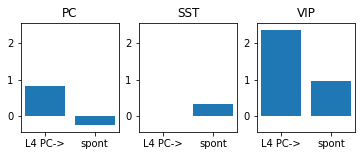

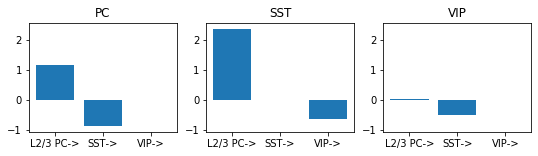

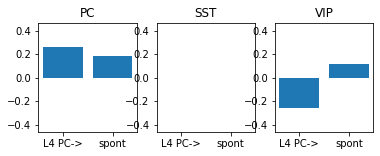

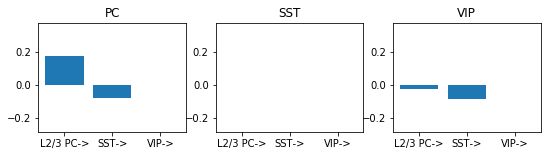

In [282]:
titles = ['PC','SST','VIP']
t = 500
plt.figure(figsize=(6,2))
lbl = 'Wmx'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])

plt.figure(figsize=(9,2))
lbl = 'Wmy'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])
    
plt.figure(figsize=(6,2))
lbl = 'Wsx'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])

plt.figure(figsize=(9,2))
lbl = 'Wsy'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])


In [368]:
#Wstar_dict = np.load('w_over_time_miller_troyer_data_loss.npy',allow_pickle=True)[()]

In [ ]:
#Wstar_t_init = [ww[-1].copy() for ww in Wstar_t_novar]
#W0mx,W0my,W0sx,W0sy,s020 = [Wstar_t_init[i].copy() for i in range(5)]
#Y0 = Wstar_t_init[-3].copy()

In [277]:
#niter = int(1e4)
#eta = 1
#gamma = 0.9
#eta_decay = 1e-3
#weight = np.array((1,1,1))
#thisY0 = np.ones_like(Y0)
#Wstar_t_novar = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=thisY0,W0mx=W0mx.copy(),W0my=W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma)#,eta_decay=eta_decay)

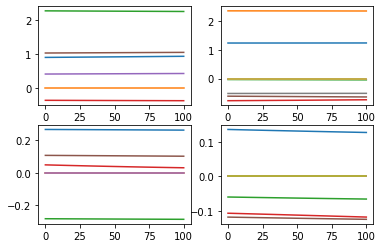

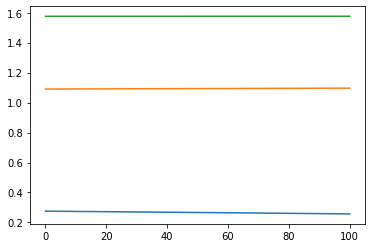

In [409]:
niter = 100
plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(Wstar_t2[i].reshape((niter+1,-1)))
plt.figure()
plt.plot(Wstar_t2[4].reshape((niter+1,-1)))

In [101]:
# labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
# Wstar_dict = {}
# for i,label in enumerate(labels):
#     Wstar_dict[label] = Wstar_t[i]
# np.save('w_over_time_miller_troyer_data_loss.npy',Wstar_dict,allow_pickle=True)

In [197]:
# labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
#Wstar_dict = {}
#for i,label in enumerate(labels):
#    Wstar_dict[label] = Wstar_t[i]


In [263]:
def plot_tuning_and_loss(this_Wstar):
    plt.figure()
    plt.plot((this_Wstar[-3]/this_Wstar[-3].sum(1)[:,np.newaxis]).reshape((niter+1,-1)))
    plt.figure()
    plt.plot(this_Wstar[-1].reshape((niter+1,-1)))

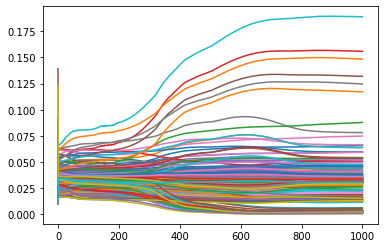

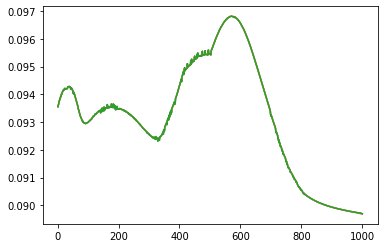

In [413]:
#niter = 300
plot_tuning_and_loss([x[:niter+1] for x in Wstar_t2])

In [190]:
pdb.pm()

> <ipython-input-187-8817849d65ed>(3)plot_tuning_and_loss()
-> plt.plot((this_Wstar[-3]/this_Wstar[-3].sum(1)[:,np.newaxis]).reshape((niter+1,-1)))
(Pdb) this_Wstar[-3].shape
(500, 30, 6)
(Pdb) exit


In [265]:
def scatter_results_spatial(this_Wstar,t=-1):
    plt.figure(figsize=(9,6))
    celltype = ['PC','SST','VIP']
    ialign = 0
    for ialign in range(2):
        for i in range(3):
            plt.subplot(2,3,3*ialign+i+1)
            plt.title(celltype[i])
            xx = Yhat[ialign][i].mean(0)/Yhat[ialign][i].mean(0).sum()
            yy = this_Wstar[-3][t,:,3*ialign+i]/this_Wstar[-3][t,:,3*ialign+i].sum()
            sca.scatter_size_contrast(xx,yy)
            plt.plot((0,xx.max()),(0,xx.max()),c='k')
            plt.xlabel('measured')
            plt.ylabel('modeled')
            plt.tight_layout()

In [298]:
u,s,v = np.linalg.svd(W0my-np.eye(nQ))
eps = 1e-3
_,s1,_ = np.linalg.svd(W0my-np.eye(nQ)-eps*np.outer(u[:,0],v[0,:]))
_,s1,_ = np.linalg.svd(W0my-np.eye(nQ)-s[0]*np.outer(u[:,0],v[0,:]))

In [301]:
L = [s[k]*np.outer(u[:,k],v[k,:]) for k in range(3)]
L[0]+L[1]+L[2]

array([[ 2.44115387e-01,  2.36833670e+00, -1.80171205e-02],
       [-7.93581846e-01, -1.00000000e+00, -5.85983374e-01],
       [ 1.11022302e-16, -5.26444332e-01, -1.00000000e+00]])

In [305]:
(s,s1)

(array([2.71883949, 1.0918506 , 0.57879361]),
 array([2.94904198, 2.50695628, 0.09555611]))

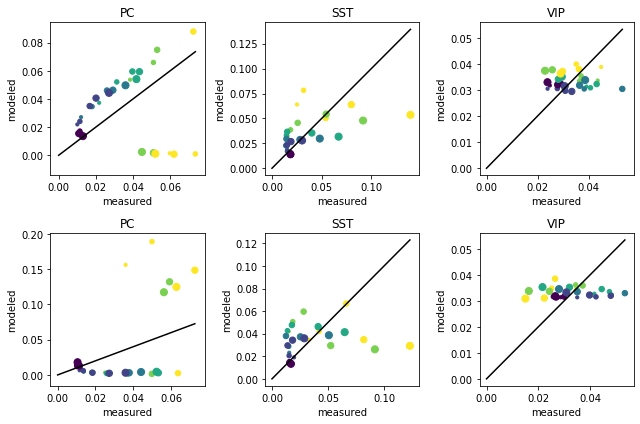

In [414]:
t = -1
scatter_results_spatial(Wstar_t2,t=t) #int(5e3))
# plt.savefig('figures/pc_sst_vip_measured_modeled_miller_troyer.pdf')

In [256]:
def gaussian_fn(mu,sigma):
    return lambda x: 1/np.sqrt(2*np.pi)/np.abs(sigma)*np.exp(-0.5*(x-mu)/sigma**2)
xs = np.linspace(0,1,100)
ipt = 0
# plt.figure()
# for icelltype in range(2):
#     plt.plot(xs,gaussian_fn(um_fn(X[ipt],Y[ipt])[icelltype],us_fn(X[ipt],Y[ipt])[icelltype])(xs))

In [ ]:
# def compute_Y_nonlinear_t_evolution(X,Wmx,Wmy,Wsx,Wsy,f,Y0=None,bounds=None):
#     factr=1e7
#     epsilon=1e-8
#     pgtol=1e-5
    
# #     def parse_W(W): 
# #         Wx = W[:nP*nQ].reshape((nP,nQ))
# #         Wy = W[nP*nQ:].reshape((nQ,nQ))
# #         return Wx,Wy
    
#     def parse_Y(Y):
#         return Y.reshape((nN,nQ))

    
# #     Wx,Wy = parse_W(W)
#     nN,nQ = Y0.shape
    
#     Ystar = [None]*nNh
    
#     for i in range(nN):
#         def minusL(y):
#             def u_fn(Wx,Wy):
#                 return X[i] @ Wx + y @ Wy
#             return 0.5*(f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)) - y)**2

#         def minusdLdy(y):
#             def u_fn(Wx,Wy):
#                 return X[i] @ Wx + y @ Wy
#             return f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)) - y
        
#         #Ystar[i] = sop.fmin_l_bfgs_b(minusL,Y0[i],fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
#         ntries = 100
#         itry = 0
#         succeeded = False
#         noise_lvl = 1e-2
#         while itry < ntries and succeeded is False:
#             try:
#                 itry = itry+1
#                 Ystar[i] = sop.newton(minusL,np.random.rand(*(Y0[i].shape)),fprime=minusdLdy)
#                 succeeded = not Ystar[i][-1]['warnflag']
#             except:
#                 pass

#         print("couldn't do " + str(i))
        
    
#     return Ystar

In [326]:
iiter = -1
Wmx,Wmy,Wsx,Wsy = [Wstar_t[i][iiter] for i in range(4)]

def fXY(x,y):
    return f_miller_troyer(x @ Wmx + y @ Wmy, x @ Wsx + y @ Wsy)

def u_fn_fn(Wx,Wy):
    return lambda x,y: x @ Wx + y @ Wy

def um_fn(x,y):
    return u_fn_fn(Wmy,Wmx)(x,y)

def us_fn(x,y):
    return u_fn_fn(Wsy,Wsx)(x,y)

# Ysolns = compute_Y_nonlinear_t_evolution(X,Wmx,Wmy,Wsx,Wsy,f_miller_troyer,Y0=Wstar_t[-2][iiter+1].copy())

In [327]:
Xlbl = [['L4','spont'],['PC','SST','VIP']]
Ylbl = ['PC','SST','VIP']

In [283]:
for i in range(2):
    values0 = np.round(Wstar_t_novar[i][-1],decimals=2)
    values1 = np.round(Wstar_t_novar[i+2][-1],decimals=2)
    to_print = np.zeros_like(values0,dtype='<U32')
    if np.mod(i,2)==0:
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Xlbl[0][i] + ' -> ' + Xlbl[1][j] + ': ' + str(values0[i,j]) + ' +/- ' + str(values1[i,j])
    else: 
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Ylbl[i] + ' -> ' + Ylbl[j] + ': ' + str(values0[i,j]) + ' +/- ' + str(values1[i,j])
    print(to_print)
    print('\n')
# for i in range(4,5):
#     values = np.round(Wstar_t[i][-1],decimals=2)
#     print(values)

NameError: name 'Wstar_t_novar' is not defined

<IPython.core.display.Javascript object>


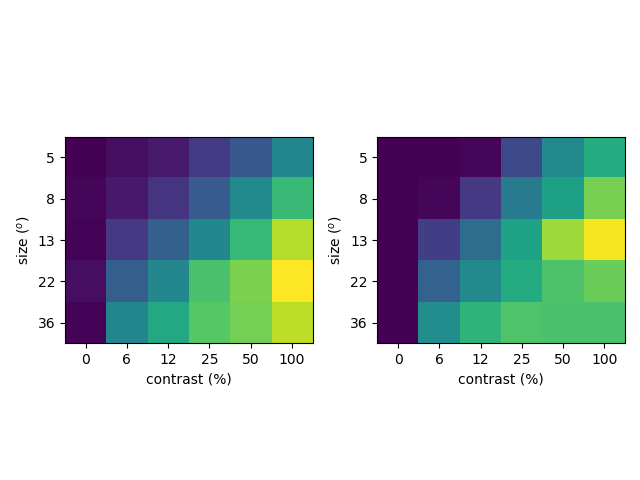

<IPython.core.display.Javascript object>


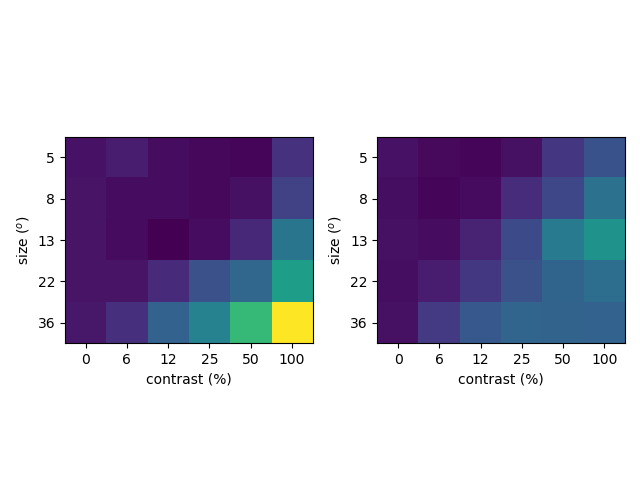

<IPython.core.display.Javascript object>


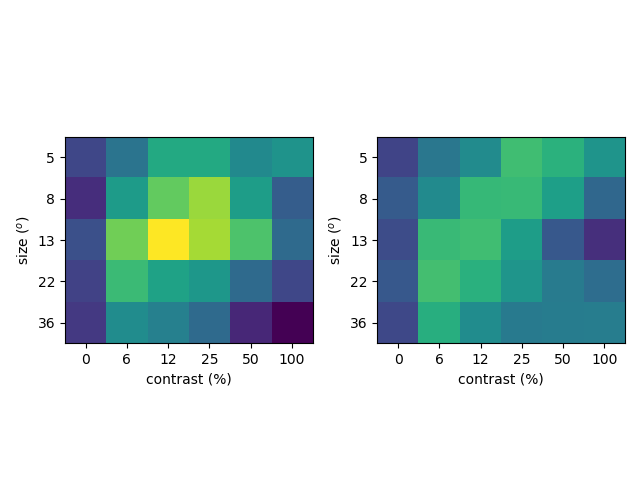

In [541]:
#lbl = ['pc','sst','vip']
#for icelltype in range(3):
#    this_Wstar = Wstar_t_novar
#    t = -1
#    display_model_fit(Yhat[icelltype].mean(0)/Yhat[icelltype].mean(0).sum(),this_Wstar[-3][t,:,icelltype]/this_Wstar[-3][t,:,icelltype].sum())
#    plt.savefig('figures/' + lbl[icelltype] + '_measured_modeled.pdf')

In [585]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t[i]

In [586]:
np.save('w_over_time_miller_troyer_data_loss_momentum.npy',Wstar_dict,allow_pickle=True)

In [270]:
def scatter_results(this_Wstar,t=-1):
    plt.figure(figsize=(9,3))
    celltype = ['PC','SST','VIP']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(celltype[i])
        xx = Yhat[i].mean(0)/Yhat[i].mean(0).sum()
        yy = this_Wstar[-3][t,:,i]/this_Wstar[-3][t,:,i].sum()
        sca.scatter_size_contrast(xx,yy)
        plt.plot((0,xx.max()),(0,xx.max()),c='k')
        plt.xlabel('measured')
        plt.ylabel('modeled')
        plt.tight_layout()

In [1]:
icelltype = 3
u,s,v = np.linalg.svd(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])])
# plt.figure()
# plt.imshow(Rs[1][])

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


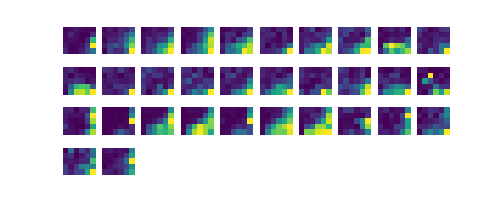

In [500]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(np.logical_and(u[:,0]<np.percentile(u[:,0],52.5),u[:,0]>np.percentile(u[:,0],47.5)))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


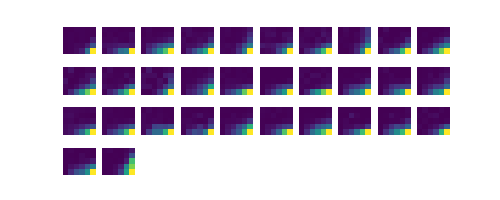

In [501]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(u[:,0]<np.percentile(u[:,0],5))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


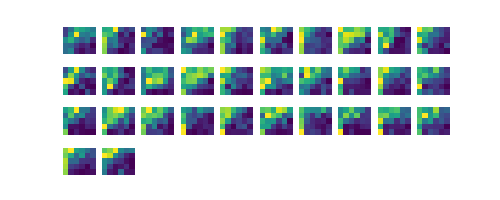

In [502]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(u[:,0]>np.percentile(u[:,0],95))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


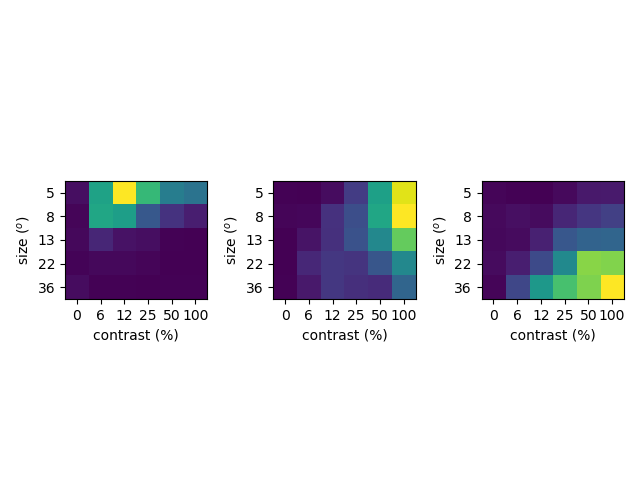

In [508]:
# ut.imshow_in_rows(Rs[1][~np.isnan(Rs[1][:,0])][np.where(u[:,0]>np.percentile(u[:,0],95))].reshape((-1,5,6)))
lower = np.where(u[:,0]<np.percentile(u[:,0],5))[0][28]
middle = np.where(np.logical_and(u[:,0]<np.percentile(u[:,0],52.5),u[:,0]>np.percentile(u[:,0],47.5)))[0][19]
upper = np.where(u[:,0]>np.percentile(u[:,0],95))[0][90]
plt.figure()
for i,thisone in enumerate([upper,middle,lower]):
    plt.subplot(1,3,i+1)
    sca.show_size_contrast(Rs[1][~np.isnan(Rs[1][:,0])][thisone].reshape((5,6)))
plt.tight_layout()
plt.savefig('figures/l23_pc_variability.pdf')

<IPython.core.display.Javascript object>


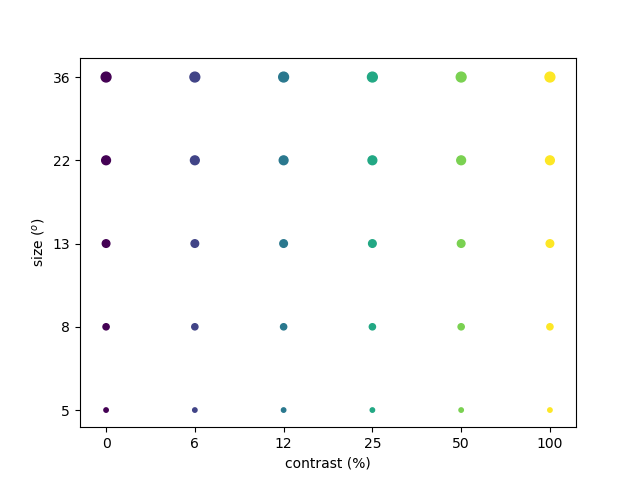

In [519]:
plt.figure()
xx,yy = np.meshgrid(np.arange(6),np.arange(5))
xx = xx.flatten()
yy = yy.flatten()
sca.scatter_size_contrast(xx,yy)
plt.xticks(np.arange(6),(0,6,12,25,50,100))
plt.xlabel('contrast (%)')
plt.yticks(np.arange(5),(5,8,13,22,36))
plt.ylabel('size ($^o$)')
plt.savefig('figures/measured_modeled_legend.pdf')
# plt.axis('off')

In [278]:
#niter = int(1e3)
#Ws = [Wstar_t[i][-1].copy() + 1e-2*np.random.randn(*Wstar_t[i][-1].shape) for i in range(4)]
#Wstar_t2 = fit_W_linearized_pointwise(X.copy(),Yhat.copy(),f_miller_troyer,Y0=Yhat.copy(),W0mx=Ws[0],W0my=Ws[1],W0sx=Ws[2],W0sy=Ws[3],bounds=bounds,niter=niter,weight=np.array((1,10,1)))
#scatter_results(Wstar_t2)

In [286]:
len(X[0])

30

In [293]:
iiter = 5000
Wmx,Wmy,Wsx,Wsy,s02,k,YY1 = [Wstar_t[i][iiter] for i in range(7)]
XX = np.concatenate(X,axis=1)

def gen_Weight(W,K):
    WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
    WW1 = np.concatenate((W*K[np.newaxis,:],W),axis=1)
    WW = np.concatenate((WW0,WW1),axis=0)
    return WW

def fXY(x,y):
    WWmx,WWmy,WWsx,WWsy = [gen_Weight(w,k) for w in [Wmx,Wmy,Wsx,Wsy]]
    return f_miller_troyer(x @ WWmx + y @ WWmy, (x @ WWsx + y @ WWsy)**2 + 1)

def u_fn_fn(Wx,Wy,k):
    WWx,WWy = [gen_Weight(w,k) for w in [Wx,Wy]]
    return lambda x,y: x @ WWx + y @ WWy

def um_fn(x,y):
    return u_fn_fn(Wmy,Wmx,k)(x,y)

def us_fn(x,y):
    return u_fn_fn(Wsy,Wsx,k)(x,y)

#Y,diagnostics = compute_Y_nonlinear(X,Wmx,Wmy,Wsx,Wsy,f_miller_troyer,Y0=Wstar_t[-2][iiter+1].copy()) # _t_evolution
for i in range(YY1.shape[0]):
    
    def fY(y):
        return fXY(XX[i],y) - y
    
    print('largest eigenvalues: ' + str(np.linalg.eig(jacobian(fY)(YY1[i]))[0][-1]))
    #print('eigenvectors: ' + str(np.linalg.eig(jacobian(fY)(YY1[i]))[1][:,-1]))
#     print('determinant: ' + str(np.linalg.det(jacobian(fY)(Y[i]))))
#     print('function output: ' + str(fY(Y[i])))
#     print('function input: ' + str(Y[i]))

largest eigenvalues: (-0.9989998869016463+0j)
largest eigenvalues: (-0.9989828185392442+0j)
largest eigenvalues: (-0.9989660410322228+0j)
largest eigenvalues: (-0.9989463781339991+0j)
largest eigenvalues: (-0.9989723379741865+0j)
largest eigenvalues: (-0.999042265009127+0j)
largest eigenvalues: (-0.9989924770184405+0j)
largest eigenvalues: (-0.9989742948843842+0j)
largest eigenvalues: (-0.9989493366883863+0j)
largest eigenvalues: (-0.9989662944521777+0j)
largest eigenvalues: (-0.9990193695160475+0j)
largest eigenvalues: (-0.9991117914014479+0j)
largest eigenvalues: (-0.9989963842130447+0j)
largest eigenvalues: (-0.998950113640889+0j)
largest eigenvalues: (-0.9989531261622885+0j)
largest eigenvalues: (-0.9989905231904382+0j)
largest eigenvalues: (-0.9990560055529697+0j)
largest eigenvalues: (-0.9991235494444328+0j)
largest eigenvalues: (-0.9989991354416329+0j)
largest eigenvalues: (-0.9989485313303269+0j)
largest eigenvalues: (-0.998953340712634+0j)
largest eigenvalues: (-0.998991796333

In [290]:
pdb.pm()

> /home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py(48)f_wrapped()
-> return f_raw(*args, **kwargs)
(Pdb) u
> /home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py(44)f_wrapped()
-> ans = f_wrapped(*argvals, **kwargs)
(Pdb) u
> /home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/numpy/numpy_boxes.py(24)__add__()
-> def __add__(self, other): return anp.add(     self, other)
(Pdb) u
> <ipython-input-289-04904d4e35d9>(13)fXY()
-> return f_miller_troyer(x @ WWmx + y @ WWmy, (x @ WWsx + y @ WWsy)**2 + s02)
(Pdb) x.shape
(4,)
(Pdb) y.shape
(6,)
(Pdb) WWmx.shape
(4, 6)
(Pdb) WWmy.shape
(6, 6)
(Pdb) s02.shape
(3,)
(Pdb) exit


<IPython.core.display.Javascript object>


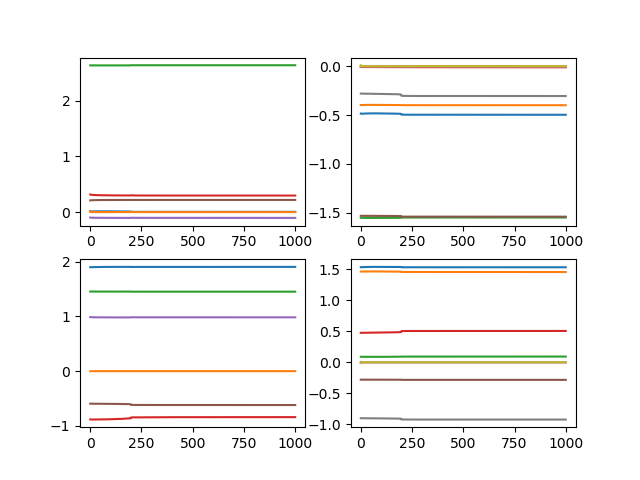

In [246]:
def plot_weights_over_time(this_Wstar):
    plt.figure()
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot(this_Wstar[i].reshape((niter+1,-1)))
plot_weights_over_time(Wstar_t2)

In [274]:
nQ = Y.shape[1]
def parse_W(W):
        shapeW = (nQ,nQ)
        sizeW = np.prod(shapeW)
        nW = 4
        Ws = [None]*nW
        for i in range(nW):
            Ws[i] = W[i*sizeW:(i+1)*sizeW].reshape(shapeW)
        return Ws
Ws = parse_W(Wstar[0])

In [275]:
Y1 = compute_Y_nonlinear(X,*Ws,f_miller_troyer,Y0=Y0)

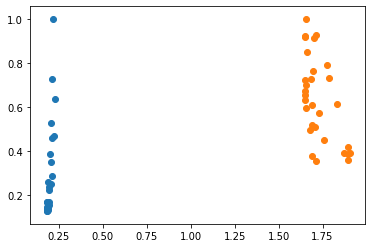

In [276]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y[:,i])

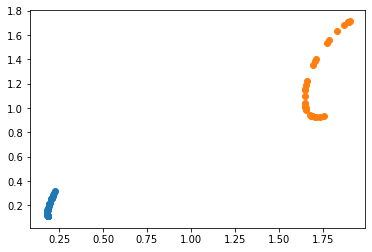

In [277]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y1[:,i])

In [491]:
diagnostics

[(array([0.07590516, 0.16438597]),
  0.002892952845580517,
  {'grad': array([ 0.00350314, -0.01427093]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 57,
   'nit': 1,
   'warnflag': 2}),
 (array([0.08371026, 0.18076958]),
  0.0035159924935236103,
  {'grad': array([ 0.00603596, -0.0151144 ]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([0.09198376, 0.19835681]),
  0.0042315034102210665,
  {'grad': array([ 0.06981335, -0.00428242]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([0.109196  , 0.23462734]),
  0.00597166243487739,
  {'grad': array([ 0.0344488 , -0.01411697]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
   'funcalls': 32,
   'nit': 2,
   'warnflag': 0}),
 (array([0.13124416, 0.28118814]),
  0.008626608249659579,
  {'grad': array([ 0.03536171, -0.01777716]),
   'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  

In [ ]:
y = array([0.07590516, 0.16438597])
f_miller

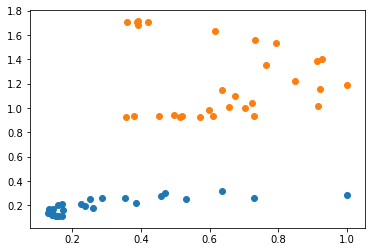

In [278]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y[:,i],Y1[:,i])

In [279]:
# W0 = np.concatenate((W0x.flatten(),W0y.flatten()))
bounds = [(-np.inf,np.inf)]*16
offset = 0
bounds[offset+4] = (0,0)
bounds[offset+7] = (0,0)
offset = 8
bounds[offset+4] = (0,0)
bounds[offset+7] = (0,0)
bounds = tuple(bounds)
Niter = 200
w0my = W0my
w0mx = W0mx
w0sy = W0sy
w0sx = W0sx
Wstar = [None]*Niter
eta = 0.1
for i in range(Niter):
    Wstar[i] = fit_W_linearized_WY(X,Y,f_miller_troyer,Y0=Y,W0mx=w0mx,W0my=w0my,W0sx=w0sx,W0sy=w0sy,bounds=bounds)
    w1mx,w1my,w1sx,w1sy = parse_W(Wstar[i][0])
    w0mx = w0mx + eta*(w1mx-w0mx)
    w0my = w0my + eta*(w1my-w0my)
    w0sx = w0sx + eta*(w1sx-w0sx)
    w0sy = w0sy + eta*(w1sy-w0sy)

In [287]:
Wt = np.zeros((Niter,)+(Wstar[0][0].shape))
Yt = np.zeros((Niter,)+(Y.shape))
for i in range(Niter):
    print(i)
    Wt[i] = Wstar[i][0]
    wmx,wmy,wsx,wsy = parse_W(Wt[i])
    Yt[i] = compute_Y_nonlinear(X,wmx,wmy,wsx,wsy,f_miller_troyer,Y0=Y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


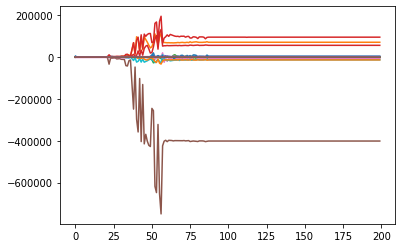

In [297]:
plt.figure()
for i in range(Wt.shape[1]):
    plt.plot(Wt[:,i])

In [299]:
Wt[60]

array([  -2650.28820038,   67637.4935345 ,    4074.34417779,
         54463.21523021,       0.        , -404651.66764672,
        -20432.76063931,       0.        ,    1039.50187873,
        -17600.42502162,    -940.64376186,  -14055.94816129,
             0.        ,  105290.99901942,    5339.32977626,
             0.        ])

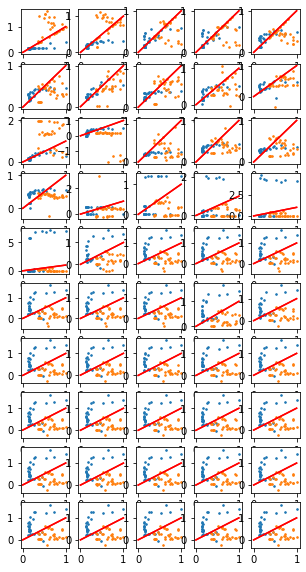

In [289]:
plt.figure(figsize=(5,20))
for i in range(0,Niter,4):
    plt.subplot(20,5,int(i/4)+1)
    for j in range(2):
        plt.scatter(Y[:,j],Yt[i,:,j],s=2.5)
        plt.plot((0,1),(0,1),c='r')

In [304]:
u,s,v = np.linalg.svd(Rpc[~np.isnan(Rpc.sum(1))])

In [307]:
np.diag(s).shape

(30, 30)

In [308]:
def pca_denoise(arr,Npc):
    u,s,v = np.linalg.svd(arr)
    return u[:,:Npc] @ np.diag(s[:Npc]) @ v[:Npc,:]

In [309]:
Rpc2 = pca_denoise(Rpc[~np.isnan(Rpc.sum(1))],10)

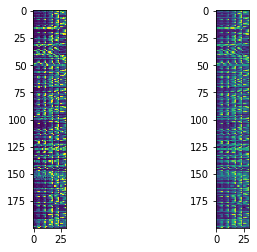

In [312]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Rpc[:200])
plt.subplot(1,2,2)
plt.imshow(Rpc2[:200])

In [437]:
def fit_W_linearized(X,Y,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,bounds=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    fprime_m = egrad(f,0)
    fprime_s = egrad(f,1)
    nN,nP = X.shape
    nQ = Y.shape[1]
    assert(nN==Y.shape[0])
    
    #W0x,W0y = parse_W(W0)
    
    u_fn = lambda Wx,Wy: X @ Wx + Y0 @ Wy
    
    um0 = u_fn(W0mx,W0my) # (N,Q)
    us0 = u_fn(W0sx,W0sy) # (N,Q)
    Fsquiggle = f(um0,us0) # (N,Q)
    Fprime_m_squiggle = np.maximum(fprime_m(um0,us0),fudge) # (N,Q)
    Fprime_s_squiggle = np.maximum(fprime_s(um0,us0),fudge) # (N,Q)
    
#     Phi = np.zeros((nN,nQ,nQ))
#     Phi_m = np.zeros((nN,nQ,nQ)) # Phi now means Fprime rather than 1/Fprime
#     Phi_s = np.zeros((nN,nQ,nQ))
#     for i in range(nN):
#         np.fill_diagonal(Phi[i],F_squiggle[i])
#         np.fill_diagonal(Phi_m[i],Fprime_m_squiggle[i]) # is there a cleaner way?
#         np.fill_diagonal(Phi_s[i],Fprime_s_squiggle[i])
    
#     A0 = -u0 - (Y0 @ W0y) + Fsquiggle/Fprimesquiggle
#     A = Phi - Phi_m @ Y0 @ W0my - Phi_s @ Y0 @ W0sy
    A0 = Fsquiggle - Fprime_m_squiggle * u_fn(W0mx,W0my) - Fprime_s_squiggle * u_fn(W0sx,W0sy)
    
    # N
    
    W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten()),axis=0)
    
    def compute_Y(Wmx,Wmy,Wsx,Wsy):
        
        A1 = Fprime_m_squiggle * (X @ Wmx) + Fprime_s_squiggle * (X @ Wsx)
        A = A0 + A1
        
        WFm = np.einsum('jk,ik->ijk',Wmy,Fprime_m_squiggle)
        WFs = np.einsum('jk,ik->ijk',Wsy,Fprime_s_squiggle)
        Omega = np.eye(nQ) - WFm - WFs
        
        Y = np.einsum('ik,ikj->ij',A,np.linalg.inv(Omega))

#         Y = (A @ np.linalg.inv(Phi-W0y))[np.eye(nN,dtype='bool')]
#         Y = np.zeros((nN,nQ))
#         for i in range(nN):
#             Y[i] = A[i] @ np.linalg.inv(Phi[i]-W0y) # (Q,) @ (Q,Q).
#         assert(True==False)
        return Y
    
    def minusL(W):
        Wmx,Wmy,Wsx,Wsy = parse_W(W)
        return 0.5*np.sum((compute_Y(Wmx,Wmy,Wsx,Wsy) - Y)**2)
    
    def minusdLdw(W): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(W)
    
    def parse_W(W):
        shapeW = (nQ,nQ)
        sizeW = np.prod(shapeW)
        nW = 4
        Ws = [None]*nW
        for i in range(nW):
            Ws[i] = W[i*sizeW:(i+1)*sizeW].reshape(shapeW)
        return Ws
        
    
    Wstar = sop.fmin_l_bfgs_b(minusL,W0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
#     assert(True==False)
    
    return Wstar

In [438]:
def fit_W_linearized_WY(X,Y,f,Y0=None,W0mx=None,W0my=None,W0sx=None,W0sy=None,bounds=None):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    fprime_m = egrad(f,0)
    fprime_s = egrad(f,1)
    nN,nP = X.shape
    nQ = Y.shape[1]
    assert(nN==Y.shape[0])
    
    #W0x,W0y = parse_W(W0)
    
    u_fn = lambda Wx,Wy: X @ Wx + Y0 @ Wy
    
    um0 = u_fn(W0mx,W0my) # (N,Q)
    us0 = u_fn(W0sx,W0sy) # (N,Q)
    Fsquiggle = f(um0,us0) # (N,Q)
    Fprime_m_squiggle = np.maximum(fprime_m(um0,us0),fudge) # (N,Q)
    Fprime_s_squiggle = np.maximum(fprime_s(um0,us0),fudge) # (N,Q)
    
#     Phi = np.zeros((nN,nQ,nQ))
#     Phi_m = np.zeros((nN,nQ,nQ)) # Phi now means Fprime rather than 1/Fprime
#     Phi_s = np.zeros((nN,nQ,nQ))
#     for i in range(nN):
#         np.fill_diagonal(Phi[i],F_squiggle[i])
#         np.fill_diagonal(Phi_m[i],Fprime_m_squiggle[i]) # is there a cleaner way?
#         np.fill_diagonal(Phi_s[i],Fprime_s_squiggle[i])
    
#     A0 = -u0 - (Y0 @ W0y) + Fsquiggle/Fprimesquiggle
#     A = Phi - Phi_m @ Y0 @ W0my - Phi_s @ Y0 @ W0sy
    A0 = Fsquiggle - Fprime_m_squiggle * u_fn(W0mx,W0my) - Fprime_s_squiggle * u_fn(W0sx,W0sy) 
    A0 = A0 - Fprime_m_squiggle * (Y0 @ W0my) - Fprime_s_squiggle * (Y0 @ W0sy)
    
    # N
    
    W0 = np.concatenate((W0mx.flatten(),W0my.flatten(),W0sx.flatten(),W0sy.flatten()),axis=0)
    
    def compute_Y(Wmx,Wmy,Wsx,Wsy):
        
        A1 = Fprime_m_squiggle * u_fn(Wmx,Wmy) + Fprime_s_squiggle * u_fn(Wsx,Wsy)
        A = A0 + A1
        
        WFm = np.einsum('jk,ik->ijk',W0my,Fprime_m_squiggle)
        WFs = np.einsum('jk,ik->ijk',W0sy,Fprime_s_squiggle)
        Omega = np.eye(nQ) - WFm - WFs
        
        Y = np.einsum('ik,ikj->ij',A,np.linalg.inv(Omega))

#         Y = (A @ np.linalg.inv(Phi-W0y))[np.eye(nN,dtype='bool')]
#         Y = np.zeros((nN,nQ))
#         for i in range(nN):
#             Y[i] = A[i] @ np.linalg.inv(Phi[i]-W0y) # (Q,) @ (Q,Q).
#         assert(True==False)
        return Y
    
    def minusL(W):
        Wmx,Wmy,Wsx,Wsy = parse_W(W)
        return 0.5*np.sum((compute_Y(Wmx,Wmy,Wsx,Wsy) - Y)**2)
    
    def minusdLdw(W): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(W)
    
    def parse_W(W):
        shapeW = (nQ,nQ)
        sizeW = np.prod(shapeW)
        nW = 4
        Ws = [None]*nW
        for i in range(nW):
            Ws[i] = W[i*sizeW:(i+1)*sizeW].reshape(shapeW)
        return Ws
        
    
    Wstar = sop.fmin_l_bfgs_b(minusL,W0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
#     assert(True==False)
    
    return Wstar